<a href="https://colab.research.google.com/github/HunterBushnell/LUT_SCI/blob/master/LUT_SCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install
!pip install neuron==8.2.2
!pip install bmtk==1.0.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 743.6/743.6 kB 11.9 MB/s eta 0:00:00


In [2]:
# Download Files

import os

if os.path.basename(os.getcwd())!='LUT_SCI':
  !git clone https://github.com/HunterBushnell/LUT_SCI
  %cd LUT_SCI/
else:
  print('Mod files have already been downloaded.')
%ls

Cloning into 'LUT_SCI'...
remote: Enumerating objects: 1559, done.
remote: Counting objects: 100% (1559/1559), done.
remote: Compressing objects: 100% (455/455), done.
remote: Total 1559 (delta 992), reused 1550 (delta 987), pack-reused 0
Receiving objects: 100% (1559/1559), 12.04 MiB | 25.69 MiB/s, done.
Resolving deltas: 100% (992/992), done.
/content/LUT_SCI
biophys_components/  generate_input.py  output/          requirements.txt
Blad_spikes.csv      graphs/            PAG_spikes.csv   run_bionet.py
build_network.py     images/            plot_results.py  run.sh*
error_logs/          jsons/             plotting.pkl     synapses.py
EUS_spikes.csv       network/           plotting.py
feedback_loop.py     notes/             README.md


In [3]:
# Compile Files

import os
# move to the mechanisms folder
%cd biophys_components/mechanisms/
os.system("rm -rf x86_64") # deletes x86_64 if its there
%ls # just to make sure its gone
print(os.system('nrnivmodl modfiles')) # compile modfiles. Return 0 for success, 1 for failure.
%ls # check to make sure the folder is there now
%cd ../..
%ls

/content/LUT_SCI/biophys_components/mechanisms
modfiles/
0
modfiles/  x86_64/
/content/LUT_SCI
biophys_components/  generate_input.py  output/          requirements.txt
Blad_spikes.csv      graphs/            PAG_spikes.csv   run_bionet.py
build_network.py     images/            plot_results.py  run.sh*
error_logs/          jsons/             plotting.pkl     synapses.py
EUS_spikes.csv       network/           plotting.py
feedback_loop.py     notes/             README.md


In [4]:
# Build Network

import numpy as np
from bmtk.builder.networks import NetworkBuilder
import math
import random

random.seed(42)
output_dir='network'

#######################################################################
##################### Create the cells ################################
#######################################################################
print("\nCreating Cells")

# Build the main network
net = NetworkBuilder('LUT')

# Specify number of cells in each population #

numBladaff  = 10
numPAGaff   = 10
numEUSaff   = 10
numIND      = 10
numHypo     = 10
numINmplus  = 10
numINmminus = 10
numPGN      = 10
numFB       = 10
numIMG      = 10
numMPG      = 10
numEUSmn    = 10
numBladmn   = 10
# Create the nodes ----------------------------------------
net.add_nodes(N=numBladaff, level='high',pop_name='Bladaff',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
net.add_nodes(N=numPAGaff, pop_name='PAGaff',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
net.add_nodes(N=numEUSaff, level='high',pop_name='EUSaff',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
net.add_nodes(N=numIND, pop_name='IND',model_type='biophysical',model_template='hoc:IND',morphology='blank.swc')
net.add_nodes(N=numHypo, pop_name='Hypo',model_type='biophysical',model_template='hoc:HYPO',morphology='blank.swc')
net.add_nodes(N=numINmplus, pop_name='INmplus',model_type='biophysical',model_template='hoc:INM',morphology='blank.swc')
net.add_nodes(N=numINmminus, pop_name='INmminus',model_type='biophysical',model_template='hoc:INM',morphology='blank.swc')
net.add_nodes(N=numPGN, level='low', pop_name='PGN',model_type='biophysical',model_template='hoc:PGN',morphology='blank.swc')
net.add_nodes(N=numFB, pop_name='FB',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
net.add_nodes(N=numIMG, pop_name='IMG',model_type='biophysical',model_template='hoc:IMG',morphology='blank.swc')
net.add_nodes(N=numMPG, pop_name='MPG',model_type='biophysical',model_template='hoc:MPG',morphology='blank.swc')
net.add_nodes(N=numEUSmn, pop_name='EUSmn',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
net.add_nodes(N=numBladmn, pop_name='Bladmn',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')

##################################################################################
####################### Connect the cells ########################################
##################################################################################
print("\nConnecting Cells")

# Connectivity function
# To use this function, the number of cells in the source population must be the same
# as the number of cells in the target population.
def one_to_one(source, target):
    sid = source.node_id
    tid = target.node_id
    source_name = source['pop_name']
    target_name = target['pop_name']
    if source_name=='EUSaff':
        sid = sid-(numBladaff)
    if source_name=='PAGaff':
        sid = sid-(numBladaff+numEUSaff)
    if source_name=='IND':
        sid = sid-(numBladaff+numEUSaff+numPAGaff)
    if source_name=='Hypo':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND)
    if source_name=='INmplus':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    if source_name=='INmminus':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    if source_name=='PGN':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus)
    if source_name=='FB':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN)
    if source_name=='IMG':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB)
    if source_name=='MPG':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG)
    if source_name=='EUSmn':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    if source_name=='Bladmn':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)

    if target_name=='EUSaff':
        tid = tid-(numBladaff)
    if target_name=='PAGaff':
        tid = tid-(numBladaff+numEUSaff)
    if target_name=='IND':
        tid = tid-(numBladaff+numEUSaff+numPAGaff)
    if target_name=='Hypo':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND)
    if target_name=='INmplus':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    if target_name=='INmminus':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    if target_name=='PGN':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus)
    if target_name=='FB':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN)
    if target_name=='IMG':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB)
    if target_name=='MPG':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG)
    if target_name=='EUSmn':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    if target_name=='Bladmn':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)

    if sid == tid:
        print("connecting {} cell {} to {} cell {}".format(source_name,sid,target_name,tid))
        tmp_nsyn = 1
    else:
        return None

    return tmp_nsyn


def percent_connector(source,target,percent):
    """
    For connections where types don't have the same number of cells
    And positions are undefined for one type
    """
    sid = source.node_id
    tid = target.node_id
    source_name = source['pop_name']
    target_name = target['pop_name']

    if source_name=='EUSaff':
        sid = sid-(numBladaff)
    if source_name=='PAGaff':
        sid = sid-(numBladaff+numEUSaff)
    if source_name=='IND':
        sid = sid-(numBladaff+numEUSaff+numPAGaff)
    if source_name=='Hypo':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND)
    if source_name=='INmplus':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    if source_name=='INmminus':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    if source_name=='PGN':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus)
    if source_name=='FB':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN)
    if source_name=='IMG':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB)
    if source_name=='MPG':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG)
    if source_name=='EUSmn':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    if source_name=='Bladmn':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)

    if target_name=='EUSaff':
        tid = tid-(numBladaff)
    if target_name=='PAGaff':
        tid = tid-(numBladaff+numEUSaff)
    if target_name=='IND':
        tid = tid-(numBladaff+numEUSaff+numPAGaff)
    if target_name=='Hypo':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND)
    if target_name=='INmplus':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    if target_name=='INmminus':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    if target_name=='PGN':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus)
    if target_name=='FB':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN)
    if target_name=='IMG':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB)
    if target_name=='MPG':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG)
    if target_name=='EUSmn':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    if target_name=='Bladmn':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)

    if random.random() < (float(percent)/100):
        print("connecting {} cell {} to {} cell {}".format(source_name,sid,target_name,tid))
        return 1
    else:
        return 0

def conn_props(source,target,mu,sigma):
    """
    Simply add connection properties as normal
    https://github.com/AllenInstitute/bmtk/blob/develop/docs/tutorial/NetworkBuilder_Intro.ipynb

    Can also adjust weights before running the network.
    See https://github.com/AllenInstitute/bmtk/blob/develop/docs/tutorial/02_single_cell_syn.ipynb
    Section 5
    If done this way the function will need to be imported in the run script, consider refactoring?
    """

    #syn_weight = np.random.lognormal(mean=mu,sigma=sigma)
    syn_weight = mu

    return syn_weight,0,0.5


# Add connections -----------------------------------------

# Blad afferent --> INd (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='Bladaff'), target=net.nodes(pop_name='IND'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
				   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':3.0e-3,'sigma':1}, # was 10e-3
                    dtypes=[np.float, np.int32, np.float])

 # Blad afferent --> Hypogastric (Hou et al. 2014)
conn = net.add_edges(source=net.nodes(pop_name='Bladaff'), target=net.nodes(pop_name='Hypo'),
                    connection_rule=percent_connector,
                    connection_params={'percent':10.0},
                    target_sections=['somatic'],
                    delay=2.0,
                    distance_range=[0.0, 300.0],
                    dynamics_params='AMPA_ExcToExc.json',
                    model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                     rule=conn_props,
                     rule_params={'mu':10.0e-3,'sigma':1}, # was 10.0e-3
                     dtypes=[np.float, np.int32, np.float])

# EUS afferent --> INd (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='IND'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':1.0e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])

## PAG afferent --> INd (Grill et al. 2016)
#conn = net.add_edges(source=net.nodes(pop_name='PAGaff'), target=net.nodes(pop_name='IND'),
#                   connection_rule=percent_connector,
#                   connection_params={'percent':100.0},
#                   target_sections=['somatic'],
#                   delay=2.0,
#                   distance_range=[0.0, 300.0],
#                   dynamics_params='AMPA_ExcToExc.json',
#                   model_template='Exp2Syn')
#
#conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
#                    rule=conn_props,
#                    rule_params={'mu':5.0e-3,'sigma':1},  # was 20.0e-3
#                    dtypes=[np.float, np.int32, np.float])

# INd --> PGN (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='IND'), target=net.nodes(pop_name='PGN'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':16.0e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])

 # Hypogastric --> IMG (Beckel et al. 2015)
conn = net.add_edges(source=net.nodes(pop_name='Hypo'), target=net.nodes(pop_name='IMG'),
                    connection_rule=percent_connector,
                    connection_params={'percent':10.0},
                    target_sections=['somatic'],
                    delay=2.0,
                    distance_range=[0.0, 300.0],
                    dynamics_params='AMPA_ExcToExc.json',
                    model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                     rule=conn_props,
                     rule_params={'mu':12.0e-3,'sigma':1},
                     dtypes=[np.float, np.int32, np.float])

## STSP synapse ##
# # EUS afferent --> INm+ (Grill et al. 2016) **Low pass filter**
# conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='INmplus'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':100.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='stsp.json',
                   # model_template='Exp2Syn1_STSP')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':0.5,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# EUS afferent --> INm+(Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='INmplus'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':16.5e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])
# PAG afferent --> INm+ (Source?)
# Using this connection instead of synaptic depression for low pass filtering
# conn = net.add_edges(source=net.nodes(pop_name='PAGaff'), target=net.nodes(pop_name='PGN'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':100.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='AMPA_ExcToExc.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':11.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# EUS afferent --> INm-(Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='INmminus'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':16.0e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])

# INm+ --> PGN (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='INmplus'), target=net.nodes(pop_name='PGN'),
                   cconnection_rule=percent_connector,
                   connection_params={'percent':10.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':2.0e-3,'sigma':1}, # was 1e-3
                    dtypes=[np.float, np.int32, np.float])

# INm- --> PGN (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='INmminus'), target=net.nodes(pop_name='PGN'),
                   connection_rule=percent_connector,
                   connection_params={'percent':10.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='GABA_InhToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':15.0e-3,'sigma':1}, # was 20e-3
                    dtypes=[np.float, np.int32, np.float])

# PGN --> MPG (Beckel et al. 2015)
conn = net.add_edges(source=net.nodes(pop_name='PGN'), target=net.nodes(pop_name='MPG'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':12.0e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])

# PGN --> FB (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='PGN'), target=net.nodes(pop_name='FB'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':12.0e-3,'sigma':1}, #was 12.0e-3
                    dtypes=[np.float, np.int32, np.float])

# FB --> INd (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='FB'), target=net.nodes(pop_name='IND'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='GABA_InhToInh.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':12.0e-3,'sigma':1},       # was 12.0e-3
                    dtypes=[np.float, np.int32, np.float])

# # MPG --> Bladder MN (Beckel et al. 2015)
# conn = net.add_edges(source=net.nodes(pop_name='MPG'), target=net.nodes(pop_name='Bladmn'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':10.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='AMPA_ExcToExc.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':16.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# # IMG --> Bladder MN (Beckel et al. 2015)
# conn = net.add_edges(source=net.nodes(pop_name='IMG'), target=net.nodes(pop_name='Bladmn'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':10.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='GABA_InhToInh.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':10.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

## PAG aff --> Hypogastric (de Groat, et al. 2015)
#conn = net.add_edges(source=net.nodes(pop_name='PAGaff'), target=net.nodes(pop_name='Hypo'),
#                    connection_rule=percent_connector,
#                    connection_params={'percent':100.0},
#                    target_sections=['somatic'],
#                    delay=2.0,
#                    distance_range=[0.0, 300.0],
#                    dynamics_params='GABA_InhToInh.json',
#                    model_template='Exp2Syn')
#
#conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
#                     rule=conn_props,
#                     rule_params={'mu':12.0e-3,'sigma':1},
#                     dtypes=[np.float, np.int32, np.float])

# PAG aff --> EUS MN (Shefchyk et al. 2001)
# conn = net.add_edges(source=net.nodes(pop_name='PAGaff'), target=net.nodes(pop_name='EUSmn'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':100.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='GABA_InhToInh.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':12.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# EUS afferent --> EUS MN (Beckel et al. 2015)
# conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='EUSmn'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':100.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='AMPA_ExcToExc.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':12.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# Connect virtual cells to EUS, Bladder, and PAG/PMC
Blad_aff_virt = NetworkBuilder('Blad_aff_virt') # Virtual cells delivering input to Bladder
EUS_aff_virt = NetworkBuilder('EUS_aff_virt')   # Virtual cells delivering input to EUS
PAG_aff_virt = NetworkBuilder('PAG_aff_virt')   # Virtual cells delivering input to PAG/PMC

Blad_aff_virt.add_nodes(N=numBladaff, pop_name = 'Blad_aff_virt', model_type='virtual', potential='exc')
EUS_aff_virt.add_nodes(N=numEUSaff, pop_name = 'EUS_aff_virt', model_type='virtual', potential='exc')
PAG_aff_virt.add_nodes(N=numPAGaff, pop_name = 'PAG_aff_virt', model_type='virtual', potential='exc')

Blad_aff_virt.add_edges(source=Blad_aff_virt.nodes(), target=net.nodes(pop_name='Bladaff'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   syn_weight=12.0e-03,
                   target_sections=['somatic'],
				   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')


EUS_aff_virt.add_edges(source=EUS_aff_virt.nodes(), target=net.nodes(pop_name='EUSaff'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   syn_weight=12.0e-03,
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

PAG_aff_virt.add_edges(source=PAG_aff_virt.nodes(), target=net.nodes(pop_name='PAGaff'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   syn_weight=20.0e-03,
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

####################################################################################
########################## Build and save network ##################################
####################################################################################

print("\nBuilding network and saving to directory \"" + output_dir + "\"")
net.build()
Blad_aff_virt.build()
EUS_aff_virt.build()
PAG_aff_virt.build()

net.save_nodes(output_dir=output_dir)
net.save_edges(output_dir=output_dir)

Blad_aff_virt.save_nodes(output_dir=output_dir)
Blad_aff_virt.save_edges(output_dir=output_dir)

EUS_aff_virt.save_nodes(output_dir=output_dir)
EUS_aff_virt.save_edges(output_dir=output_dir)

PAG_aff_virt.save_nodes(output_dir=output_dir)
PAG_aff_virt.save_edges(output_dir=output_dir)

print("Done")


Creating Cells

Connecting Cells

Building network and saving to directory "network"
connecting Bladaff cell 0 to IND cell 0
connecting Bladaff cell 0 to IND cell 1
connecting Bladaff cell 0 to IND cell 2
connecting Bladaff cell 0 to IND cell 3
connecting Bladaff cell 0 to IND cell 4
connecting Bladaff cell 0 to IND cell 5
connecting Bladaff cell 0 to IND cell 6
connecting Bladaff cell 0 to IND cell 7
connecting Bladaff cell 0 to IND cell 8
connecting Bladaff cell 0 to IND cell 9
connecting Bladaff cell 1 to IND cell 0
connecting Bladaff cell 1 to IND cell 1
connecting Bladaff cell 1 to IND cell 2
connecting Bladaff cell 1 to IND cell 3
connecting Bladaff cell 1 to IND cell 4
connecting Bladaff cell 1 to IND cell 5
connecting Bladaff cell 1 to IND cell 6
connecting Bladaff cell 1 to IND cell 7
connecting Bladaff cell 1 to IND cell 8
connecting Bladaff cell 1 to IND cell 9
connecting Bladaff cell 2 to IND cell 0
connecting Bladaff cell 2 to IND cell 1
connecting Bladaff cell 2 to IND c

<ipython-input-4-48ed6226506c>:219: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtypes=[np.float, np.int32, np.float])
<ipython-input-4-48ed6226506c>:234: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtypes=[np.float, np.int32, np.float])
<ipython-input-4-48ed6226506c>:249: DeprecationWarning: `np.float` is a deprecated alias for the b

Done


2023-08-31 00:48:25,233 [INFO] Created log file


INFO:NEURONIOUtils:Created log file


2023-08-31 00:48:25,328 [INFO] Building cells.


INFO:NEURONIOUtils:Building cells.


2023-08-31 00:48:25,384 [INFO] Building recurrent connections


INFO:NEURONIOUtils:Building recurrent connections


2023-08-31 00:48:25,511 [INFO] Building virtual cell stimulations for Blad_spikes


INFO:NEURONIOUtils:Building virtual cell stimulations for Blad_spikes


2023-08-31 00:48:25,553 [INFO] Building virtual cell stimulations for EUS_spikes


INFO:NEURONIOUtils:Building virtual cell stimulations for EUS_spikes


2023-08-31 00:48:25,589 [INFO] Building virtual cell stimulations for PAG_spikes


INFO:NEURONIOUtils:Building virtual cell stimulations for PAG_spikes


2023-08-31 00:48:25,636 [INFO] Running simulation for 100500.000 ms with the time step 0.200 ms


INFO:NEURONIOUtils:Running simulation for 100500.000 ms with the time step 0.200 ms


2023-08-31 00:48:25,639 [INFO] Starting timestep: 0 at t_sim: 0.000 ms


INFO:NEURONIOUtils:Starting timestep: 0 at t_sim: 0.000 ms


2023-08-31 00:48:25,644 [INFO] Block save every 2500 steps


INFO:NEURONIOUtils:Block save every 2500 steps


2023-08-31 00:48:26,214 [INFO]     step:2500 t_sim:500.00 ms


INFO:NEURONIOUtils:    step:2500 t_sim:500.00 ms


2023-08-31 00:48:26,224 [INFO] Timestep 0.0 to 500.0 ms


INFO:NEURONIOUtils:Timestep 0.0 to 500.0 ms


2023-08-31 00:48:26,226 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:26,230 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:26,234 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:26,237 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:26,239 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:26,240 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:26,242 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:26,243 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:26,245 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:26,246 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:26,248 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:26,250 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:26,252 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:26,254 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:26,256 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-08-31 00:48:26,258 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:26,261 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:26,262 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:26,264 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:26,266 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-08-31 00:48:26,268 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-08-31 00:48:26,270 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:26,272 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:26,274 [INFO] 99		0.0


INFO:NEURONIOUtils:99		0.0


2023-08-31 00:48:26,276 [INFO] IMG firing rate avg: 0.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.0 Hz


2023-08-31 00:48:26,293 [INFO] Volume = 0.0000 ml


INFO:NEURONIOUtils:Volume = 0.0000 ml


2023-08-31 00:48:26,295 [INFO] Pressure = 8.79 cm H2O


INFO:NEURONIOUtils:Pressure = 8.79 cm H2O


2023-08-31 00:48:26,297 [INFO] Calculated bladder afferent firing rate for the next time step = 0.08 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.08 Hz 
 



2023-08-31 00:48:27,234 [INFO]     step:5000 t_sim:1000.00 ms


INFO:NEURONIOUtils:    step:5000 t_sim:1000.00 ms


2023-08-31 00:48:27,245 [INFO] Timestep 500.0 to 1000.0 ms


INFO:NEURONIOUtils:Timestep 500.0 to 1000.0 ms


2023-08-31 00:48:27,250 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:27,256 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:27,258 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:27,260 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:27,266 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:27,268 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:27,269 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:27,270 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:27,271 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:27,276 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:27,278 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:27,279 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:27,280 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:27,281 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:27,282 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-08-31 00:48:27,287 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:27,288 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:27,289 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:27,291 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:27,292 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-08-31 00:48:27,297 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-08-31 00:48:27,298 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:27,299 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:27,301 [INFO] 99		0.0


INFO:NEURONIOUtils:99		0.0


2023-08-31 00:48:27,302 [INFO] IMG firing rate avg: 0.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.0 Hz


2023-08-31 00:48:27,307 [INFO] Volume = 0.0008 ml


INFO:NEURONIOUtils:Volume = 0.0008 ml


2023-08-31 00:48:27,309 [INFO] Pressure = 8.83 cm H2O


INFO:NEURONIOUtils:Pressure = 8.83 cm H2O


2023-08-31 00:48:27,310 [INFO] Calculated bladder afferent firing rate for the next time step = 0.07 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.07 Hz 
 



2023-08-31 00:48:28,259 [INFO]     step:7500 t_sim:1500.00 ms


INFO:NEURONIOUtils:    step:7500 t_sim:1500.00 ms


2023-08-31 00:48:28,267 [INFO] Timestep 1000.0 to 1500.0 ms


INFO:NEURONIOUtils:Timestep 1000.0 to 1500.0 ms


2023-08-31 00:48:28,269 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:28,272 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:28,275 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:28,277 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:28,278 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:28,280 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:28,281 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:28,282 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:28,284 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:28,285 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:28,287 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:28,288 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:28,291 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:28,292 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:28,294 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:28,295 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:28,296 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:28,298 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:28,299 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:28,300 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:28,302 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:28,303 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:28,304 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:28,305 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:28,307 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:28,312 [INFO] Volume = 0.0017 ml


INFO:NEURONIOUtils:Volume = 0.0017 ml


2023-08-31 00:48:28,314 [INFO] Pressure = 8.78 cm H2O


INFO:NEURONIOUtils:Pressure = 8.78 cm H2O


2023-08-31 00:48:28,315 [INFO] Calculated bladder afferent firing rate for the next time step = 0.08 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.08 Hz 
 



2023-08-31 00:48:29,199 [INFO]     step:10000 t_sim:2000.00 ms


INFO:NEURONIOUtils:    step:10000 t_sim:2000.00 ms


2023-08-31 00:48:29,206 [INFO] Timestep 1500.0 to 2000.0 ms


INFO:NEURONIOUtils:Timestep 1500.0 to 2000.0 ms


2023-08-31 00:48:29,214 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:29,217 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:48:29,225 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:48:29,226 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:48:29,228 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:48:29,229 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:48:29,230 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:48:29,232 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:48:29,234 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:48:29,235 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:48:29,237 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:48:29,239 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:48:29,241 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:48:29,242 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:29,247 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:29,248 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:29,250 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:29,251 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:29,253 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:29,254 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:29,255 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:29,258 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:29,259 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:29,261 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:29,263 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:29,269 [INFO] Volume = 0.0025 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0025 ml


2023-08-31 00:48:29,271 [INFO] Pressure = 10.81 cm H2O


INFO:NEURONIOUtils:Pressure = 10.81 cm H2O


2023-08-31 00:48:29,273 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:29,918 [INFO]     step:12500 t_sim:2500.00 ms


INFO:NEURONIOUtils:    step:12500 t_sim:2500.00 ms


2023-08-31 00:48:29,928 [INFO] Timestep 2000.0 to 2500.0 ms


INFO:NEURONIOUtils:Timestep 2000.0 to 2500.0 ms


2023-08-31 00:48:29,932 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:29,935 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:29,939 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:29,943 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:29,952 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:29,955 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:29,957 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:29,958 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:29,960 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:29,961 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:29,965 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:29,966 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:29,968 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:29,971 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:29,972 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:29,974 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:29,976 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:29,978 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:29,979 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:29,981 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:29,983 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:29,985 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:29,987 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:29,988 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:29,990 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:29,996 [INFO] Volume = 0.0033 ml


INFO:NEURONIOUtils:Volume = 0.0033 ml


2023-08-31 00:48:29,998 [INFO] Pressure = 8.86 cm H2O


INFO:NEURONIOUtils:Pressure = 8.86 cm H2O


2023-08-31 00:48:30,000 [INFO] Calculated bladder afferent firing rate for the next time step = 0.06 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.06 Hz 
 



2023-08-31 00:48:30,664 [INFO]     step:15000 t_sim:3000.00 ms


INFO:NEURONIOUtils:    step:15000 t_sim:3000.00 ms


2023-08-31 00:48:30,675 [INFO] Timestep 2500.0 to 3000.0 ms


INFO:NEURONIOUtils:Timestep 2500.0 to 3000.0 ms


2023-08-31 00:48:30,678 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:30,681 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:48:30,683 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:48:30,685 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:48:30,687 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:48:30,688 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:48:30,690 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:48:30,691 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:48:30,693 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:48:30,694 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:48:30,696 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:48:30,697 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:48:30,699 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:48:30,700 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:30,702 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:30,703 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:30,705 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:30,706 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:30,708 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:30,709 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:30,711 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:30,713 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:30,714 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:30,716 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:30,717 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:30,723 [INFO] Volume = 0.0042 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0042 ml


2023-08-31 00:48:30,725 [INFO] Pressure = 10.88 cm H2O


INFO:NEURONIOUtils:Pressure = 10.88 cm H2O


2023-08-31 00:48:30,727 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:31,416 [INFO]     step:17500 t_sim:3500.00 ms


INFO:NEURONIOUtils:    step:17500 t_sim:3500.00 ms


2023-08-31 00:48:31,429 [INFO] Timestep 3000.0 to 3500.0 ms


INFO:NEURONIOUtils:Timestep 3000.0 to 3500.0 ms


2023-08-31 00:48:31,433 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:31,436 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:48:31,442 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:48:31,445 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:48:31,446 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:48:31,448 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:48:31,453 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:48:31,454 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:48:31,456 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:48:31,461 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:48:31,462 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:48:31,464 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:48:31,466 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:48:31,467 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:31,469 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:31,471 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:31,472 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:31,474 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:31,475 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:31,477 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:31,479 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:31,480 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:31,482 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:31,484 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:31,485 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:31,492 [INFO] Volume = 0.0050 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0050 ml


2023-08-31 00:48:31,494 [INFO] Pressure = 10.92 cm H2O


INFO:NEURONIOUtils:Pressure = 10.92 cm H2O


2023-08-31 00:48:31,496 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:32,206 [INFO]     step:20000 t_sim:4000.00 ms


INFO:NEURONIOUtils:    step:20000 t_sim:4000.00 ms


2023-08-31 00:48:32,215 [INFO] Timestep 3500.0 to 4000.0 ms


INFO:NEURONIOUtils:Timestep 3500.0 to 4000.0 ms


2023-08-31 00:48:32,218 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:32,221 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:32,224 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:32,226 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:32,228 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:32,229 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:32,231 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:32,232 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:32,234 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:32,235 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:32,237 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:32,238 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:32,240 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:32,241 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:32,243 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:32,244 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:32,246 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:32,247 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:32,249 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:32,250 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:32,252 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:32,253 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:32,255 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:32,256 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:32,258 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:32,263 [INFO] Volume = 0.0058 ml


INFO:NEURONIOUtils:Volume = 0.0058 ml


2023-08-31 00:48:32,265 [INFO] Pressure = 8.97 cm H2O


INFO:NEURONIOUtils:Pressure = 8.97 cm H2O


2023-08-31 00:48:32,267 [INFO] Calculated bladder afferent firing rate for the next time step = 0.04 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.04 Hz 
 



2023-08-31 00:48:32,963 [INFO]     step:22500 t_sim:4500.00 ms


INFO:NEURONIOUtils:    step:22500 t_sim:4500.00 ms


2023-08-31 00:48:32,971 [INFO] Timestep 4000.0 to 4500.0 ms


INFO:NEURONIOUtils:Timestep 4000.0 to 4500.0 ms


2023-08-31 00:48:32,974 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:32,976 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:48:32,978 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:48:32,981 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:48:32,983 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:48:32,984 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:48:32,986 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:48:32,987 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:48:32,989 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:48:32,990 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:48:32,992 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:48:32,993 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:48:32,995 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:48:32,996 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:32,997 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:32,999 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:33,000 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:33,002 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:33,003 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:33,005 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:33,006 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:33,008 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:33,009 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:33,010 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:33,012 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:33,017 [INFO] Volume = 0.0067 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0067 ml


2023-08-31 00:48:33,018 [INFO] Pressure = 10.99 cm H2O


INFO:NEURONIOUtils:Pressure = 10.99 cm H2O


2023-08-31 00:48:33,020 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:33,738 [INFO]     step:25000 t_sim:5000.00 ms


INFO:NEURONIOUtils:    step:25000 t_sim:5000.00 ms


2023-08-31 00:48:33,747 [INFO] Timestep 4500.0 to 5000.0 ms


INFO:NEURONIOUtils:Timestep 4500.0 to 5000.0 ms


2023-08-31 00:48:33,751 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:33,754 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:33,757 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:33,759 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:33,761 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:33,763 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:33,764 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:33,766 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:33,768 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:33,769 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:33,771 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:33,772 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:33,774 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:33,776 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:33,777 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:33,779 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:33,781 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:33,782 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:33,784 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:33,785 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:33,786 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:33,788 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:33,789 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:33,790 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:33,792 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:33,798 [INFO] Volume = 0.0075 ml


INFO:NEURONIOUtils:Volume = 0.0075 ml


2023-08-31 00:48:33,800 [INFO] Pressure = 9.04 cm H2O


INFO:NEURONIOUtils:Pressure = 9.04 cm H2O


2023-08-31 00:48:33,801 [INFO] Calculated bladder afferent firing rate for the next time step = 0.03 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.03 Hz 
 



2023-08-31 00:48:34,559 [INFO]     step:27500 t_sim:5500.00 ms


INFO:NEURONIOUtils:    step:27500 t_sim:5500.00 ms


2023-08-31 00:48:34,568 [INFO] Timestep 5000.0 to 5500.0 ms


INFO:NEURONIOUtils:Timestep 5000.0 to 5500.0 ms


2023-08-31 00:48:34,571 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:34,574 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:34,577 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:34,579 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:34,581 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:34,582 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:34,584 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:34,585 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:34,587 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:34,588 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:34,589 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:34,591 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:34,593 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:34,594 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:34,596 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:34,597 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:34,599 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:34,600 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:34,602 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:34,603 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:34,605 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:34,606 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:34,608 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:34,609 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:34,610 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:34,616 [INFO] Volume = 0.0083 ml


INFO:NEURONIOUtils:Volume = 0.0083 ml


2023-08-31 00:48:34,618 [INFO] Pressure = 9.08 cm H2O


INFO:NEURONIOUtils:Pressure = 9.08 cm H2O


2023-08-31 00:48:34,619 [INFO] Calculated bladder afferent firing rate for the next time step = 0.02 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.02 Hz 
 



2023-08-31 00:48:35,365 [INFO]     step:30000 t_sim:6000.00 ms


INFO:NEURONIOUtils:    step:30000 t_sim:6000.00 ms


2023-08-31 00:48:35,373 [INFO] Timestep 5500.0 to 6000.0 ms


INFO:NEURONIOUtils:Timestep 5500.0 to 6000.0 ms


2023-08-31 00:48:35,377 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:35,380 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:35,382 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:35,384 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:35,385 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:35,387 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:35,388 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:35,390 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:35,392 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:35,393 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:35,394 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:35,396 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:35,397 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:35,398 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:35,400 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:35,401 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:35,403 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:35,404 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:35,406 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:35,407 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:35,409 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:35,410 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:35,412 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:35,413 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:35,415 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:35,420 [INFO] Volume = 0.0092 ml


INFO:NEURONIOUtils:Volume = 0.0092 ml


2023-08-31 00:48:35,422 [INFO] Pressure = 9.11 cm H2O


INFO:NEURONIOUtils:Pressure = 9.11 cm H2O


2023-08-31 00:48:35,424 [INFO] Calculated bladder afferent firing rate for the next time step = 0.01 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.01 Hz 
 



2023-08-31 00:48:36,225 [INFO]     step:32500 t_sim:6500.00 ms


INFO:NEURONIOUtils:    step:32500 t_sim:6500.00 ms


2023-08-31 00:48:36,230 [INFO] Timestep 6000.0 to 6500.0 ms


INFO:NEURONIOUtils:Timestep 6000.0 to 6500.0 ms


2023-08-31 00:48:36,234 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:36,237 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:36,239 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:36,242 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:36,243 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:36,245 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:36,246 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:36,247 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:36,249 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:36,250 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:36,252 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:36,254 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:36,255 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:36,257 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:36,258 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:36,260 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:36,261 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:36,263 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:36,264 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:36,266 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:36,267 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:36,268 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:36,269 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:36,271 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:36,272 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:36,278 [INFO] Volume = 0.0100 ml


INFO:NEURONIOUtils:Volume = 0.0100 ml


2023-08-31 00:48:36,280 [INFO] Pressure = 9.15 cm H2O


INFO:NEURONIOUtils:Pressure = 9.15 cm H2O


2023-08-31 00:48:36,282 [INFO] Calculated bladder afferent firing rate for the next time step = 0.01 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.01 Hz 
 



2023-08-31 00:48:37,047 [INFO]     step:35000 t_sim:7000.00 ms


INFO:NEURONIOUtils:    step:35000 t_sim:7000.00 ms


2023-08-31 00:48:37,056 [INFO] Timestep 6500.0 to 7000.0 ms


INFO:NEURONIOUtils:Timestep 6500.0 to 7000.0 ms


2023-08-31 00:48:37,062 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:37,066 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:48:37,068 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:48:37,069 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:48:37,071 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:48:37,073 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:48:37,074 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:48:37,076 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:48:37,077 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:48:37,084 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:48:37,086 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:48:37,089 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:48:37,095 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:48:37,099 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:37,101 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:37,103 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:37,107 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:37,110 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:37,111 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:37,113 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:37,114 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:37,115 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:37,116 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:37,118 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:37,119 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:37,125 [INFO] Volume = 0.0108 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0108 ml


2023-08-31 00:48:37,127 [INFO] Pressure = 11.18 cm H2O


INFO:NEURONIOUtils:Pressure = 11.18 cm H2O


2023-08-31 00:48:37,128 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:37,888 [INFO]     step:37500 t_sim:7500.00 ms


INFO:NEURONIOUtils:    step:37500 t_sim:7500.00 ms


2023-08-31 00:48:37,894 [INFO] Timestep 7000.0 to 7500.0 ms


INFO:NEURONIOUtils:Timestep 7000.0 to 7500.0 ms


2023-08-31 00:48:37,897 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:37,904 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:37,914 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:37,918 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:37,920 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:37,922 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:37,923 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:37,925 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:37,926 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:37,928 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:37,930 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:37,932 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:37,934 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:37,935 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:37,937 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:37,939 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:37,940 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:37,941 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:37,949 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:37,950 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:37,952 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:37,956 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:37,957 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:37,959 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:37,960 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:37,965 [INFO] Volume = 0.0117 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0117 ml


2023-08-31 00:48:37,967 [INFO] Pressure = 9.22 cm H2O


INFO:NEURONIOUtils:Pressure = 9.22 cm H2O


2023-08-31 00:48:37,969 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:38,773 [INFO]     step:40000 t_sim:8000.00 ms


INFO:NEURONIOUtils:    step:40000 t_sim:8000.00 ms


2023-08-31 00:48:38,785 [INFO] Timestep 7500.0 to 8000.0 ms


INFO:NEURONIOUtils:Timestep 7500.0 to 8000.0 ms


2023-08-31 00:48:38,789 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:38,792 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:48:38,794 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:48:38,796 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:48:38,798 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:48:38,799 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:48:38,800 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:38,802 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:48:38,803 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:48:38,805 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:48:38,806 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:48:38,807 [INFO] PGN firing rate avg: 3.8 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 3.8 Hz


2023-08-31 00:48:38,808 [INFO] Grill PGN fr = 5.973224 Hz


INFO:NEURONIOUtils:Grill PGN fr = 5.973224 Hz


2023-08-31 00:48:38,810 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:38,811 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:38,812 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:38,814 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:38,815 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:38,816 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:38,818 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:38,819 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:38,821 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:38,822 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:38,823 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:38,825 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:38,830 [INFO] Volume = 0.0125 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0125 ml


2023-08-31 00:48:38,832 [INFO] Pressure = 11.05 cm H2O


INFO:NEURONIOUtils:Pressure = 11.05 cm H2O


2023-08-31 00:48:38,833 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:39,823 [INFO]     step:42500 t_sim:8500.00 ms


INFO:NEURONIOUtils:    step:42500 t_sim:8500.00 ms


2023-08-31 00:48:39,833 [INFO] Timestep 8000.0 to 8500.0 ms


INFO:NEURONIOUtils:Timestep 8000.0 to 8500.0 ms


2023-08-31 00:48:39,837 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:39,839 [INFO] 70		0.0


INFO:NEURONIOUtils:70		0.0


2023-08-31 00:48:39,842 [INFO] 71		0.0


INFO:NEURONIOUtils:71		0.0


2023-08-31 00:48:39,844 [INFO] 72		0.0


INFO:NEURONIOUtils:72		0.0


2023-08-31 00:48:39,845 [INFO] 73		0.0


INFO:NEURONIOUtils:73		0.0


2023-08-31 00:48:39,847 [INFO] 74		0.0


INFO:NEURONIOUtils:74		0.0


2023-08-31 00:48:39,848 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:39,850 [INFO] 76		0.0


INFO:NEURONIOUtils:76		0.0


2023-08-31 00:48:39,851 [INFO] 77		0.0


INFO:NEURONIOUtils:77		0.0


2023-08-31 00:48:39,852 [INFO] 78		0.0


INFO:NEURONIOUtils:78		0.0


2023-08-31 00:48:39,854 [INFO] 79		0.0


INFO:NEURONIOUtils:79		0.0


2023-08-31 00:48:39,855 [INFO] PGN firing rate avg: 0.2 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 0.2 Hz


2023-08-31 00:48:39,856 [INFO] Grill PGN fr = 0.0 Hz


INFO:NEURONIOUtils:Grill PGN fr = 0.0 Hz


2023-08-31 00:48:39,857 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:39,859 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:39,860 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:39,861 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:39,863 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:39,864 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:39,865 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:39,867 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:39,868 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:39,869 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:39,870 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:39,872 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:39,877 [INFO] Volume = 0.0133 ml


INFO:NEURONIOUtils:Volume = 0.0133 ml


2023-08-31 00:48:39,878 [INFO] Pressure = 7.51 cm H2O


INFO:NEURONIOUtils:Pressure = 7.51 cm H2O


2023-08-31 00:48:39,880 [INFO] Calculated bladder afferent firing rate for the next time step = 0.35 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.35 Hz 
 



2023-08-31 00:48:40,799 [INFO]     step:45000 t_sim:9000.00 ms


INFO:NEURONIOUtils:    step:45000 t_sim:9000.00 ms


2023-08-31 00:48:40,807 [INFO] Timestep 8500.0 to 9000.0 ms


INFO:NEURONIOUtils:Timestep 8500.0 to 9000.0 ms


2023-08-31 00:48:40,810 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:40,813 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:48:40,815 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:48:40,817 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:48:40,819 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:48:40,820 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:48:40,821 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:48:40,823 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:48:40,824 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:48:40,825 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:48:40,826 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:48:40,828 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:48:40,829 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:48:40,830 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:40,832 [INFO] 90		4.0


INFO:NEURONIOUtils:90		4.0


2023-08-31 00:48:40,833 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:40,834 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:40,835 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:40,837 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:40,838 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:40,839 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:40,841 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:40,842 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:40,843 [INFO] 99		4.0


INFO:NEURONIOUtils:99		4.0


2023-08-31 00:48:40,845 [INFO] IMG firing rate avg: 1.2 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 1.2 Hz


2023-08-31 00:48:40,850 [INFO] Volume = 0.0142 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0142 ml


2023-08-31 00:48:40,851 [INFO] Pressure = 11.28 cm H2O


INFO:NEURONIOUtils:Pressure = 11.28 cm H2O


2023-08-31 00:48:40,853 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:41,769 [INFO]     step:47500 t_sim:9500.00 ms


INFO:NEURONIOUtils:    step:47500 t_sim:9500.00 ms


2023-08-31 00:48:41,781 [INFO] Timestep 9000.0 to 9500.0 ms


INFO:NEURONIOUtils:Timestep 9000.0 to 9500.0 ms


2023-08-31 00:48:41,784 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:41,787 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:48:41,790 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:48:41,792 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:48:41,793 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:48:41,795 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:48:41,796 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:48:41,798 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:48:41,803 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:48:41,804 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:48:41,806 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:48:41,807 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:48:41,808 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:48:41,814 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:41,815 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:41,817 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:41,818 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:41,819 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:41,821 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:41,822 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:41,826 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:41,828 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:41,829 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:41,830 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:41,831 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:41,838 [INFO] Volume = 0.0150 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0150 ml


2023-08-31 00:48:41,842 [INFO] Pressure = 11.36 cm H2O


INFO:NEURONIOUtils:Pressure = 11.36 cm H2O


2023-08-31 00:48:41,843 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:42,848 [INFO]     step:50000 t_sim:10000.00 ms


INFO:NEURONIOUtils:    step:50000 t_sim:10000.00 ms


2023-08-31 00:48:42,858 [INFO] Timestep 9500.0 to 10000.0 ms


INFO:NEURONIOUtils:Timestep 9500.0 to 10000.0 ms


2023-08-31 00:48:42,862 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:42,865 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:42,867 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:42,870 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:42,871 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:42,873 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:42,874 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:42,875 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:42,877 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:42,878 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:42,881 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:42,882 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:42,884 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:42,885 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:42,886 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:42,888 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:42,891 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:42,892 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:42,894 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:42,895 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:42,897 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:42,898 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:42,899 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:42,900 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:42,902 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:42,908 [INFO] Volume = 0.0158 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0158 ml


2023-08-31 00:48:42,914 [INFO] Pressure = 9.41 cm H2O


INFO:NEURONIOUtils:Pressure = 9.41 cm H2O


2023-08-31 00:48:42,915 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:43,881 [INFO]     step:52500 t_sim:10500.00 ms


INFO:NEURONIOUtils:    step:52500 t_sim:10500.00 ms


2023-08-31 00:48:43,889 [INFO] Timestep 10000.0 to 10500.0 ms


INFO:NEURONIOUtils:Timestep 10000.0 to 10500.0 ms


2023-08-31 00:48:43,892 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:43,895 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:43,897 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:43,899 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:43,901 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:43,902 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:43,904 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:43,905 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:43,907 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:43,908 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:43,910 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:43,911 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:43,913 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:43,914 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:43,916 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:43,917 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:43,918 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:43,920 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:43,921 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:43,922 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:43,924 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:43,925 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:43,927 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:43,928 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:43,929 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:43,935 [INFO] Volume = 0.0167 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0167 ml


2023-08-31 00:48:43,937 [INFO] Pressure = 9.44 cm H2O


INFO:NEURONIOUtils:Pressure = 9.44 cm H2O


2023-08-31 00:48:43,938 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:44,790 [INFO]     step:55000 t_sim:11000.00 ms


INFO:NEURONIOUtils:    step:55000 t_sim:11000.00 ms


2023-08-31 00:48:44,799 [INFO] Timestep 10500.0 to 11000.0 ms


INFO:NEURONIOUtils:Timestep 10500.0 to 11000.0 ms


2023-08-31 00:48:44,803 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:44,806 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:44,808 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:44,810 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:44,811 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:44,813 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:44,814 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:44,816 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:44,817 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:44,819 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:44,820 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:44,822 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:44,823 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:44,825 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:44,826 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:44,827 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:44,828 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:44,830 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:44,831 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:44,833 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:44,834 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:44,835 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:44,837 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:44,839 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:44,840 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:44,846 [INFO] Volume = 0.0175 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0175 ml


2023-08-31 00:48:44,847 [INFO] Pressure = 9.48 cm H2O


INFO:NEURONIOUtils:Pressure = 9.48 cm H2O


2023-08-31 00:48:44,849 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:45,717 [INFO]     step:57500 t_sim:11500.00 ms


INFO:NEURONIOUtils:    step:57500 t_sim:11500.00 ms


2023-08-31 00:48:45,726 [INFO] Timestep 11000.0 to 11500.0 ms


INFO:NEURONIOUtils:Timestep 11000.0 to 11500.0 ms


2023-08-31 00:48:45,732 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:45,737 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:45,739 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:45,746 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:45,748 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:45,749 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:45,750 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:45,751 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:45,753 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:45,754 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:45,756 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:45,757 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:45,758 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:45,760 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:45,761 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:45,763 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:45,764 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:45,765 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:45,767 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:45,768 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:45,770 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:45,771 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:45,772 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:45,774 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:45,775 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:45,781 [INFO] Volume = 0.0183 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0183 ml


2023-08-31 00:48:45,783 [INFO] Pressure = 9.52 cm H2O


INFO:NEURONIOUtils:Pressure = 9.52 cm H2O


2023-08-31 00:48:45,784 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:46,663 [INFO]     step:60000 t_sim:12000.00 ms


INFO:NEURONIOUtils:    step:60000 t_sim:12000.00 ms


2023-08-31 00:48:46,672 [INFO] Timestep 11500.0 to 12000.0 ms


INFO:NEURONIOUtils:Timestep 11500.0 to 12000.0 ms


2023-08-31 00:48:46,676 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:46,679 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:46,681 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:46,682 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:46,684 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:46,685 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:46,687 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:46,689 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:46,690 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:46,692 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:46,693 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:46,695 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:46,696 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:46,698 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:46,699 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:46,700 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:46,701 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:46,703 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:46,704 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:46,705 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:46,706 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:46,708 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:46,709 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:46,711 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:46,712 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:46,718 [INFO] Volume = 0.0192 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0192 ml


2023-08-31 00:48:46,720 [INFO] Pressure = 9.55 cm H2O


INFO:NEURONIOUtils:Pressure = 9.55 cm H2O


2023-08-31 00:48:46,721 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:47,645 [INFO]     step:62500 t_sim:12500.00 ms


INFO:NEURONIOUtils:    step:62500 t_sim:12500.00 ms


2023-08-31 00:48:47,655 [INFO] Timestep 12000.0 to 12500.0 ms


INFO:NEURONIOUtils:Timestep 12000.0 to 12500.0 ms


2023-08-31 00:48:47,659 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:47,662 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:47,664 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:47,665 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:47,667 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:47,669 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:47,670 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:47,671 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:47,673 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:47,675 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:47,676 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:47,686 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:47,687 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:47,689 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:47,690 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:47,692 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:47,693 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:47,698 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:47,699 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:47,701 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:47,702 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:47,703 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:47,705 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:47,706 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:47,708 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:47,714 [INFO] Volume = 0.0200 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0200 ml


2023-08-31 00:48:47,716 [INFO] Pressure = 9.59 cm H2O


INFO:NEURONIOUtils:Pressure = 9.59 cm H2O


2023-08-31 00:48:47,717 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:48,602 [INFO]     step:65000 t_sim:13000.00 ms


INFO:NEURONIOUtils:    step:65000 t_sim:13000.00 ms


2023-08-31 00:48:48,611 [INFO] Timestep 12500.0 to 13000.0 ms


INFO:NEURONIOUtils:Timestep 12500.0 to 13000.0 ms


2023-08-31 00:48:48,614 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:48,617 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:48:48,619 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:48:48,622 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:48:48,623 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:48:48,624 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:48:48,626 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:48:48,627 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:48:48,629 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:48:48,631 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:48:48,632 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:48:48,634 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:48:48,635 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:48:48,636 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:48,638 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:48,639 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:48,641 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:48,642 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:48,649 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:48,650 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:48,652 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:48,653 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:48,655 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:48,656 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:48,658 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:48,663 [INFO] Volume = 0.0208 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0208 ml


2023-08-31 00:48:48,665 [INFO] Pressure = 11.62 cm H2O


INFO:NEURONIOUtils:Pressure = 11.62 cm H2O


2023-08-31 00:48:48,666 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:49,578 [INFO]     step:67500 t_sim:13500.00 ms


INFO:NEURONIOUtils:    step:67500 t_sim:13500.00 ms


2023-08-31 00:48:49,585 [INFO] Timestep 13000.0 to 13500.0 ms


INFO:NEURONIOUtils:Timestep 13000.0 to 13500.0 ms


2023-08-31 00:48:49,590 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:49,594 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:49,596 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:49,598 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:49,599 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:49,600 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:49,604 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:49,605 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:49,606 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:49,607 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:49,610 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:49,612 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:49,613 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:49,616 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:49,617 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:49,619 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:49,620 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:49,622 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:49,623 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:49,625 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:49,626 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:49,628 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:49,629 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:49,630 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:49,632 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:49,637 [INFO] Volume = 0.0217 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0217 ml


2023-08-31 00:48:49,639 [INFO] Pressure = 9.66 cm H2O


INFO:NEURONIOUtils:Pressure = 9.66 cm H2O


2023-08-31 00:48:49,640 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:50,582 [INFO]     step:70000 t_sim:14000.00 ms


INFO:NEURONIOUtils:    step:70000 t_sim:14000.00 ms


2023-08-31 00:48:50,589 [INFO] Timestep 13500.0 to 14000.0 ms


INFO:NEURONIOUtils:Timestep 13500.0 to 14000.0 ms


2023-08-31 00:48:50,593 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:50,597 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:50,604 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:50,609 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:50,614 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:50,618 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:50,624 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:50,630 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:50,635 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:50,640 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:50,644 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:50,648 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:50,654 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:50,659 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:50,663 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:50,670 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:50,674 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:50,678 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:50,683 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:50,687 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:50,691 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:50,697 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:50,701 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:50,707 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:50,712 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:50,721 [INFO] Volume = 0.0225 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0225 ml


2023-08-31 00:48:50,726 [INFO] Pressure = 9.70 cm H2O


INFO:NEURONIOUtils:Pressure = 9.70 cm H2O


2023-08-31 00:48:50,730 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:51,670 [INFO]     step:72500 t_sim:14500.00 ms


INFO:NEURONIOUtils:    step:72500 t_sim:14500.00 ms


2023-08-31 00:48:51,679 [INFO] Timestep 14000.0 to 14500.0 ms


INFO:NEURONIOUtils:Timestep 14000.0 to 14500.0 ms


2023-08-31 00:48:51,682 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:51,685 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:51,687 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:51,690 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:51,691 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:51,693 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:51,694 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:51,696 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:51,697 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:51,699 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:51,700 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:51,701 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:51,703 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:51,705 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:51,706 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:51,707 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:51,709 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:51,710 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:51,712 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:51,713 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:51,715 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:51,716 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:51,718 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:51,719 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:51,721 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:51,725 [INFO] Volume = 0.0233 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0233 ml


2023-08-31 00:48:51,727 [INFO] Pressure = 9.74 cm H2O


INFO:NEURONIOUtils:Pressure = 9.74 cm H2O


2023-08-31 00:48:51,729 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:52,705 [INFO]     step:75000 t_sim:15000.00 ms


INFO:NEURONIOUtils:    step:75000 t_sim:15000.00 ms


2023-08-31 00:48:52,713 [INFO] Timestep 14500.0 to 15000.0 ms


INFO:NEURONIOUtils:Timestep 14500.0 to 15000.0 ms


2023-08-31 00:48:52,718 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:52,721 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:52,724 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:52,725 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:52,727 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:52,728 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:52,730 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:52,731 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:52,732 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:52,734 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:52,735 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:52,737 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:52,739 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:52,740 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:52,741 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:52,743 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:52,744 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:52,746 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:52,752 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:52,753 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:52,755 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:52,757 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:52,759 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:52,761 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:52,762 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:52,767 [INFO] Volume = 0.0242 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0242 ml


2023-08-31 00:48:52,768 [INFO] Pressure = 9.77 cm H2O


INFO:NEURONIOUtils:Pressure = 9.77 cm H2O


2023-08-31 00:48:52,770 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:53,897 [INFO]     step:77500 t_sim:15500.00 ms


INFO:NEURONIOUtils:    step:77500 t_sim:15500.00 ms


2023-08-31 00:48:53,907 [INFO] Timestep 15000.0 to 15500.0 ms


INFO:NEURONIOUtils:Timestep 15000.0 to 15500.0 ms


2023-08-31 00:48:53,913 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:53,918 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:53,921 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:53,928 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:53,934 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:53,939 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:53,943 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:53,947 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:53,954 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:53,958 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:53,963 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:53,967 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:53,972 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:53,976 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:53,979 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:53,985 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:53,991 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:53,994 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:54,000 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:54,005 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:54,010 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:54,014 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:54,017 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:54,021 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:54,026 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:54,035 [INFO] Volume = 0.0250 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0250 ml


2023-08-31 00:48:54,039 [INFO] Pressure = 9.81 cm H2O


INFO:NEURONIOUtils:Pressure = 9.81 cm H2O


2023-08-31 00:48:54,041 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:55,227 [INFO]     step:80000 t_sim:16000.00 ms


INFO:NEURONIOUtils:    step:80000 t_sim:16000.00 ms


2023-08-31 00:48:55,240 [INFO] Timestep 15500.0 to 16000.0 ms


INFO:NEURONIOUtils:Timestep 15500.0 to 16000.0 ms


2023-08-31 00:48:55,243 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:55,246 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:55,252 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:55,256 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:55,260 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:55,265 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:55,269 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:55,273 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:55,276 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:55,283 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:55,291 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:55,294 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:55,298 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:55,301 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:55,304 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:55,306 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:55,309 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:55,311 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:55,314 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:55,316 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:55,319 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:55,322 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:55,324 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:55,327 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:55,331 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:55,344 [INFO] Volume = 0.0258 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0258 ml


2023-08-31 00:48:55,347 [INFO] Pressure = 9.85 cm H2O


INFO:NEURONIOUtils:Pressure = 9.85 cm H2O


2023-08-31 00:48:55,351 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:56,656 [INFO]     step:82500 t_sim:16500.00 ms


INFO:NEURONIOUtils:    step:82500 t_sim:16500.00 ms


2023-08-31 00:48:56,667 [INFO] Timestep 16000.0 to 16500.0 ms


INFO:NEURONIOUtils:Timestep 16000.0 to 16500.0 ms


2023-08-31 00:48:56,670 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:56,674 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:56,676 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:56,683 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:56,691 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:56,697 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:56,701 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:56,708 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:56,712 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:56,716 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:56,721 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:56,727 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:56,730 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:56,732 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:56,736 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:56,747 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:56,752 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:56,754 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:56,755 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:56,757 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:56,758 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:56,760 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:56,762 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:56,766 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:56,767 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:56,776 [INFO] Volume = 0.0267 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0267 ml


2023-08-31 00:48:56,778 [INFO] Pressure = 9.88 cm H2O


INFO:NEURONIOUtils:Pressure = 9.88 cm H2O


2023-08-31 00:48:56,780 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:57,856 [INFO]     step:85000 t_sim:17000.00 ms


INFO:NEURONIOUtils:    step:85000 t_sim:17000.00 ms


2023-08-31 00:48:57,864 [INFO] Timestep 16500.0 to 17000.0 ms


INFO:NEURONIOUtils:Timestep 16500.0 to 17000.0 ms


2023-08-31 00:48:57,867 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:57,870 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:48:57,872 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:48:57,875 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:48:57,876 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:48:57,877 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:48:57,879 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:48:57,880 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:48:57,882 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:48:57,883 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:48:57,884 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:48:57,886 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:48:57,887 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:48:57,888 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:57,890 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:57,891 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:57,892 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:57,894 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:57,895 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:57,896 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:57,898 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:57,899 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:57,900 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:57,902 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:57,903 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:57,909 [INFO] Volume = 0.0275 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0275 ml


2023-08-31 00:48:57,910 [INFO] Pressure = 11.91 cm H2O


INFO:NEURONIOUtils:Pressure = 11.91 cm H2O


2023-08-31 00:48:57,912 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:48:58,947 [INFO]     step:87500 t_sim:17500.00 ms


INFO:NEURONIOUtils:    step:87500 t_sim:17500.00 ms


2023-08-31 00:48:58,956 [INFO] Timestep 17000.0 to 17500.0 ms


INFO:NEURONIOUtils:Timestep 17000.0 to 17500.0 ms


2023-08-31 00:48:58,958 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:48:58,965 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:48:58,967 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:48:58,969 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:48:58,970 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:48:58,972 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:48:58,974 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:48:58,976 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:48:58,977 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:48:58,979 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:48:58,980 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:48:58,981 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:48:58,984 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:48:58,986 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:48:58,987 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:48:58,989 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:48:58,990 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:48:58,992 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:48:58,993 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:48:58,995 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:48:58,996 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:48:59,002 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:48:59,004 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:48:59,005 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:48:59,008 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:48:59,013 [INFO] Volume = 0.0283 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0283 ml


2023-08-31 00:48:59,015 [INFO] Pressure = 9.96 cm H2O


INFO:NEURONIOUtils:Pressure = 9.96 cm H2O


2023-08-31 00:48:59,016 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:00,143 [INFO]     step:90000 t_sim:18000.00 ms


INFO:NEURONIOUtils:    step:90000 t_sim:18000.00 ms


2023-08-31 00:49:00,153 [INFO] Timestep 17500.0 to 18000.0 ms


INFO:NEURONIOUtils:Timestep 17500.0 to 18000.0 ms


2023-08-31 00:49:00,155 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:00,162 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:00,173 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:00,179 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:00,184 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:00,187 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:00,191 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:00,195 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:00,202 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:00,206 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:00,211 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:00,216 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:00,219 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:00,223 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:00,227 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:00,232 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:00,236 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:00,240 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:00,244 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:00,247 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:00,250 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:00,256 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:00,259 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:00,264 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:00,267 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:00,278 [INFO] Volume = 0.0292 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0292 ml


2023-08-31 00:49:00,282 [INFO] Pressure = 9.99 cm H2O


INFO:NEURONIOUtils:Pressure = 9.99 cm H2O


2023-08-31 00:49:00,285 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:01,370 [INFO]     step:92500 t_sim:18500.00 ms


INFO:NEURONIOUtils:    step:92500 t_sim:18500.00 ms


2023-08-31 00:49:01,381 [INFO] Timestep 18000.0 to 18500.0 ms


INFO:NEURONIOUtils:Timestep 18000.0 to 18500.0 ms


2023-08-31 00:49:01,384 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:01,388 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:01,391 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:01,394 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:01,402 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:01,406 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:01,409 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:01,417 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:01,419 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:01,422 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:01,429 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:01,434 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:01,436 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:01,441 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:01,452 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:01,454 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:01,455 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:01,456 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:01,458 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:01,459 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:01,460 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:01,465 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:01,466 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:01,468 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:01,470 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:01,490 [INFO] Volume = 0.0300 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0300 ml


2023-08-31 00:49:01,492 [INFO] Pressure = 12.02 cm H2O


INFO:NEURONIOUtils:Pressure = 12.02 cm H2O


2023-08-31 00:49:01,500 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:02,553 [INFO]     step:95000 t_sim:19000.00 ms


INFO:NEURONIOUtils:    step:95000 t_sim:19000.00 ms


2023-08-31 00:49:02,565 [INFO] Timestep 18500.0 to 19000.0 ms


INFO:NEURONIOUtils:Timestep 18500.0 to 19000.0 ms


2023-08-31 00:49:02,568 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:02,572 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:02,575 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:02,578 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:02,581 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:02,582 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:02,584 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:02,585 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:02,587 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:02,588 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:02,589 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:02,591 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:02,593 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:02,594 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:02,596 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:02,597 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:02,598 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:02,600 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:02,602 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:02,603 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:02,605 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:02,607 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:02,609 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:02,610 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:02,612 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:02,618 [INFO] Volume = 0.0308 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0308 ml


2023-08-31 00:49:02,619 [INFO] Pressure = 12.06 cm H2O


INFO:NEURONIOUtils:Pressure = 12.06 cm H2O


2023-08-31 00:49:02,621 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:03,627 [INFO]     step:97500 t_sim:19500.00 ms


INFO:NEURONIOUtils:    step:97500 t_sim:19500.00 ms


2023-08-31 00:49:03,636 [INFO] Timestep 19000.0 to 19500.0 ms


INFO:NEURONIOUtils:Timestep 19000.0 to 19500.0 ms


2023-08-31 00:49:03,639 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:03,642 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:03,645 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:03,646 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:03,648 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:03,650 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:03,651 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:03,653 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:03,655 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:03,656 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:03,657 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:03,658 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:03,659 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:03,661 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:03,662 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:03,663 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:03,665 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:03,666 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:03,668 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:03,669 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:03,671 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:03,672 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:03,674 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:03,675 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:03,677 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:03,683 [INFO] Volume = 0.0317 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0317 ml


2023-08-31 00:49:03,684 [INFO] Pressure = 12.09 cm H2O


INFO:NEURONIOUtils:Pressure = 12.09 cm H2O


2023-08-31 00:49:03,686 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:04,727 [INFO]     step:100000 t_sim:20000.00 ms


INFO:NEURONIOUtils:    step:100000 t_sim:20000.00 ms


2023-08-31 00:49:04,738 [INFO] Timestep 19500.0 to 20000.0 ms


INFO:NEURONIOUtils:Timestep 19500.0 to 20000.0 ms


2023-08-31 00:49:04,741 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:04,744 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:04,746 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:04,752 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:04,754 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:04,755 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:04,756 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:04,759 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:04,761 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:04,762 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:04,763 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:04,764 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:04,765 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:04,766 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:04,768 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:04,772 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:04,773 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:04,774 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:04,776 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:04,780 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:04,781 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:04,783 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:04,784 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:04,786 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:04,787 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:04,793 [INFO] Volume = 0.0325 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0325 ml


2023-08-31 00:49:04,794 [INFO] Pressure = 10.14 cm H2O


INFO:NEURONIOUtils:Pressure = 10.14 cm H2O


2023-08-31 00:49:04,795 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:05,752 [INFO]     step:102500 t_sim:20500.00 ms


INFO:NEURONIOUtils:    step:102500 t_sim:20500.00 ms


2023-08-31 00:49:05,760 [INFO] Timestep 20000.0 to 20500.0 ms


INFO:NEURONIOUtils:Timestep 20000.0 to 20500.0 ms


2023-08-31 00:49:05,763 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:05,766 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:05,769 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:05,771 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:05,773 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:05,774 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:05,776 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:05,777 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:05,778 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:05,780 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:05,781 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:05,783 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:05,784 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:05,786 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:05,787 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:05,788 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:05,790 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:05,791 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:05,793 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:05,794 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:05,795 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:05,796 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:05,798 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:05,799 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:05,800 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:05,807 [INFO] Volume = 0.0333 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0333 ml


2023-08-31 00:49:05,809 [INFO] Pressure = 12.17 cm H2O


INFO:NEURONIOUtils:Pressure = 12.17 cm H2O


2023-08-31 00:49:05,811 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:06,803 [INFO]     step:105000 t_sim:21000.00 ms


INFO:NEURONIOUtils:    step:105000 t_sim:21000.00 ms


2023-08-31 00:49:06,812 [INFO] Timestep 20500.0 to 21000.0 ms


INFO:NEURONIOUtils:Timestep 20500.0 to 21000.0 ms


2023-08-31 00:49:06,814 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:06,818 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:06,821 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:06,826 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:06,827 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:06,829 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:06,830 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:06,831 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:06,833 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:06,834 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:06,836 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:06,837 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:06,839 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:06,840 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:06,842 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:06,843 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:06,845 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:06,846 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:06,848 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:06,849 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:06,851 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:06,852 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:06,854 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:06,855 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:06,857 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:06,861 [INFO] Volume = 0.0342 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0342 ml


2023-08-31 00:49:06,863 [INFO] Pressure = 12.20 cm H2O


INFO:NEURONIOUtils:Pressure = 12.20 cm H2O


2023-08-31 00:49:06,865 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:07,913 [INFO]     step:107500 t_sim:21500.00 ms


INFO:NEURONIOUtils:    step:107500 t_sim:21500.00 ms


2023-08-31 00:49:07,930 [INFO] Timestep 21000.0 to 21500.0 ms


INFO:NEURONIOUtils:Timestep 21000.0 to 21500.0 ms


2023-08-31 00:49:07,933 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:07,936 [INFO] 70		6.0


INFO:NEURONIOUtils:70		6.0


2023-08-31 00:49:07,941 [INFO] 71		6.0


INFO:NEURONIOUtils:71		6.0


2023-08-31 00:49:07,943 [INFO] 72		6.0


INFO:NEURONIOUtils:72		6.0


2023-08-31 00:49:07,944 [INFO] 73		6.0


INFO:NEURONIOUtils:73		6.0


2023-08-31 00:49:07,946 [INFO] 74		6.0


INFO:NEURONIOUtils:74		6.0


2023-08-31 00:49:07,951 [INFO] 75		6.0


INFO:NEURONIOUtils:75		6.0


2023-08-31 00:49:07,953 [INFO] 76		6.0


INFO:NEURONIOUtils:76		6.0


2023-08-31 00:49:07,954 [INFO] 77		6.0


INFO:NEURONIOUtils:77		6.0


2023-08-31 00:49:07,956 [INFO] 78		6.0


INFO:NEURONIOUtils:78		6.0


2023-08-31 00:49:07,957 [INFO] 79		6.0


INFO:NEURONIOUtils:79		6.0


2023-08-31 00:49:07,971 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-08-31 00:49:07,978 [INFO] Grill PGN fr = 9.544 Hz


INFO:NEURONIOUtils:Grill PGN fr = 9.544 Hz


2023-08-31 00:49:07,984 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:07,989 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:07,994 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:07,997 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:08,002 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:08,006 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:08,011 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:08,016 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:08,020 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:08,023 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:08,028 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:08,031 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:08,044 [INFO] Volume = 0.0350 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0350 ml


2023-08-31 00:49:08,047 [INFO] Pressure = 14.19 cm H2O


INFO:NEURONIOUtils:Pressure = 14.19 cm H2O


2023-08-31 00:49:08,050 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:09,000 [INFO]     step:110000 t_sim:22000.00 ms


INFO:NEURONIOUtils:    step:110000 t_sim:22000.00 ms


2023-08-31 00:49:09,008 [INFO] Timestep 21500.0 to 22000.0 ms


INFO:NEURONIOUtils:Timestep 21500.0 to 22000.0 ms


2023-08-31 00:49:09,011 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:09,014 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:09,016 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:09,017 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:09,019 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:09,020 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:09,022 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:09,023 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:09,025 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:09,026 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:09,027 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:09,028 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:09,030 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:09,031 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:09,032 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:09,034 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:09,036 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:09,037 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:09,039 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:09,040 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:09,044 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:09,045 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:09,048 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:09,049 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:09,051 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:09,057 [INFO] Volume = 0.0358 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0358 ml


2023-08-31 00:49:09,058 [INFO] Pressure = 10.29 cm H2O


INFO:NEURONIOUtils:Pressure = 10.29 cm H2O


2023-08-31 00:49:09,060 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:10,011 [INFO]     step:112500 t_sim:22500.00 ms


INFO:NEURONIOUtils:    step:112500 t_sim:22500.00 ms


2023-08-31 00:49:10,020 [INFO] Timestep 22000.0 to 22500.0 ms


INFO:NEURONIOUtils:Timestep 22000.0 to 22500.0 ms


2023-08-31 00:49:10,022 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:10,025 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:10,027 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:10,029 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:10,031 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:10,032 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:10,033 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:10,035 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:10,036 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:10,037 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:10,039 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:10,040 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:10,042 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:10,043 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:10,044 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:10,045 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:10,046 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:10,048 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:10,049 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:10,050 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:10,051 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:10,052 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:10,054 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:10,055 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:10,057 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:10,061 [INFO] Volume = 0.0367 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0367 ml


2023-08-31 00:49:10,063 [INFO] Pressure = 10.32 cm H2O


INFO:NEURONIOUtils:Pressure = 10.32 cm H2O


2023-08-31 00:49:10,064 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:11,100 [INFO]     step:115000 t_sim:23000.00 ms


INFO:NEURONIOUtils:    step:115000 t_sim:23000.00 ms


2023-08-31 00:49:11,108 [INFO] Timestep 22500.0 to 23000.0 ms


INFO:NEURONIOUtils:Timestep 22500.0 to 23000.0 ms


2023-08-31 00:49:11,111 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:11,114 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:11,117 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:11,118 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:11,120 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:11,121 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:11,123 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:11,124 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:11,126 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:11,127 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:11,128 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:11,130 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:11,131 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:11,132 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:11,133 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:11,135 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:11,136 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:11,137 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:11,139 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:11,140 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:11,143 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:11,145 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:11,147 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:11,148 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:11,150 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:11,156 [INFO] Volume = 0.0375 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0375 ml


2023-08-31 00:49:11,157 [INFO] Pressure = 12.35 cm H2O


INFO:NEURONIOUtils:Pressure = 12.35 cm H2O


2023-08-31 00:49:11,159 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:12,301 [INFO]     step:117500 t_sim:23500.00 ms


INFO:NEURONIOUtils:    step:117500 t_sim:23500.00 ms


2023-08-31 00:49:12,311 [INFO] Timestep 23000.0 to 23500.0 ms


INFO:NEURONIOUtils:Timestep 23000.0 to 23500.0 ms


2023-08-31 00:49:12,314 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:12,319 [INFO] 70		6.0


INFO:NEURONIOUtils:70		6.0


2023-08-31 00:49:12,321 [INFO] 71		6.0


INFO:NEURONIOUtils:71		6.0


2023-08-31 00:49:12,323 [INFO] 72		6.0


INFO:NEURONIOUtils:72		6.0


2023-08-31 00:49:12,325 [INFO] 73		6.0


INFO:NEURONIOUtils:73		6.0


2023-08-31 00:49:12,329 [INFO] 74		6.0


INFO:NEURONIOUtils:74		6.0


2023-08-31 00:49:12,331 [INFO] 75		6.0


INFO:NEURONIOUtils:75		6.0


2023-08-31 00:49:12,332 [INFO] 76		6.0


INFO:NEURONIOUtils:76		6.0


2023-08-31 00:49:12,333 [INFO] 77		6.0


INFO:NEURONIOUtils:77		6.0


2023-08-31 00:49:12,334 [INFO] 78		6.0


INFO:NEURONIOUtils:78		6.0


2023-08-31 00:49:12,335 [INFO] 79		6.0


INFO:NEURONIOUtils:79		6.0


2023-08-31 00:49:12,336 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-08-31 00:49:12,340 [INFO] Grill PGN fr = 9.544 Hz


INFO:NEURONIOUtils:Grill PGN fr = 9.544 Hz


2023-08-31 00:49:12,341 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:12,343 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:12,344 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:12,345 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:12,347 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:12,348 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:12,352 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:12,353 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:12,354 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:12,356 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:12,357 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:12,359 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:12,364 [INFO] Volume = 0.0383 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0383 ml


2023-08-31 00:49:12,366 [INFO] Pressure = 14.33 cm H2O


INFO:NEURONIOUtils:Pressure = 14.33 cm H2O


2023-08-31 00:49:12,367 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:13,366 [INFO]     step:120000 t_sim:24000.00 ms


INFO:NEURONIOUtils:    step:120000 t_sim:24000.00 ms


2023-08-31 00:49:13,380 [INFO] Timestep 23500.0 to 24000.0 ms


INFO:NEURONIOUtils:Timestep 23500.0 to 24000.0 ms


2023-08-31 00:49:13,385 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:13,387 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:13,391 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:13,395 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:13,399 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:13,403 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:13,410 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:13,412 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:13,413 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:13,415 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:13,416 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:13,418 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:13,420 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:13,421 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:13,422 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:13,424 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:13,425 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:13,427 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:13,428 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:13,430 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:13,431 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:13,433 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:13,434 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:13,436 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:13,438 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:13,450 [INFO] Volume = 0.0392 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0392 ml


2023-08-31 00:49:13,455 [INFO] Pressure = 12.42 cm H2O


INFO:NEURONIOUtils:Pressure = 12.42 cm H2O


2023-08-31 00:49:13,457 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:14,430 [INFO]     step:122500 t_sim:24500.00 ms


INFO:NEURONIOUtils:    step:122500 t_sim:24500.00 ms


2023-08-31 00:49:14,441 [INFO] Timestep 24000.0 to 24500.0 ms


INFO:NEURONIOUtils:Timestep 24000.0 to 24500.0 ms


2023-08-31 00:49:14,448 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:14,452 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:14,456 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:14,459 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:14,461 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:14,462 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:14,463 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:14,467 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:14,468 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:14,471 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:14,473 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:14,475 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:14,476 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:14,481 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:14,482 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:14,484 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:14,485 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:14,490 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:14,491 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:14,492 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:14,494 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:14,495 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:14,499 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:14,500 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:14,501 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:14,512 [INFO] Volume = 0.0400 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0400 ml


2023-08-31 00:49:14,513 [INFO] Pressure = 10.47 cm H2O


INFO:NEURONIOUtils:Pressure = 10.47 cm H2O


2023-08-31 00:49:14,515 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:15,480 [INFO]     step:125000 t_sim:25000.00 ms


INFO:NEURONIOUtils:    step:125000 t_sim:25000.00 ms


2023-08-31 00:49:15,491 [INFO] Timestep 24500.0 to 25000.0 ms


INFO:NEURONIOUtils:Timestep 24500.0 to 25000.0 ms


2023-08-31 00:49:15,495 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:15,498 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:15,500 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:15,505 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:15,507 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:15,508 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:15,510 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:15,511 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:15,512 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:15,515 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:15,516 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:15,518 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:15,519 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:15,520 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:15,523 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:15,525 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:15,526 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:15,527 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:15,529 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:15,532 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:15,533 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:15,535 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:15,536 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:15,537 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:15,541 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:15,547 [INFO] Volume = 0.0408 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0408 ml


2023-08-31 00:49:15,549 [INFO] Pressure = 10.51 cm H2O


INFO:NEURONIOUtils:Pressure = 10.51 cm H2O


2023-08-31 00:49:15,550 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:16,550 [INFO]     step:127500 t_sim:25500.00 ms


INFO:NEURONIOUtils:    step:127500 t_sim:25500.00 ms


2023-08-31 00:49:16,560 [INFO] Timestep 25000.0 to 25500.0 ms


INFO:NEURONIOUtils:Timestep 25000.0 to 25500.0 ms


2023-08-31 00:49:16,563 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:16,566 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:16,568 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:16,570 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:16,572 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:16,574 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:16,575 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:16,577 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:16,578 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:16,580 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:16,581 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:16,583 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:16,584 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:16,586 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:16,587 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:16,589 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:16,590 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:16,591 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:16,593 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:16,594 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:16,596 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:16,597 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:16,598 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:16,600 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:16,601 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:16,606 [INFO] Volume = 0.0417 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0417 ml


2023-08-31 00:49:16,608 [INFO] Pressure = 10.54 cm H2O


INFO:NEURONIOUtils:Pressure = 10.54 cm H2O


2023-08-31 00:49:16,610 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:17,648 [INFO]     step:130000 t_sim:26000.00 ms


INFO:NEURONIOUtils:    step:130000 t_sim:26000.00 ms


2023-08-31 00:49:17,656 [INFO] Timestep 25500.0 to 26000.0 ms


INFO:NEURONIOUtils:Timestep 25500.0 to 26000.0 ms


2023-08-31 00:49:17,660 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:17,663 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:17,665 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:17,667 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:17,669 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:17,670 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:17,671 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:17,673 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:17,674 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:17,675 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:17,677 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:17,678 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:17,679 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:17,681 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:17,682 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:17,684 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:17,685 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:17,686 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:17,688 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:17,689 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:17,691 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:17,692 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:17,694 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:17,696 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:17,698 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:17,704 [INFO] Volume = 0.0425 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0425 ml


2023-08-31 00:49:17,706 [INFO] Pressure = 10.58 cm H2O


INFO:NEURONIOUtils:Pressure = 10.58 cm H2O


2023-08-31 00:49:17,708 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:18,704 [INFO]     step:132500 t_sim:26500.00 ms


INFO:NEURONIOUtils:    step:132500 t_sim:26500.00 ms


2023-08-31 00:49:18,715 [INFO] Timestep 26000.0 to 26500.0 ms


INFO:NEURONIOUtils:Timestep 26000.0 to 26500.0 ms


2023-08-31 00:49:18,718 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:18,721 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:18,726 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:18,728 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:18,729 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:18,731 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:18,732 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:18,736 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:18,737 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:18,739 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:18,740 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:18,741 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:18,743 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:18,744 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:18,746 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:18,747 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:18,748 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:18,749 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:18,750 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:18,752 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:18,753 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:18,754 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:18,756 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:18,757 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:18,759 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:18,764 [INFO] Volume = 0.0433 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0433 ml


2023-08-31 00:49:18,766 [INFO] Pressure = 10.62 cm H2O


INFO:NEURONIOUtils:Pressure = 10.62 cm H2O


2023-08-31 00:49:18,768 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:19,748 [INFO]     step:135000 t_sim:27000.00 ms


INFO:NEURONIOUtils:    step:135000 t_sim:27000.00 ms


2023-08-31 00:49:19,757 [INFO] Timestep 26500.0 to 27000.0 ms


INFO:NEURONIOUtils:Timestep 26500.0 to 27000.0 ms


2023-08-31 00:49:19,760 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:19,763 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:19,765 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:19,767 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:19,768 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:19,770 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:19,771 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:19,772 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:19,774 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:19,775 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:19,777 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:19,778 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:19,779 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:19,781 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:19,782 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:19,784 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:19,785 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:19,787 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:19,789 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:19,791 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:19,792 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:19,794 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:19,795 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:19,796 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:19,798 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:19,804 [INFO] Volume = 0.0442 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0442 ml


2023-08-31 00:49:19,806 [INFO] Pressure = 12.64 cm H2O


INFO:NEURONIOUtils:Pressure = 12.64 cm H2O


2023-08-31 00:49:19,808 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:20,774 [INFO]     step:137500 t_sim:27500.00 ms


INFO:NEURONIOUtils:    step:137500 t_sim:27500.00 ms


2023-08-31 00:49:20,786 [INFO] Timestep 27000.0 to 27500.0 ms


INFO:NEURONIOUtils:Timestep 27000.0 to 27500.0 ms


2023-08-31 00:49:20,788 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:20,791 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:20,796 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:20,798 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:20,799 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:20,801 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:20,802 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:20,805 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:20,806 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:20,808 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:20,809 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:20,810 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:20,813 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:20,815 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:20,816 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:20,817 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:20,819 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:20,820 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:20,821 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:20,826 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:20,827 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:20,828 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:20,830 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:20,831 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:20,832 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:20,840 [INFO] Volume = 0.0450 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0450 ml


2023-08-31 00:49:20,842 [INFO] Pressure = 10.69 cm H2O


INFO:NEURONIOUtils:Pressure = 10.69 cm H2O


2023-08-31 00:49:20,843 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:21,863 [INFO]     step:140000 t_sim:28000.00 ms


INFO:NEURONIOUtils:    step:140000 t_sim:28000.00 ms


2023-08-31 00:49:21,872 [INFO] Timestep 27500.0 to 28000.0 ms


INFO:NEURONIOUtils:Timestep 27500.0 to 28000.0 ms


2023-08-31 00:49:21,875 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:21,878 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:21,880 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:21,882 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:21,884 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:21,885 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:21,887 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:21,888 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:21,890 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:21,891 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:21,893 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:21,894 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:21,896 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:21,897 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:21,898 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:21,900 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:21,901 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:21,903 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:21,904 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:21,905 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:21,907 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:21,908 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:21,910 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:21,911 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:21,913 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:21,919 [INFO] Volume = 0.0458 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0458 ml


2023-08-31 00:49:21,920 [INFO] Pressure = 10.73 cm H2O


INFO:NEURONIOUtils:Pressure = 10.73 cm H2O


2023-08-31 00:49:21,922 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:22,985 [INFO]     step:142500 t_sim:28500.00 ms


INFO:NEURONIOUtils:    step:142500 t_sim:28500.00 ms


2023-08-31 00:49:22,995 [INFO] Timestep 28000.0 to 28500.0 ms


INFO:NEURONIOUtils:Timestep 28000.0 to 28500.0 ms


2023-08-31 00:49:22,999 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:23,002 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:23,004 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:23,006 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:23,007 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:23,008 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:23,010 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:23,011 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:23,013 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:23,014 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:23,015 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:23,016 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:23,018 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:23,019 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:23,021 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:23,022 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:23,023 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:23,024 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:23,025 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:23,027 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:23,028 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:23,029 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:23,030 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:23,032 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:23,033 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:23,040 [INFO] Volume = 0.0467 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0467 ml


2023-08-31 00:49:23,042 [INFO] Pressure = 12.75 cm H2O


INFO:NEURONIOUtils:Pressure = 12.75 cm H2O


2023-08-31 00:49:23,043 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:23,990 [INFO]     step:145000 t_sim:29000.00 ms


INFO:NEURONIOUtils:    step:145000 t_sim:29000.00 ms


2023-08-31 00:49:23,997 [INFO] Timestep 28500.0 to 29000.0 ms


INFO:NEURONIOUtils:Timestep 28500.0 to 29000.0 ms


2023-08-31 00:49:24,000 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:24,003 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:24,008 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:24,009 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:24,011 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:24,012 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:24,013 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:24,014 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:24,015 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:24,019 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:24,020 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:24,022 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:24,023 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:24,024 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:24,025 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:24,030 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:24,033 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:24,034 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:24,035 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:24,037 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:24,038 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:24,040 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:24,043 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:24,044 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:24,045 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:24,051 [INFO] Volume = 0.0475 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0475 ml


2023-08-31 00:49:24,054 [INFO] Pressure = 12.79 cm H2O


INFO:NEURONIOUtils:Pressure = 12.79 cm H2O


2023-08-31 00:49:24,055 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:24,991 [INFO]     step:147500 t_sim:29500.00 ms


INFO:NEURONIOUtils:    step:147500 t_sim:29500.00 ms


2023-08-31 00:49:24,999 [INFO] Timestep 29000.0 to 29500.0 ms


INFO:NEURONIOUtils:Timestep 29000.0 to 29500.0 ms


2023-08-31 00:49:25,002 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:25,005 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:25,007 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:25,009 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:25,010 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:25,011 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:25,013 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:25,014 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:25,016 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:25,017 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:25,018 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:25,019 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:25,021 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:25,022 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:25,023 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:25,025 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:25,026 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:25,027 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:25,028 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:25,029 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:25,031 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:25,032 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:25,033 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:25,035 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:25,036 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:25,041 [INFO] Volume = 0.0483 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0483 ml


2023-08-31 00:49:25,042 [INFO] Pressure = 12.83 cm H2O


INFO:NEURONIOUtils:Pressure = 12.83 cm H2O


2023-08-31 00:49:25,044 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:26,203 [INFO]     step:150000 t_sim:30000.00 ms


INFO:NEURONIOUtils:    step:150000 t_sim:30000.00 ms


2023-08-31 00:49:26,214 [INFO] Timestep 29500.0 to 30000.0 ms


INFO:NEURONIOUtils:Timestep 29500.0 to 30000.0 ms


2023-08-31 00:49:26,218 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:26,222 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:26,225 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:26,228 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:26,230 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:26,233 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:26,240 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:26,245 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:26,249 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:26,257 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:26,262 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:26,267 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:26,273 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:26,277 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:26,280 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:26,288 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:26,294 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:26,297 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:26,300 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:26,303 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:26,308 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:26,311 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:26,318 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:26,321 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:26,328 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:26,338 [INFO] Volume = 0.0492 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0492 ml


2023-08-31 00:49:26,342 [INFO] Pressure = 10.87 cm H2O


INFO:NEURONIOUtils:Pressure = 10.87 cm H2O


2023-08-31 00:49:26,344 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:27,397 [INFO]     step:152500 t_sim:30500.00 ms


INFO:NEURONIOUtils:    step:152500 t_sim:30500.00 ms


2023-08-31 00:49:27,404 [INFO] Timestep 30000.0 to 30500.0 ms


INFO:NEURONIOUtils:Timestep 30000.0 to 30500.0 ms


2023-08-31 00:49:27,406 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:27,411 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:27,413 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:27,415 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:27,418 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:27,422 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:27,424 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:27,428 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:27,430 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:27,432 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:27,434 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:27,435 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:27,437 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:27,440 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:27,441 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:27,443 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:27,444 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:27,447 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:27,448 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:27,450 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:27,452 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:27,453 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:27,455 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:27,457 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:27,458 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:27,465 [INFO] Volume = 0.0500 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0500 ml


2023-08-31 00:49:27,468 [INFO] Pressure = 10.91 cm H2O


INFO:NEURONIOUtils:Pressure = 10.91 cm H2O


2023-08-31 00:49:27,471 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:28,488 [INFO]     step:155000 t_sim:31000.00 ms


INFO:NEURONIOUtils:    step:155000 t_sim:31000.00 ms


2023-08-31 00:49:28,497 [INFO] Timestep 30500.0 to 31000.0 ms


INFO:NEURONIOUtils:Timestep 30500.0 to 31000.0 ms


2023-08-31 00:49:28,501 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:28,504 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:28,508 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:28,512 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:28,515 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:28,518 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:28,521 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:28,525 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:28,526 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:28,528 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:28,530 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:28,532 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:28,534 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:28,535 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:28,537 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:28,539 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:28,541 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:28,542 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:28,544 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:28,546 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:28,547 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:28,549 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:28,551 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:28,552 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:28,554 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:28,560 [INFO] Volume = 0.0508 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0508 ml


2023-08-31 00:49:28,561 [INFO] Pressure = 10.95 cm H2O


INFO:NEURONIOUtils:Pressure = 10.95 cm H2O


2023-08-31 00:49:28,562 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:29,582 [INFO]     step:157500 t_sim:31500.00 ms


INFO:NEURONIOUtils:    step:157500 t_sim:31500.00 ms


2023-08-31 00:49:29,591 [INFO] Timestep 31000.0 to 31500.0 ms


INFO:NEURONIOUtils:Timestep 31000.0 to 31500.0 ms


2023-08-31 00:49:29,594 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:29,598 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:29,600 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:29,602 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:29,603 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:29,605 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:29,606 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:29,607 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:29,608 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:29,610 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:29,611 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:29,613 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:29,614 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:29,615 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:29,617 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:29,618 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:29,619 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:29,620 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:29,622 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:29,624 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:29,625 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:29,627 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:29,628 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:29,630 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:29,632 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:29,638 [INFO] Volume = 0.0517 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0517 ml


2023-08-31 00:49:29,639 [INFO] Pressure = 12.97 cm H2O


INFO:NEURONIOUtils:Pressure = 12.97 cm H2O


2023-08-31 00:49:29,641 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:30,674 [INFO]     step:160000 t_sim:32000.00 ms


INFO:NEURONIOUtils:    step:160000 t_sim:32000.00 ms


2023-08-31 00:49:30,684 [INFO] Timestep 31500.0 to 32000.0 ms


INFO:NEURONIOUtils:Timestep 31500.0 to 32000.0 ms


2023-08-31 00:49:30,687 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:30,690 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:30,693 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:30,695 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:30,697 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:30,698 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:30,700 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:30,701 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:30,703 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:30,704 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:30,705 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:30,707 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:30,709 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:30,710 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:30,712 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:30,714 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:30,715 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:30,717 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:30,718 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:30,720 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:30,721 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:30,723 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:30,724 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:30,726 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:30,727 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:30,733 [INFO] Volume = 0.0525 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0525 ml


2023-08-31 00:49:30,735 [INFO] Pressure = 11.02 cm H2O


INFO:NEURONIOUtils:Pressure = 11.02 cm H2O


2023-08-31 00:49:30,736 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:31,697 [INFO]     step:162500 t_sim:32500.00 ms


INFO:NEURONIOUtils:    step:162500 t_sim:32500.00 ms


2023-08-31 00:49:31,707 [INFO] Timestep 32000.0 to 32500.0 ms


INFO:NEURONIOUtils:Timestep 32000.0 to 32500.0 ms


2023-08-31 00:49:31,710 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:31,714 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:31,717 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:31,719 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:31,721 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:31,723 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:31,724 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:31,726 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:31,727 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:31,729 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:31,730 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:31,732 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:31,733 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:31,734 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:31,736 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:31,738 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:31,740 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:31,741 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:31,743 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:31,744 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:31,745 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:31,747 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:31,748 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:31,750 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:31,752 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:31,758 [INFO] Volume = 0.0533 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0533 ml


2023-08-31 00:49:31,760 [INFO] Pressure = 13.05 cm H2O


INFO:NEURONIOUtils:Pressure = 13.05 cm H2O


2023-08-31 00:49:31,762 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:32,763 [INFO]     step:165000 t_sim:33000.00 ms


INFO:NEURONIOUtils:    step:165000 t_sim:33000.00 ms


2023-08-31 00:49:32,772 [INFO] Timestep 32500.0 to 33000.0 ms


INFO:NEURONIOUtils:Timestep 32500.0 to 33000.0 ms


2023-08-31 00:49:32,775 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:32,778 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:32,781 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:32,783 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:32,785 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:32,786 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:32,788 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:32,789 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:32,791 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:32,793 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:32,794 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:32,796 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:32,797 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:32,799 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:32,802 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:32,803 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:32,805 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:32,807 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:32,808 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:32,809 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:32,811 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:32,812 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:32,814 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:32,815 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:32,817 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:32,822 [INFO] Volume = 0.0542 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0542 ml


2023-08-31 00:49:32,824 [INFO] Pressure = 11.09 cm H2O


INFO:NEURONIOUtils:Pressure = 11.09 cm H2O


2023-08-31 00:49:32,826 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:33,838 [INFO]     step:167500 t_sim:33500.00 ms


INFO:NEURONIOUtils:    step:167500 t_sim:33500.00 ms


2023-08-31 00:49:33,847 [INFO] Timestep 33000.0 to 33500.0 ms


INFO:NEURONIOUtils:Timestep 33000.0 to 33500.0 ms


2023-08-31 00:49:33,850 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:33,853 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:33,855 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:33,857 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:33,859 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:33,860 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:33,862 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:33,863 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:33,865 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:33,866 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:33,868 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:33,869 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:33,871 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:33,872 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:33,874 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:33,875 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:33,876 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:33,878 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:33,879 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:33,881 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:33,883 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:33,884 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:33,886 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:33,887 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:33,889 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:33,894 [INFO] Volume = 0.0550 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0550 ml


2023-08-31 00:49:33,896 [INFO] Pressure = 13.12 cm H2O


INFO:NEURONIOUtils:Pressure = 13.12 cm H2O


2023-08-31 00:49:33,898 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:34,850 [INFO]     step:170000 t_sim:34000.00 ms


INFO:NEURONIOUtils:    step:170000 t_sim:34000.00 ms


2023-08-31 00:49:34,858 [INFO] Timestep 33500.0 to 34000.0 ms


INFO:NEURONIOUtils:Timestep 33500.0 to 34000.0 ms


2023-08-31 00:49:34,861 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:34,865 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:34,867 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:34,869 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:34,871 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:34,873 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:34,874 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:34,876 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:34,877 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:34,878 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:34,880 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:34,881 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:34,883 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:34,884 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:34,886 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:34,887 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:34,889 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:34,890 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:34,892 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:34,893 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:34,895 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:34,897 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:34,898 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:34,900 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:34,901 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:34,907 [INFO] Volume = 0.0558 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0558 ml


2023-08-31 00:49:34,909 [INFO] Pressure = 11.17 cm H2O


INFO:NEURONIOUtils:Pressure = 11.17 cm H2O


2023-08-31 00:49:34,910 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:35,864 [INFO]     step:172500 t_sim:34500.00 ms


INFO:NEURONIOUtils:    step:172500 t_sim:34500.00 ms


2023-08-31 00:49:35,872 [INFO] Timestep 34000.0 to 34500.0 ms


INFO:NEURONIOUtils:Timestep 34000.0 to 34500.0 ms


2023-08-31 00:49:35,875 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:35,878 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:35,880 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:35,882 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:35,884 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:35,885 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:35,886 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:35,888 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:35,889 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:35,891 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:35,892 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:35,894 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:35,895 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:35,897 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:35,898 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:35,900 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:35,901 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:35,902 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:35,904 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:35,905 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:35,907 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:35,908 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:35,910 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:35,911 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:35,913 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:35,919 [INFO] Volume = 0.0567 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0567 ml


2023-08-31 00:49:35,921 [INFO] Pressure = 11.20 cm H2O


INFO:NEURONIOUtils:Pressure = 11.20 cm H2O


2023-08-31 00:49:35,922 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:36,982 [INFO]     step:175000 t_sim:35000.00 ms


INFO:NEURONIOUtils:    step:175000 t_sim:35000.00 ms


2023-08-31 00:49:36,994 [INFO] Timestep 34500.0 to 35000.0 ms


INFO:NEURONIOUtils:Timestep 34500.0 to 35000.0 ms


2023-08-31 00:49:36,998 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:37,001 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:37,005 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:37,006 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:37,008 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:37,012 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:37,013 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:37,014 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:37,018 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:37,019 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:37,021 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:37,022 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:37,023 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:37,026 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:37,027 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:37,028 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:37,032 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:37,033 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:37,034 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:37,036 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:37,038 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:37,039 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:37,042 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:37,043 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:37,044 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:37,050 [INFO] Volume = 0.0575 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0575 ml


2023-08-31 00:49:37,051 [INFO] Pressure = 11.24 cm H2O


INFO:NEURONIOUtils:Pressure = 11.24 cm H2O


2023-08-31 00:49:37,053 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:38,061 [INFO]     step:177500 t_sim:35500.00 ms


INFO:NEURONIOUtils:    step:177500 t_sim:35500.00 ms


2023-08-31 00:49:38,069 [INFO] Timestep 35000.0 to 35500.0 ms


INFO:NEURONIOUtils:Timestep 35000.0 to 35500.0 ms


2023-08-31 00:49:38,072 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:38,075 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:38,078 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:38,079 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:38,081 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:38,082 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:38,083 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:38,084 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:38,086 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:38,087 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:38,088 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:38,090 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:38,091 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:38,092 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:38,094 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:38,095 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:38,096 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:38,098 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:38,099 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:38,100 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:38,101 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:38,102 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:38,104 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:38,105 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:38,106 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:38,111 [INFO] Volume = 0.0583 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0583 ml


2023-08-31 00:49:38,113 [INFO] Pressure = 11.28 cm H2O


INFO:NEURONIOUtils:Pressure = 11.28 cm H2O


2023-08-31 00:49:38,114 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:39,231 [INFO]     step:180000 t_sim:36000.00 ms


INFO:NEURONIOUtils:    step:180000 t_sim:36000.00 ms


2023-08-31 00:49:39,241 [INFO] Timestep 35500.0 to 36000.0 ms


INFO:NEURONIOUtils:Timestep 35500.0 to 36000.0 ms


2023-08-31 00:49:39,245 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:39,250 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:39,257 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:39,260 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:39,264 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:39,268 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:39,272 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:39,274 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:39,279 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:39,281 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:39,286 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:39,288 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:39,293 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:39,296 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:39,299 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:39,303 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:39,307 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:39,310 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:39,313 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:39,316 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:39,321 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:39,324 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:39,328 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:39,332 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:39,335 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:39,344 [INFO] Volume = 0.0592 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0592 ml


2023-08-31 00:49:39,350 [INFO] Pressure = 11.31 cm H2O


INFO:NEURONIOUtils:Pressure = 11.31 cm H2O


2023-08-31 00:49:39,352 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:40,568 [INFO]     step:182500 t_sim:36500.00 ms


INFO:NEURONIOUtils:    step:182500 t_sim:36500.00 ms


2023-08-31 00:49:40,580 [INFO] Timestep 36000.0 to 36500.0 ms


INFO:NEURONIOUtils:Timestep 36000.0 to 36500.0 ms


2023-08-31 00:49:40,586 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:40,589 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:40,596 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:40,598 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:40,599 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:40,601 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:40,606 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:40,608 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:40,609 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:40,611 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:40,612 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:40,614 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:40,615 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:40,617 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:40,620 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:40,621 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:40,623 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:40,624 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:40,626 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:40,628 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:40,630 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:40,631 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:40,633 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:40,635 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:40,636 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:40,642 [INFO] Volume = 0.0600 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0600 ml


2023-08-31 00:49:40,644 [INFO] Pressure = 11.35 cm H2O


INFO:NEURONIOUtils:Pressure = 11.35 cm H2O


2023-08-31 00:49:40,645 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:41,645 [INFO]     step:185000 t_sim:37000.00 ms


INFO:NEURONIOUtils:    step:185000 t_sim:37000.00 ms


2023-08-31 00:49:41,655 [INFO] Timestep 36500.0 to 37000.0 ms


INFO:NEURONIOUtils:Timestep 36500.0 to 37000.0 ms


2023-08-31 00:49:41,657 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:41,659 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:41,660 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:41,662 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:41,665 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:41,667 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:41,672 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:41,675 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:41,677 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:41,681 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:41,686 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:41,693 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:41,699 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:41,704 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:41,708 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:41,711 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:41,714 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:41,721 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:41,727 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:41,731 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:41,737 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:41,740 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:41,747 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:41,751 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:41,755 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:41,766 [INFO] Volume = 0.0608 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0608 ml


2023-08-31 00:49:41,768 [INFO] Pressure = 13.38 cm H2O


INFO:NEURONIOUtils:Pressure = 13.38 cm H2O


2023-08-31 00:49:41,771 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:42,787 [INFO]     step:187500 t_sim:37500.00 ms


INFO:NEURONIOUtils:    step:187500 t_sim:37500.00 ms


2023-08-31 00:49:42,797 [INFO] Timestep 37000.0 to 37500.0 ms


INFO:NEURONIOUtils:Timestep 37000.0 to 37500.0 ms


2023-08-31 00:49:42,800 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:42,805 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:42,809 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:42,811 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:42,812 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:42,814 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:42,815 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:42,819 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:42,820 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:42,822 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:42,823 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:42,825 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:42,829 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:42,830 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:42,831 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:42,833 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:42,838 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:42,839 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:42,841 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:42,842 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:42,847 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:42,848 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:42,850 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:42,854 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:42,856 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:42,861 [INFO] Volume = 0.0617 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0617 ml


2023-08-31 00:49:42,863 [INFO] Pressure = 11.42 cm H2O


INFO:NEURONIOUtils:Pressure = 11.42 cm H2O


2023-08-31 00:49:42,865 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:43,830 [INFO]     step:190000 t_sim:38000.00 ms


INFO:NEURONIOUtils:    step:190000 t_sim:38000.00 ms


2023-08-31 00:49:43,840 [INFO] Timestep 37500.0 to 38000.0 ms


INFO:NEURONIOUtils:Timestep 37500.0 to 38000.0 ms


2023-08-31 00:49:43,843 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:43,847 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:43,849 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:43,851 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:43,853 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:43,854 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:43,856 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:43,858 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:43,859 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:43,860 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:43,862 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:43,863 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:43,865 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:43,866 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:43,867 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:43,869 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:43,870 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:43,871 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:43,873 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:43,874 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:43,876 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:43,877 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:43,878 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:43,881 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:43,882 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:43,888 [INFO] Volume = 0.0625 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0625 ml


2023-08-31 00:49:43,890 [INFO] Pressure = 13.45 cm H2O


INFO:NEURONIOUtils:Pressure = 13.45 cm H2O


2023-08-31 00:49:43,892 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:44,823 [INFO]     step:192500 t_sim:38500.00 ms


INFO:NEURONIOUtils:    step:192500 t_sim:38500.00 ms


2023-08-31 00:49:44,834 [INFO] Timestep 38000.0 to 38500.0 ms


INFO:NEURONIOUtils:Timestep 38000.0 to 38500.0 ms


2023-08-31 00:49:44,838 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:44,841 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:44,844 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:44,845 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:44,847 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:44,849 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:44,850 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:44,851 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:44,853 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:44,855 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:44,856 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:44,858 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:44,859 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:44,861 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:44,862 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:44,864 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:44,865 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:44,867 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:44,868 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:44,869 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:44,871 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:44,872 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:44,874 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:44,875 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:44,877 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:44,883 [INFO] Volume = 0.0633 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0633 ml


2023-08-31 00:49:44,885 [INFO] Pressure = 13.49 cm H2O


INFO:NEURONIOUtils:Pressure = 13.49 cm H2O


2023-08-31 00:49:44,886 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:45,805 [INFO]     step:195000 t_sim:39000.00 ms


INFO:NEURONIOUtils:    step:195000 t_sim:39000.00 ms


2023-08-31 00:49:45,813 [INFO] Timestep 38500.0 to 39000.0 ms


INFO:NEURONIOUtils:Timestep 38500.0 to 39000.0 ms


2023-08-31 00:49:45,816 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:45,819 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:45,821 [INFO] 71		6.0


INFO:NEURONIOUtils:71		6.0


2023-08-31 00:49:45,823 [INFO] 72		6.0


INFO:NEURONIOUtils:72		6.0


2023-08-31 00:49:45,824 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:45,826 [INFO] 74		6.0


INFO:NEURONIOUtils:74		6.0


2023-08-31 00:49:45,827 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:45,828 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:45,829 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:45,831 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:45,832 [INFO] 79		6.0


INFO:NEURONIOUtils:79		6.0


2023-08-31 00:49:45,834 [INFO] PGN firing rate avg: 4.8 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.8 Hz


2023-08-31 00:49:45,835 [INFO] Grill PGN fr = 7.600864000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 7.600864000000001 Hz


2023-08-31 00:49:45,837 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:45,838 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:45,840 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:45,841 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:45,842 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:45,844 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:45,845 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:45,846 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:45,847 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:45,848 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:45,850 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:45,851 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:45,857 [INFO] Volume = 0.0642 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0642 ml


2023-08-31 00:49:45,859 [INFO] Pressure = 14.30 cm H2O


INFO:NEURONIOUtils:Pressure = 14.30 cm H2O


2023-08-31 00:49:45,860 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:46,779 [INFO]     step:197500 t_sim:39500.00 ms


INFO:NEURONIOUtils:    step:197500 t_sim:39500.00 ms


2023-08-31 00:49:46,789 [INFO] Timestep 39000.0 to 39500.0 ms


INFO:NEURONIOUtils:Timestep 39000.0 to 39500.0 ms


2023-08-31 00:49:46,792 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:46,795 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:46,797 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:46,799 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:46,801 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:46,802 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:46,804 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:46,805 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:46,806 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:46,808 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:46,809 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:46,811 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:46,812 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:46,814 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:46,816 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:46,818 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:46,819 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:46,821 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:46,822 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:46,823 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:46,825 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:46,826 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:46,827 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:46,829 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:46,830 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:46,836 [INFO] Volume = 0.0650 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0650 ml


2023-08-31 00:49:46,838 [INFO] Pressure = 13.56 cm H2O


INFO:NEURONIOUtils:Pressure = 13.56 cm H2O


2023-08-31 00:49:46,840 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:47,772 [INFO]     step:200000 t_sim:40000.00 ms


INFO:NEURONIOUtils:    step:200000 t_sim:40000.00 ms


2023-08-31 00:49:47,780 [INFO] Timestep 39500.0 to 40000.0 ms


INFO:NEURONIOUtils:Timestep 39500.0 to 40000.0 ms


2023-08-31 00:49:47,783 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:47,786 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:47,789 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:47,791 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:47,793 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:47,794 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:47,796 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:47,797 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:47,799 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:47,801 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:47,802 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:47,804 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:47,806 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:47,807 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:47,809 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:47,810 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:47,812 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:47,813 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:47,815 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:47,816 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:47,818 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:47,819 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:47,821 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:47,822 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:47,824 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:47,830 [INFO] Volume = 0.0658 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0658 ml


2023-08-31 00:49:47,832 [INFO] Pressure = 13.60 cm H2O


INFO:NEURONIOUtils:Pressure = 13.60 cm H2O


2023-08-31 00:49:47,833 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:48,764 [INFO]     step:202500 t_sim:40500.00 ms


INFO:NEURONIOUtils:    step:202500 t_sim:40500.00 ms


2023-08-31 00:49:48,773 [INFO] Timestep 40000.0 to 40500.0 ms


INFO:NEURONIOUtils:Timestep 40000.0 to 40500.0 ms


2023-08-31 00:49:48,775 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:48,778 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:48,781 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:48,783 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:48,785 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:48,786 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:48,788 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:48,789 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:48,791 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:48,792 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:48,794 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:48,795 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:48,797 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:48,798 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:48,800 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:48,802 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:48,804 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:48,805 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:48,807 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:48,808 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:48,810 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:48,811 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:48,813 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:48,814 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:48,816 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:48,821 [INFO] Volume = 0.0667 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0667 ml


2023-08-31 00:49:48,822 [INFO] Pressure = 13.63 cm H2O


INFO:NEURONIOUtils:Pressure = 13.63 cm H2O


2023-08-31 00:49:48,824 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:49,744 [INFO]     step:205000 t_sim:41000.00 ms


INFO:NEURONIOUtils:    step:205000 t_sim:41000.00 ms


2023-08-31 00:49:49,753 [INFO] Timestep 40500.0 to 41000.0 ms


INFO:NEURONIOUtils:Timestep 40500.0 to 41000.0 ms


2023-08-31 00:49:49,756 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:49,759 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:49,761 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:49,763 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:49,765 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:49,766 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:49,768 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:49,769 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:49,771 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:49,772 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:49,773 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:49,774 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:49,775 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:49,777 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:49,778 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:49,779 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:49,781 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:49,782 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:49,783 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:49,784 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:49,786 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:49,787 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:49,789 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:49,790 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:49,792 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:49,797 [INFO] Volume = 0.0675 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0675 ml


2023-08-31 00:49:49,799 [INFO] Pressure = 11.68 cm H2O


INFO:NEURONIOUtils:Pressure = 11.68 cm H2O


2023-08-31 00:49:49,800 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:50,737 [INFO]     step:207500 t_sim:41500.00 ms


INFO:NEURONIOUtils:    step:207500 t_sim:41500.00 ms


2023-08-31 00:49:50,745 [INFO] Timestep 41000.0 to 41500.0 ms


INFO:NEURONIOUtils:Timestep 41000.0 to 41500.0 ms


2023-08-31 00:49:50,749 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:50,751 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:50,754 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:50,756 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:50,757 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:50,759 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:50,760 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:50,761 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:50,763 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:50,764 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:50,765 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:50,767 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:50,768 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:50,770 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:50,771 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:50,773 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:50,775 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:50,776 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:50,778 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:50,779 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:50,780 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:50,784 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:50,786 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:50,789 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:50,791 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:50,798 [INFO] Volume = 0.0683 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0683 ml


2023-08-31 00:49:50,801 [INFO] Pressure = 11.72 cm H2O


INFO:NEURONIOUtils:Pressure = 11.72 cm H2O


2023-08-31 00:49:50,803 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:51,804 [INFO]     step:210000 t_sim:42000.00 ms


INFO:NEURONIOUtils:    step:210000 t_sim:42000.00 ms


2023-08-31 00:49:51,812 [INFO] Timestep 41500.0 to 42000.0 ms


INFO:NEURONIOUtils:Timestep 41500.0 to 42000.0 ms


2023-08-31 00:49:51,815 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:51,818 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:51,820 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:51,822 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:51,823 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:51,824 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:51,826 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:51,827 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:51,828 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:51,829 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:51,831 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:51,832 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:51,834 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:51,835 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:51,837 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:51,838 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:51,839 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:51,840 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:51,842 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:51,843 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:51,844 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:51,846 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:51,847 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:51,848 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:51,849 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:51,855 [INFO] Volume = 0.0692 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0692 ml


2023-08-31 00:49:51,856 [INFO] Pressure = 11.75 cm H2O


INFO:NEURONIOUtils:Pressure = 11.75 cm H2O


2023-08-31 00:49:51,857 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:52,798 [INFO]     step:212500 t_sim:42500.00 ms


INFO:NEURONIOUtils:    step:212500 t_sim:42500.00 ms


2023-08-31 00:49:52,807 [INFO] Timestep 42000.0 to 42500.0 ms


INFO:NEURONIOUtils:Timestep 42000.0 to 42500.0 ms


2023-08-31 00:49:52,810 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:52,813 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:52,815 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:52,816 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:52,818 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:52,819 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:52,820 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:52,822 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:52,824 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:52,825 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:52,826 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:52,828 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:52,829 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:52,831 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:52,832 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:52,833 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:52,835 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:52,836 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:52,837 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:52,839 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:52,840 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:52,842 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:52,843 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:52,844 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:52,846 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:52,851 [INFO] Volume = 0.0700 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0700 ml


2023-08-31 00:49:52,853 [INFO] Pressure = 11.79 cm H2O


INFO:NEURONIOUtils:Pressure = 11.79 cm H2O


2023-08-31 00:49:52,854 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:53,747 [INFO]     step:215000 t_sim:43000.00 ms


INFO:NEURONIOUtils:    step:215000 t_sim:43000.00 ms


2023-08-31 00:49:53,754 [INFO] Timestep 42500.0 to 43000.0 ms


INFO:NEURONIOUtils:Timestep 42500.0 to 43000.0 ms


2023-08-31 00:49:53,757 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:53,759 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:53,761 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:53,763 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:53,764 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:53,766 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:53,767 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:53,769 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:53,770 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:53,772 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:53,773 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:53,775 [INFO] PGN firing rate avg: 3.8 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 3.8 Hz


2023-08-31 00:49:53,776 [INFO] Grill PGN fr = 5.973224 Hz


INFO:NEURONIOUtils:Grill PGN fr = 5.973224 Hz


2023-08-31 00:49:53,777 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:53,779 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:53,780 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:53,781 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:53,782 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:53,783 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:53,785 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:53,786 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:53,787 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:53,789 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:53,790 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:53,792 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:53,798 [INFO] Volume = 0.0708 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0708 ml


2023-08-31 00:49:53,799 [INFO] Pressure = 13.62 cm H2O


INFO:NEURONIOUtils:Pressure = 13.62 cm H2O


2023-08-31 00:49:53,801 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:55,022 [INFO]     step:217500 t_sim:43500.00 ms


INFO:NEURONIOUtils:    step:217500 t_sim:43500.00 ms


2023-08-31 00:49:55,033 [INFO] Timestep 43000.0 to 43500.0 ms


INFO:NEURONIOUtils:Timestep 43000.0 to 43500.0 ms


2023-08-31 00:49:55,038 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:55,048 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:55,055 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:55,060 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:55,071 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:55,077 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:55,081 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:55,085 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:55,088 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:55,096 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:55,100 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:55,103 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:55,113 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:55,119 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:55,122 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:55,130 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:55,134 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:55,139 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:55,143 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:55,147 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:55,151 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:55,157 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:55,161 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:55,165 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:55,168 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:55,181 [INFO] Volume = 0.0717 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0717 ml


2023-08-31 00:49:55,187 [INFO] Pressure = 11.86 cm H2O


INFO:NEURONIOUtils:Pressure = 11.86 cm H2O


2023-08-31 00:49:55,190 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:56,242 [INFO]     step:220000 t_sim:44000.00 ms


INFO:NEURONIOUtils:    step:220000 t_sim:44000.00 ms


2023-08-31 00:49:56,255 [INFO] Timestep 43500.0 to 44000.0 ms


INFO:NEURONIOUtils:Timestep 43500.0 to 44000.0 ms


2023-08-31 00:49:56,260 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:56,263 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:56,266 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:56,268 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:56,270 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:56,272 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:56,273 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:56,275 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:56,276 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:56,278 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:56,279 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:56,281 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:56,282 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:56,284 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:56,289 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:56,291 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:56,292 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:56,294 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:56,299 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:56,300 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:56,302 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:56,303 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:56,304 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:56,308 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:56,310 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:56,316 [INFO] Volume = 0.0725 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0725 ml


2023-08-31 00:49:56,320 [INFO] Pressure = 11.90 cm H2O


INFO:NEURONIOUtils:Pressure = 11.90 cm H2O


2023-08-31 00:49:56,321 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:57,327 [INFO]     step:222500 t_sim:44500.00 ms


INFO:NEURONIOUtils:    step:222500 t_sim:44500.00 ms


2023-08-31 00:49:57,336 [INFO] Timestep 44000.0 to 44500.0 ms


INFO:NEURONIOUtils:Timestep 44000.0 to 44500.0 ms


2023-08-31 00:49:57,339 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:57,342 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:49:57,345 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:49:57,348 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:49:57,349 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:49:57,351 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:49:57,352 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:49:57,354 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:49:57,356 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:49:57,358 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:49:57,359 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:49:57,361 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:49:57,362 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:49:57,364 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:57,366 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:57,367 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:57,369 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:57,370 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:57,372 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:57,373 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:57,374 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:57,376 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:57,377 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:57,378 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:57,380 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:57,386 [INFO] Volume = 0.0733 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0733 ml


2023-08-31 00:49:57,390 [INFO] Pressure = 13.93 cm H2O


INFO:NEURONIOUtils:Pressure = 13.93 cm H2O


2023-08-31 00:49:57,394 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:58,413 [INFO]     step:225000 t_sim:45000.00 ms


INFO:NEURONIOUtils:    step:225000 t_sim:45000.00 ms


2023-08-31 00:49:58,425 [INFO] Timestep 44500.0 to 45000.0 ms


INFO:NEURONIOUtils:Timestep 44500.0 to 45000.0 ms


2023-08-31 00:49:58,429 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:58,433 [INFO] 70		0.0


INFO:NEURONIOUtils:70		0.0


2023-08-31 00:49:58,438 [INFO] 71		0.0


INFO:NEURONIOUtils:71		0.0


2023-08-31 00:49:58,444 [INFO] 72		0.0


INFO:NEURONIOUtils:72		0.0


2023-08-31 00:49:58,450 [INFO] 73		0.0


INFO:NEURONIOUtils:73		0.0


2023-08-31 00:49:58,455 [INFO] 74		0.0


INFO:NEURONIOUtils:74		0.0


2023-08-31 00:49:58,459 [INFO] 75		0.0


INFO:NEURONIOUtils:75		0.0


2023-08-31 00:49:58,462 [INFO] 76		0.0


INFO:NEURONIOUtils:76		0.0


2023-08-31 00:49:58,471 [INFO] 77		0.0


INFO:NEURONIOUtils:77		0.0


2023-08-31 00:49:58,477 [INFO] 78		0.0


INFO:NEURONIOUtils:78		0.0


2023-08-31 00:49:58,484 [INFO] 79		0.0


INFO:NEURONIOUtils:79		0.0


2023-08-31 00:49:58,488 [INFO] PGN firing rate avg: 0.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 0.0 Hz


2023-08-31 00:49:58,494 [INFO] Grill PGN fr = 0.0 Hz


INFO:NEURONIOUtils:Grill PGN fr = 0.0 Hz


2023-08-31 00:49:58,497 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:58,503 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:58,506 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:58,512 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:58,517 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:58,522 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:58,525 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:58,530 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:58,534 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:58,538 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:58,540 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:58,548 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:58,557 [INFO] Volume = 0.0742 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0742 ml


2023-08-31 00:49:58,561 [INFO] Pressure = 10.18 cm H2O


INFO:NEURONIOUtils:Pressure = 10.18 cm H2O


2023-08-31 00:49:58,563 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:49:59,523 [INFO]     step:227500 t_sim:45500.00 ms


INFO:NEURONIOUtils:    step:227500 t_sim:45500.00 ms


2023-08-31 00:49:59,533 [INFO] Timestep 45000.0 to 45500.0 ms


INFO:NEURONIOUtils:Timestep 45000.0 to 45500.0 ms


2023-08-31 00:49:59,536 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:49:59,540 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:49:59,544 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:49:59,545 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:49:59,547 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:49:59,549 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:49:59,550 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:49:59,552 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:49:59,553 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:49:59,555 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:49:59,556 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:49:59,558 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:49:59,560 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:49:59,561 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:49:59,563 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:49:59,564 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:49:59,566 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:49:59,567 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:49:59,569 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:49:59,571 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:49:59,572 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:49:59,574 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:49:59,575 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:49:59,577 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:49:59,579 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:49:59,584 [INFO] Volume = 0.0750 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0750 ml


2023-08-31 00:49:59,586 [INFO] Pressure = 12.01 cm H2O


INFO:NEURONIOUtils:Pressure = 12.01 cm H2O


2023-08-31 00:49:59,587 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:00,629 [INFO]     step:230000 t_sim:46000.00 ms


INFO:NEURONIOUtils:    step:230000 t_sim:46000.00 ms


2023-08-31 00:50:00,640 [INFO] Timestep 45500.0 to 46000.0 ms


INFO:NEURONIOUtils:Timestep 45500.0 to 46000.0 ms


2023-08-31 00:50:00,643 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:00,647 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:00,649 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:00,651 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:00,652 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:00,654 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:00,655 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:00,657 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:00,658 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:00,659 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:00,661 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:00,663 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:00,664 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:00,666 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:00,668 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:00,669 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:00,671 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:00,672 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:00,674 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:00,675 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:00,677 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:00,678 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:00,680 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:00,681 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:00,683 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:00,689 [INFO] Volume = 0.0758 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0758 ml


2023-08-31 00:50:00,691 [INFO] Pressure = 12.05 cm H2O


INFO:NEURONIOUtils:Pressure = 12.05 cm H2O


2023-08-31 00:50:00,693 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:01,712 [INFO]     step:232500 t_sim:46500.00 ms


INFO:NEURONIOUtils:    step:232500 t_sim:46500.00 ms


2023-08-31 00:50:01,720 [INFO] Timestep 46000.0 to 46500.0 ms


INFO:NEURONIOUtils:Timestep 46000.0 to 46500.0 ms


2023-08-31 00:50:01,723 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:01,726 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:01,729 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:01,732 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:01,733 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:01,735 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:01,737 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:01,738 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:01,740 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:01,741 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:01,742 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:01,744 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:01,745 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:01,746 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:01,748 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:01,749 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:01,750 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:01,752 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:01,753 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:01,754 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:01,756 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:01,758 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:01,759 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:01,760 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:01,763 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:01,772 [INFO] Volume = 0.0767 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0767 ml


2023-08-31 00:50:01,774 [INFO] Pressure = 12.08 cm H2O


INFO:NEURONIOUtils:Pressure = 12.08 cm H2O


2023-08-31 00:50:01,776 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:02,776 [INFO]     step:235000 t_sim:47000.00 ms


INFO:NEURONIOUtils:    step:235000 t_sim:47000.00 ms


2023-08-31 00:50:02,785 [INFO] Timestep 46500.0 to 47000.0 ms


INFO:NEURONIOUtils:Timestep 46500.0 to 47000.0 ms


2023-08-31 00:50:02,789 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:02,793 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:50:02,797 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:50:02,804 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:50:02,807 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:50:02,809 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:50:02,817 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:50:02,821 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:50:02,825 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:50:02,828 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:50:02,831 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:50:02,835 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:50:02,838 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:50:02,841 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:02,845 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:02,848 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:02,852 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:02,857 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:02,864 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:02,869 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:02,873 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:02,875 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:02,878 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:02,884 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:02,886 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:02,893 [INFO] Volume = 0.0775 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0775 ml


2023-08-31 00:50:02,898 [INFO] Pressure = 14.11 cm H2O


INFO:NEURONIOUtils:Pressure = 14.11 cm H2O


2023-08-31 00:50:02,902 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:03,925 [INFO]     step:237500 t_sim:47500.00 ms


INFO:NEURONIOUtils:    step:237500 t_sim:47500.00 ms


2023-08-31 00:50:03,934 [INFO] Timestep 47000.0 to 47500.0 ms


INFO:NEURONIOUtils:Timestep 47000.0 to 47500.0 ms


2023-08-31 00:50:03,938 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:03,941 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:50:03,944 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:50:03,946 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:50:03,948 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:50:03,949 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:50:03,950 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:50:03,952 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:50:03,953 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:50:03,955 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:50:03,956 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:50:03,958 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:50:03,960 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:50:03,961 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:03,963 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:03,964 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:03,966 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:03,967 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:03,968 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:03,970 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:03,973 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:03,977 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:03,978 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:03,980 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:03,981 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:03,987 [INFO] Volume = 0.0783 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0783 ml


2023-08-31 00:50:03,988 [INFO] Pressure = 14.15 cm H2O


INFO:NEURONIOUtils:Pressure = 14.15 cm H2O


2023-08-31 00:50:03,990 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:04,976 [INFO]     step:240000 t_sim:48000.00 ms


INFO:NEURONIOUtils:    step:240000 t_sim:48000.00 ms


2023-08-31 00:50:04,984 [INFO] Timestep 47500.0 to 48000.0 ms


INFO:NEURONIOUtils:Timestep 47500.0 to 48000.0 ms


2023-08-31 00:50:04,987 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:04,990 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:50:04,993 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:50:04,995 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:50:04,996 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:50:04,997 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:50:04,998 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:50:05,000 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:50:05,001 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:50:05,003 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:50:05,004 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:50:05,005 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:50:05,009 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:50:05,010 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:05,011 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:05,013 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:05,014 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:05,015 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:05,016 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:05,020 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:05,021 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:05,022 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:05,024 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:05,025 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:05,026 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:05,034 [INFO] Volume = 0.0792 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0792 ml


2023-08-31 00:50:05,035 [INFO] Pressure = 14.18 cm H2O


INFO:NEURONIOUtils:Pressure = 14.18 cm H2O


2023-08-31 00:50:05,036 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:06,026 [INFO]     step:242500 t_sim:48500.00 ms


INFO:NEURONIOUtils:    step:242500 t_sim:48500.00 ms


2023-08-31 00:50:06,035 [INFO] Timestep 48000.0 to 48500.0 ms


INFO:NEURONIOUtils:Timestep 48000.0 to 48500.0 ms


2023-08-31 00:50:06,037 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:06,040 [INFO] 70		6.0


INFO:NEURONIOUtils:70		6.0


2023-08-31 00:50:06,042 [INFO] 71		6.0


INFO:NEURONIOUtils:71		6.0


2023-08-31 00:50:06,044 [INFO] 72		6.0


INFO:NEURONIOUtils:72		6.0


2023-08-31 00:50:06,046 [INFO] 73		6.0


INFO:NEURONIOUtils:73		6.0


2023-08-31 00:50:06,047 [INFO] 74		6.0


INFO:NEURONIOUtils:74		6.0


2023-08-31 00:50:06,048 [INFO] 75		6.0


INFO:NEURONIOUtils:75		6.0


2023-08-31 00:50:06,050 [INFO] 76		6.0


INFO:NEURONIOUtils:76		6.0


2023-08-31 00:50:06,052 [INFO] 77		6.0


INFO:NEURONIOUtils:77		6.0


2023-08-31 00:50:06,053 [INFO] 78		6.0


INFO:NEURONIOUtils:78		6.0


2023-08-31 00:50:06,054 [INFO] 79		6.0


INFO:NEURONIOUtils:79		6.0


2023-08-31 00:50:06,056 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-08-31 00:50:06,057 [INFO] Grill PGN fr = 9.544 Hz


INFO:NEURONIOUtils:Grill PGN fr = 9.544 Hz


2023-08-31 00:50:06,058 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:06,060 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:06,061 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:06,062 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:06,063 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:06,065 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:06,066 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:06,068 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:06,069 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:06,070 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:06,072 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:06,073 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:06,078 [INFO] Volume = 0.0800 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0800 ml


2023-08-31 00:50:06,080 [INFO] Pressure = 16.17 cm H2O


INFO:NEURONIOUtils:Pressure = 16.17 cm H2O


2023-08-31 00:50:06,081 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:06,969 [INFO]     step:245000 t_sim:49000.00 ms


INFO:NEURONIOUtils:    step:245000 t_sim:49000.00 ms


2023-08-31 00:50:06,981 [INFO] Timestep 48500.0 to 49000.0 ms


INFO:NEURONIOUtils:Timestep 48500.0 to 49000.0 ms


2023-08-31 00:50:06,984 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:06,987 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:06,989 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:06,992 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:06,993 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:06,996 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:06,999 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:07,000 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:07,002 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:07,004 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:07,005 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:07,007 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:07,008 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:07,009 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:07,011 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:07,012 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:07,014 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:07,015 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:07,016 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:07,017 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:07,021 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:07,023 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:07,025 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:07,026 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:07,028 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:07,033 [INFO] Volume = 0.0808 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0808 ml


2023-08-31 00:50:07,036 [INFO] Pressure = 12.27 cm H2O


INFO:NEURONIOUtils:Pressure = 12.27 cm H2O


2023-08-31 00:50:07,038 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:08,088 [INFO]     step:247500 t_sim:49500.00 ms


INFO:NEURONIOUtils:    step:247500 t_sim:49500.00 ms


2023-08-31 00:50:08,098 [INFO] Timestep 49000.0 to 49500.0 ms


INFO:NEURONIOUtils:Timestep 49000.0 to 49500.0 ms


2023-08-31 00:50:08,101 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:08,104 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:08,106 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:08,108 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:08,109 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:08,111 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:08,112 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:08,113 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:08,117 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:08,119 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:08,120 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:08,121 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:08,122 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:08,123 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:08,125 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:08,126 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:08,129 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:08,131 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:08,132 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:08,133 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:08,134 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:08,136 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:08,137 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:08,138 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:08,140 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:08,145 [INFO] Volume = 0.0817 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0817 ml


2023-08-31 00:50:08,146 [INFO] Pressure = 12.30 cm H2O


INFO:NEURONIOUtils:Pressure = 12.30 cm H2O


2023-08-31 00:50:08,148 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:09,331 [INFO]     step:250000 t_sim:50000.00 ms


INFO:NEURONIOUtils:    step:250000 t_sim:50000.00 ms


2023-08-31 00:50:09,341 [INFO] Timestep 49500.0 to 50000.0 ms


INFO:NEURONIOUtils:Timestep 49500.0 to 50000.0 ms


2023-08-31 00:50:09,344 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:09,348 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:09,351 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:09,353 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:09,354 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:09,356 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:09,357 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:09,359 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:09,361 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:09,362 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:09,365 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:09,366 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:09,368 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:09,369 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:09,372 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:09,374 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:09,375 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:09,378 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:09,380 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:09,381 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:09,383 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:09,384 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:09,386 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:09,387 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:09,389 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:09,394 [INFO] Volume = 0.0825 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0825 ml


2023-08-31 00:50:09,396 [INFO] Pressure = 12.34 cm H2O


INFO:NEURONIOUtils:Pressure = 12.34 cm H2O


2023-08-31 00:50:09,398 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:10,503 [INFO]     step:252500 t_sim:50500.00 ms


INFO:NEURONIOUtils:    step:252500 t_sim:50500.00 ms


2023-08-31 00:50:10,515 [INFO] Timestep 50000.0 to 50500.0 ms


INFO:NEURONIOUtils:Timestep 50000.0 to 50500.0 ms


2023-08-31 00:50:10,523 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:10,526 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:10,530 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:10,532 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:10,534 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:10,537 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:10,539 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:10,540 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:10,541 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:10,543 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:10,544 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:10,546 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:10,547 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:10,548 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:10,549 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:10,551 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:10,556 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:10,557 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:10,559 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:10,560 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:10,562 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:10,563 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:10,564 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:10,569 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:10,570 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:10,577 [INFO] Volume = 0.0833 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0833 ml


2023-08-31 00:50:10,579 [INFO] Pressure = 12.38 cm H2O


INFO:NEURONIOUtils:Pressure = 12.38 cm H2O


2023-08-31 00:50:10,580 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:11,751 [INFO]     step:255000 t_sim:51000.00 ms


INFO:NEURONIOUtils:    step:255000 t_sim:51000.00 ms


2023-08-31 00:50:11,761 [INFO] Timestep 50500.0 to 51000.0 ms


INFO:NEURONIOUtils:Timestep 50500.0 to 51000.0 ms


2023-08-31 00:50:11,765 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:11,767 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:11,772 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:11,773 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:11,775 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:11,776 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:11,777 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:11,779 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:11,780 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:11,782 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:11,783 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:11,786 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:11,787 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:11,788 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:11,790 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:11,791 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:11,797 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:11,798 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:11,800 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:11,802 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:11,803 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:11,808 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:11,809 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:11,810 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:11,811 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:11,818 [INFO] Volume = 0.0842 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0842 ml


2023-08-31 00:50:11,821 [INFO] Pressure = 12.41 cm H2O


INFO:NEURONIOUtils:Pressure = 12.41 cm H2O


2023-08-31 00:50:11,822 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:13,024 [INFO]     step:257500 t_sim:51500.00 ms


INFO:NEURONIOUtils:    step:257500 t_sim:51500.00 ms


2023-08-31 00:50:13,036 [INFO] Timestep 51000.0 to 51500.0 ms


INFO:NEURONIOUtils:Timestep 51000.0 to 51500.0 ms


2023-08-31 00:50:13,038 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:13,043 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:13,046 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:13,047 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:13,049 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:13,053 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:13,055 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:13,056 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:13,058 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:13,059 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:13,060 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:13,066 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:13,067 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:13,068 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:13,070 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:13,071 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:13,072 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:13,076 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:13,077 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:13,079 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:13,080 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:13,081 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:13,083 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:13,084 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:13,089 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:13,095 [INFO] Volume = 0.0850 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0850 ml


2023-08-31 00:50:13,097 [INFO] Pressure = 12.45 cm H2O


INFO:NEURONIOUtils:Pressure = 12.45 cm H2O


2023-08-31 00:50:13,098 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:14,128 [INFO]     step:260000 t_sim:52000.00 ms


INFO:NEURONIOUtils:    step:260000 t_sim:52000.00 ms


2023-08-31 00:50:14,138 [INFO] Timestep 51500.0 to 52000.0 ms


INFO:NEURONIOUtils:Timestep 51500.0 to 52000.0 ms


2023-08-31 00:50:14,141 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:14,145 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:50:14,147 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:50:14,149 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:50:14,151 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:50:14,153 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:50:14,154 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:50:14,156 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:50:14,157 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:50:14,159 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:50:14,160 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:50:14,162 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:50:14,164 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:50:14,165 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:14,167 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:14,168 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:14,170 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:14,171 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:14,172 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:14,174 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:14,175 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:14,177 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:14,178 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:14,180 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:14,181 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:14,186 [INFO] Volume = 0.0858 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0858 ml


2023-08-31 00:50:14,188 [INFO] Pressure = 14.48 cm H2O


INFO:NEURONIOUtils:Pressure = 14.48 cm H2O


2023-08-31 00:50:14,190 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:15,218 [INFO]     step:262500 t_sim:52500.00 ms


INFO:NEURONIOUtils:    step:262500 t_sim:52500.00 ms


2023-08-31 00:50:15,230 [INFO] Timestep 52000.0 to 52500.0 ms


INFO:NEURONIOUtils:Timestep 52000.0 to 52500.0 ms


2023-08-31 00:50:15,233 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:15,239 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:15,242 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:15,244 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:15,245 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:15,247 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:15,251 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:15,252 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:15,254 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:15,255 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:15,257 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:15,261 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:15,262 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:15,265 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:15,266 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:15,268 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:15,269 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:15,274 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:15,275 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:15,276 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:15,278 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:15,279 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:15,280 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:15,284 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:15,285 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:15,290 [INFO] Volume = 0.0867 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0867 ml


2023-08-31 00:50:15,294 [INFO] Pressure = 12.52 cm H2O


INFO:NEURONIOUtils:Pressure = 12.52 cm H2O


2023-08-31 00:50:15,296 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:16,296 [INFO]     step:265000 t_sim:53000.00 ms


INFO:NEURONIOUtils:    step:265000 t_sim:53000.00 ms


2023-08-31 00:50:16,305 [INFO] Timestep 52500.0 to 53000.0 ms


INFO:NEURONIOUtils:Timestep 52500.0 to 53000.0 ms


2023-08-31 00:50:16,308 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:16,312 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:16,314 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:16,316 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:16,317 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:16,318 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:16,319 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:16,321 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:16,322 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:16,324 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:16,325 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:16,326 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:16,328 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:16,329 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:16,331 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:16,332 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:16,334 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:16,336 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:16,337 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:16,341 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:16,342 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:16,344 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:16,345 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:16,347 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:16,348 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:16,354 [INFO] Volume = 0.0875 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0875 ml


2023-08-31 00:50:16,356 [INFO] Pressure = 12.56 cm H2O


INFO:NEURONIOUtils:Pressure = 12.56 cm H2O


2023-08-31 00:50:16,357 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:17,309 [INFO]     step:267500 t_sim:53500.00 ms


INFO:NEURONIOUtils:    step:267500 t_sim:53500.00 ms


2023-08-31 00:50:17,317 [INFO] Timestep 53000.0 to 53500.0 ms


INFO:NEURONIOUtils:Timestep 53000.0 to 53500.0 ms


2023-08-31 00:50:17,321 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:17,324 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:17,327 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:17,329 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:17,330 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:17,332 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:17,333 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:17,335 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:17,336 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:17,338 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:17,339 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:17,341 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:17,342 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:17,343 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:17,345 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:17,347 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:17,348 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:17,350 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:17,351 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:17,353 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:17,355 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:17,357 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:17,359 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:17,360 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:17,362 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:17,368 [INFO] Volume = 0.0883 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0883 ml


2023-08-31 00:50:17,370 [INFO] Pressure = 12.60 cm H2O


INFO:NEURONIOUtils:Pressure = 12.60 cm H2O


2023-08-31 00:50:17,371 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:18,364 [INFO]     step:270000 t_sim:54000.00 ms


INFO:NEURONIOUtils:    step:270000 t_sim:54000.00 ms


2023-08-31 00:50:18,372 [INFO] Timestep 53500.0 to 54000.0 ms


INFO:NEURONIOUtils:Timestep 53500.0 to 54000.0 ms


2023-08-31 00:50:18,375 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:18,378 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:18,380 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:18,382 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:18,384 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:18,386 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:18,387 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:18,389 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:18,391 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:18,392 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:18,394 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:18,396 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:18,397 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:18,399 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:18,400 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:18,403 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:18,405 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:18,407 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:18,408 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:18,410 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:18,411 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:18,413 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:18,415 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:18,416 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:18,418 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:18,428 [INFO] Volume = 0.0892 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0892 ml


2023-08-31 00:50:18,431 [INFO] Pressure = 12.63 cm H2O


INFO:NEURONIOUtils:Pressure = 12.63 cm H2O


2023-08-31 00:50:18,433 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:19,423 [INFO]     step:272500 t_sim:54500.00 ms


INFO:NEURONIOUtils:    step:272500 t_sim:54500.00 ms


2023-08-31 00:50:19,435 [INFO] Timestep 54000.0 to 54500.0 ms


INFO:NEURONIOUtils:Timestep 54000.0 to 54500.0 ms


2023-08-31 00:50:19,438 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:19,444 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:19,451 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:19,455 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:19,461 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:19,471 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:19,477 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:19,482 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:19,484 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:19,486 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:19,489 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:19,492 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:19,494 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:19,495 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:19,497 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:19,498 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:19,500 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:19,501 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:19,503 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:19,504 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:19,506 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:19,507 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:19,508 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:19,510 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:19,512 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:19,518 [INFO] Volume = 0.0900 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0900 ml


2023-08-31 00:50:19,520 [INFO] Pressure = 12.67 cm H2O


INFO:NEURONIOUtils:Pressure = 12.67 cm H2O


2023-08-31 00:50:19,522 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:20,559 [INFO]     step:275000 t_sim:55000.00 ms


INFO:NEURONIOUtils:    step:275000 t_sim:55000.00 ms


2023-08-31 00:50:20,572 [INFO] Timestep 54500.0 to 55000.0 ms


INFO:NEURONIOUtils:Timestep 54500.0 to 55000.0 ms


2023-08-31 00:50:20,578 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:20,582 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:20,585 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:20,589 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:20,597 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:20,601 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:20,606 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:20,609 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:20,613 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:20,623 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:20,626 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:20,631 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:20,635 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:20,641 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:20,646 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:20,649 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:20,650 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:20,651 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:20,652 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:20,653 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:20,657 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:20,659 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:20,660 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:20,661 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:20,663 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:20,674 [INFO] Volume = 0.0908 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0908 ml


2023-08-31 00:50:20,676 [INFO] Pressure = 12.71 cm H2O


INFO:NEURONIOUtils:Pressure = 12.71 cm H2O


2023-08-31 00:50:20,677 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:21,944 [INFO]     step:277500 t_sim:55500.00 ms


INFO:NEURONIOUtils:    step:277500 t_sim:55500.00 ms


2023-08-31 00:50:21,960 [INFO] Timestep 55000.0 to 55500.0 ms


INFO:NEURONIOUtils:Timestep 55000.0 to 55500.0 ms


2023-08-31 00:50:21,963 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:21,969 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:21,972 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:21,974 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:21,978 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:21,979 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:21,981 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:21,982 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:21,983 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:21,987 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:21,988 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:21,990 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:21,991 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:21,992 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:21,997 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:21,998 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:21,999 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:22,001 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:22,002 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:22,007 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:22,008 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:22,009 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:22,011 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:22,013 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:22,014 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:22,019 [INFO] Volume = 0.0917 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0917 ml


2023-08-31 00:50:22,020 [INFO] Pressure = 12.74 cm H2O


INFO:NEURONIOUtils:Pressure = 12.74 cm H2O


2023-08-31 00:50:22,022 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:23,322 [INFO]     step:280000 t_sim:56000.00 ms


INFO:NEURONIOUtils:    step:280000 t_sim:56000.00 ms


2023-08-31 00:50:23,333 [INFO] Timestep 55500.0 to 56000.0 ms


INFO:NEURONIOUtils:Timestep 55500.0 to 56000.0 ms


2023-08-31 00:50:23,336 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:23,341 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:23,348 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:23,354 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:23,360 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:23,365 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:23,374 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:23,377 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:23,384 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:23,388 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:23,391 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:23,393 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:23,403 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:23,407 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:23,413 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:23,417 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:23,422 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:23,426 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:23,430 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:23,434 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:23,439 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:23,445 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:23,449 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:23,453 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:23,459 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:23,468 [INFO] Volume = 0.0925 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0925 ml


2023-08-31 00:50:23,471 [INFO] Pressure = 12.78 cm H2O


INFO:NEURONIOUtils:Pressure = 12.78 cm H2O


2023-08-31 00:50:23,475 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:24,635 [INFO]     step:282500 t_sim:56500.00 ms


INFO:NEURONIOUtils:    step:282500 t_sim:56500.00 ms


2023-08-31 00:50:24,646 [INFO] Timestep 56000.0 to 56500.0 ms


INFO:NEURONIOUtils:Timestep 56000.0 to 56500.0 ms


2023-08-31 00:50:24,650 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:24,655 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:50:24,657 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:50:24,659 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:50:24,661 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:50:24,662 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:50:24,664 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:50:24,665 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:50:24,667 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:50:24,669 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:50:24,670 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:50:24,671 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:50:24,673 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:50:24,674 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:24,676 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:24,677 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:24,679 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:24,680 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:24,681 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:24,683 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:24,684 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:24,686 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:24,687 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:24,689 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:24,690 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:24,695 [INFO] Volume = 0.0933 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0933 ml


2023-08-31 00:50:24,697 [INFO] Pressure = 14.81 cm H2O


INFO:NEURONIOUtils:Pressure = 14.81 cm H2O


2023-08-31 00:50:24,698 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:25,595 [INFO]     step:285000 t_sim:57000.00 ms


INFO:NEURONIOUtils:    step:285000 t_sim:57000.00 ms


2023-08-31 00:50:25,606 [INFO] Timestep 56500.0 to 57000.0 ms


INFO:NEURONIOUtils:Timestep 56500.0 to 57000.0 ms


2023-08-31 00:50:25,609 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:25,612 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:50:25,614 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:50:25,616 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:50:25,618 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:50:25,619 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:50:25,625 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:50:25,627 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:50:25,628 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:50:25,630 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:50:25,631 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:50:25,632 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:50:25,637 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:50:25,638 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:25,640 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:25,641 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:25,642 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:25,644 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:25,645 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:25,650 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:25,651 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:25,653 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:25,654 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:25,656 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:25,657 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


!!! EUS FIRING ACTIVATED AT 1.0958333333333512 HZ!!!
2023-08-31 00:50:25,669 [INFO] Volume = 0.0942 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0942 ml


2023-08-31 00:50:25,680 [INFO] Pressure = 14.84 cm H2O


INFO:NEURONIOUtils:Pressure = 14.84 cm H2O


2023-08-31 00:50:25,683 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:26,812 [INFO]     step:287500 t_sim:57500.00 ms


INFO:NEURONIOUtils:    step:287500 t_sim:57500.00 ms


2023-08-31 00:50:26,826 [INFO] Timestep 57000.0 to 57500.0 ms


INFO:NEURONIOUtils:Timestep 57000.0 to 57500.0 ms


2023-08-31 00:50:26,829 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:26,832 [INFO] 70		10.0


INFO:NEURONIOUtils:70		10.0


2023-08-31 00:50:26,834 [INFO] 71		10.0


INFO:NEURONIOUtils:71		10.0


2023-08-31 00:50:26,836 [INFO] 72		10.0


INFO:NEURONIOUtils:72		10.0


2023-08-31 00:50:26,838 [INFO] 73		10.0


INFO:NEURONIOUtils:73		10.0


2023-08-31 00:50:26,839 [INFO] 74		10.0


INFO:NEURONIOUtils:74		10.0


2023-08-31 00:50:26,841 [INFO] 75		6.0


INFO:NEURONIOUtils:75		6.0


2023-08-31 00:50:26,842 [INFO] 76		10.0


INFO:NEURONIOUtils:76		10.0


2023-08-31 00:50:26,844 [INFO] 77		10.0


INFO:NEURONIOUtils:77		10.0


2023-08-31 00:50:26,845 [INFO] 78		10.0


INFO:NEURONIOUtils:78		10.0


2023-08-31 00:50:26,847 [INFO] 79		10.0


INFO:NEURONIOUtils:79		10.0


2023-08-31 00:50:26,848 [INFO] PGN firing rate avg: 9.6 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 9.6 Hz


2023-08-31 00:50:26,850 [INFO] Grill PGN fr = 15.508192000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 15.508192000000001 Hz


2023-08-31 00:50:26,851 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:26,853 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:26,854 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:26,856 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:26,857 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:26,858 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:26,860 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:26,861 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:26,862 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:26,863 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:26,865 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:26,866 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:26,872 [INFO] Volume = 0.0950 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0950 ml


2023-08-31 00:50:26,873 [INFO] Pressure = 20.40 cm H2O


INFO:NEURONIOUtils:Pressure = 20.40 cm H2O


2023-08-31 00:50:26,875 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:27,791 [INFO]     step:290000 t_sim:58000.00 ms


INFO:NEURONIOUtils:    step:290000 t_sim:58000.00 ms


2023-08-31 00:50:27,799 [INFO] Timestep 57500.0 to 58000.0 ms


INFO:NEURONIOUtils:Timestep 57500.0 to 58000.0 ms


2023-08-31 00:50:27,802 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:27,805 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:27,808 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:27,810 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:27,811 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:27,813 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:27,814 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:27,816 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:27,817 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:27,819 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:27,820 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:27,822 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:27,823 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:27,825 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:27,826 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:27,827 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:27,829 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:27,830 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:27,831 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:27,833 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:27,834 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:27,835 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:27,837 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:27,840 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:27,842 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:27,847 [INFO] Volume = 0.0958 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0958 ml


2023-08-31 00:50:27,849 [INFO] Pressure = 12.93 cm H2O


INFO:NEURONIOUtils:Pressure = 12.93 cm H2O


2023-08-31 00:50:27,850 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:28,754 [INFO]     step:292500 t_sim:58500.00 ms


INFO:NEURONIOUtils:    step:292500 t_sim:58500.00 ms


2023-08-31 00:50:28,763 [INFO] Timestep 58000.0 to 58500.0 ms


INFO:NEURONIOUtils:Timestep 58000.0 to 58500.0 ms


2023-08-31 00:50:28,766 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:28,769 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:28,772 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:28,774 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:28,776 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:28,778 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:28,779 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:28,781 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:28,782 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:28,783 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:28,785 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:28,786 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:28,788 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:28,794 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:28,796 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:28,798 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:28,800 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:28,801 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:28,803 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:28,804 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:28,806 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:28,807 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:28,809 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:28,810 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:28,811 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:28,817 [INFO] Volume = 0.0967 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0967 ml


2023-08-31 00:50:28,818 [INFO] Pressure = 12.96 cm H2O


INFO:NEURONIOUtils:Pressure = 12.96 cm H2O


2023-08-31 00:50:28,820 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:29,739 [INFO]     step:295000 t_sim:59000.00 ms


INFO:NEURONIOUtils:    step:295000 t_sim:59000.00 ms


2023-08-31 00:50:29,747 [INFO] Timestep 58500.0 to 59000.0 ms


INFO:NEURONIOUtils:Timestep 58500.0 to 59000.0 ms


2023-08-31 00:50:29,750 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:29,752 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:29,755 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:29,757 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:29,759 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:29,760 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:29,762 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:29,763 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:29,764 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:29,766 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:29,767 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:29,769 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:29,770 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:29,771 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:29,772 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:29,774 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:29,775 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:29,776 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:29,778 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:29,779 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:29,781 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:29,782 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:29,784 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:29,785 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:29,786 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:29,792 [INFO] Volume = 0.0975 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0975 ml


2023-08-31 00:50:29,794 [INFO] Pressure = 13.00 cm H2O


INFO:NEURONIOUtils:Pressure = 13.00 cm H2O


2023-08-31 00:50:29,795 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:30,723 [INFO]     step:297500 t_sim:59500.00 ms


INFO:NEURONIOUtils:    step:297500 t_sim:59500.00 ms


2023-08-31 00:50:30,733 [INFO] Timestep 59000.0 to 59500.0 ms


INFO:NEURONIOUtils:Timestep 59000.0 to 59500.0 ms


2023-08-31 00:50:30,736 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:30,741 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:30,744 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:30,745 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:30,747 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:30,751 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:30,753 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:30,754 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:30,756 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:30,757 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:30,758 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:30,760 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:30,763 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:30,764 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:30,766 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:30,767 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:30,769 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:30,770 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:30,771 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:30,773 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:30,774 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:30,776 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:30,777 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:30,778 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:30,780 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:30,786 [INFO] Volume = 0.0983 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0983 ml


2023-08-31 00:50:30,788 [INFO] Pressure = 13.04 cm H2O


INFO:NEURONIOUtils:Pressure = 13.04 cm H2O


2023-08-31 00:50:30,789 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:31,708 [INFO]     step:300000 t_sim:60000.00 ms


INFO:NEURONIOUtils:    step:300000 t_sim:60000.00 ms


2023-08-31 00:50:31,718 [INFO] Timestep 59500.0 to 60000.0 ms


INFO:NEURONIOUtils:Timestep 59500.0 to 60000.0 ms


2023-08-31 00:50:31,721 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:31,724 [INFO] 70		6.0


INFO:NEURONIOUtils:70		6.0


2023-08-31 00:50:31,726 [INFO] 71		6.0


INFO:NEURONIOUtils:71		6.0


2023-08-31 00:50:31,728 [INFO] 72		6.0


INFO:NEURONIOUtils:72		6.0


2023-08-31 00:50:31,730 [INFO] 73		6.0


INFO:NEURONIOUtils:73		6.0


2023-08-31 00:50:31,731 [INFO] 74		6.0


INFO:NEURONIOUtils:74		6.0


2023-08-31 00:50:31,733 [INFO] 75		6.0


INFO:NEURONIOUtils:75		6.0


2023-08-31 00:50:31,734 [INFO] 76		6.0


INFO:NEURONIOUtils:76		6.0


2023-08-31 00:50:31,735 [INFO] 77		6.0


INFO:NEURONIOUtils:77		6.0


2023-08-31 00:50:31,737 [INFO] 78		6.0


INFO:NEURONIOUtils:78		6.0


2023-08-31 00:50:31,738 [INFO] 79		6.0


INFO:NEURONIOUtils:79		6.0


2023-08-31 00:50:31,740 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-08-31 00:50:31,741 [INFO] Grill PGN fr = 9.544 Hz


INFO:NEURONIOUtils:Grill PGN fr = 9.544 Hz


2023-08-31 00:50:31,743 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:31,744 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:31,746 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:31,747 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:31,749 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:31,750 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:31,752 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:31,753 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:31,755 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:31,756 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:31,758 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:31,759 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


!!! EUS FIRING ACTIVATED AT 1.8708333333333562 HZ!!!
2023-08-31 00:50:31,775 [INFO] Volume = 0.0992 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0992 ml


2023-08-31 00:50:31,776 [INFO] Pressure = 17.01 cm H2O


INFO:NEURONIOUtils:Pressure = 17.01 cm H2O


2023-08-31 00:50:31,778 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:32,693 [INFO]     step:302500 t_sim:60500.00 ms


INFO:NEURONIOUtils:    step:302500 t_sim:60500.00 ms


2023-08-31 00:50:32,702 [INFO] Timestep 60000.0 to 60500.0 ms


INFO:NEURONIOUtils:Timestep 60000.0 to 60500.0 ms


2023-08-31 00:50:32,705 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:32,708 [INFO] 70		20.0


INFO:NEURONIOUtils:70		20.0


2023-08-31 00:50:32,711 [INFO] 71		22.0


INFO:NEURONIOUtils:71		22.0


2023-08-31 00:50:32,712 [INFO] 72		22.0


INFO:NEURONIOUtils:72		22.0


2023-08-31 00:50:32,714 [INFO] 73		20.0


INFO:NEURONIOUtils:73		20.0


2023-08-31 00:50:32,716 [INFO] 74		22.0


INFO:NEURONIOUtils:74		22.0


2023-08-31 00:50:32,717 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:50:32,718 [INFO] 76		20.0


INFO:NEURONIOUtils:76		20.0


2023-08-31 00:50:32,720 [INFO] 77		20.0


INFO:NEURONIOUtils:77		20.0


2023-08-31 00:50:32,721 [INFO] 78		20.0


INFO:NEURONIOUtils:78		20.0


2023-08-31 00:50:32,723 [INFO] 79		22.0


INFO:NEURONIOUtils:79		22.0


2023-08-31 00:50:32,724 [INFO] PGN firing rate avg: 19.2 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 19.2 Hz


2023-08-31 00:50:32,725 [INFO] Grill PGN fr = 36.050656000000004 Hz


INFO:NEURONIOUtils:Grill PGN fr = 36.050656000000004 Hz


2023-08-31 00:50:32,726 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:32,728 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:32,729 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:32,731 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:32,732 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:32,734 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:32,735 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:32,736 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:32,738 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:32,739 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:32,741 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:32,742 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:32,747 [INFO] Volume = 0.1000 ml


INFO:NEURONIOUtils:Volume = 0.1000 ml


2023-08-31 00:50:32,749 [INFO] Pressure = 32.95 cm H2O


INFO:NEURONIOUtils:Pressure = 32.95 cm H2O


2023-08-31 00:50:32,751 [INFO] Calculated bladder afferent firing rate for the next time step = 0.54 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.54 Hz 
 



2023-08-31 00:50:33,704 [INFO]     step:305000 t_sim:61000.00 ms


INFO:NEURONIOUtils:    step:305000 t_sim:61000.00 ms


2023-08-31 00:50:33,714 [INFO] Timestep 60500.0 to 61000.0 ms


INFO:NEURONIOUtils:Timestep 60500.0 to 61000.0 ms


2023-08-31 00:50:33,718 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:33,724 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:50:33,726 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:50:33,728 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:50:33,730 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:50:33,731 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:50:33,733 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:50:33,734 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:50:33,736 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:50:33,737 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:50:33,739 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:50:33,740 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:50:33,741 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:50:33,743 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:33,744 [INFO] 90		4.0


INFO:NEURONIOUtils:90		4.0


2023-08-31 00:50:33,746 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:33,747 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:33,749 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:33,750 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:33,751 [INFO] 95		4.0


INFO:NEURONIOUtils:95		4.0


2023-08-31 00:50:33,753 [INFO] 96		4.0


INFO:NEURONIOUtils:96		4.0


2023-08-31 00:50:33,755 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:33,756 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:33,758 [INFO] 99		4.0


INFO:NEURONIOUtils:99		4.0


2023-08-31 00:50:33,760 [INFO] IMG firing rate avg: 1.6 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 1.6 Hz


!!! EUS FIRING ACTIVATED AT 2.1291666666666913 HZ!!!
2023-08-31 00:50:33,768 [INFO] Volume = 0.1008 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1008 ml


2023-08-31 00:50:33,774 [INFO] Pressure = 15.06 cm H2O


INFO:NEURONIOUtils:Pressure = 15.06 cm H2O


2023-08-31 00:50:33,776 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:34,761 [INFO]     step:307500 t_sim:61500.00 ms


INFO:NEURONIOUtils:    step:307500 t_sim:61500.00 ms


2023-08-31 00:50:34,774 [INFO] Timestep 61000.0 to 61500.0 ms


INFO:NEURONIOUtils:Timestep 61000.0 to 61500.0 ms


2023-08-31 00:50:34,781 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:34,784 [INFO] 70		22.0


INFO:NEURONIOUtils:70		22.0


2023-08-31 00:50:34,790 [INFO] 71		24.0


INFO:NEURONIOUtils:71		24.0


2023-08-31 00:50:34,792 [INFO] 72		24.0


INFO:NEURONIOUtils:72		24.0


2023-08-31 00:50:34,794 [INFO] 73		22.0


INFO:NEURONIOUtils:73		22.0


2023-08-31 00:50:34,795 [INFO] 74		24.0


INFO:NEURONIOUtils:74		24.0


2023-08-31 00:50:34,803 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:34,812 [INFO] 76		22.0


INFO:NEURONIOUtils:76		22.0


2023-08-31 00:50:34,816 [INFO] 77		22.0


INFO:NEURONIOUtils:77		22.0


2023-08-31 00:50:34,819 [INFO] 78		22.0


INFO:NEURONIOUtils:78		22.0


2023-08-31 00:50:34,823 [INFO] 79		24.0


INFO:NEURONIOUtils:79		24.0


2023-08-31 00:50:34,826 [INFO] PGN firing rate avg: 20.8 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 20.8 Hz


2023-08-31 00:50:34,837 [INFO] Grill PGN fr = 40.660704 Hz


INFO:NEURONIOUtils:Grill PGN fr = 40.660704 Hz


2023-08-31 00:50:34,845 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:34,847 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:34,850 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:34,854 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:34,864 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:34,869 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:34,872 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:34,876 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:34,881 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:34,885 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:34,889 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:34,894 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:34,905 [INFO] Volume = 0.1017 ml


INFO:NEURONIOUtils:Volume = 0.1017 ml


2023-08-31 00:50:34,907 [INFO] Pressure = 35.79 cm H2O


INFO:NEURONIOUtils:Pressure = 35.79 cm H2O


2023-08-31 00:50:34,912 [INFO] Calculated bladder afferent firing rate for the next time step = 1.09 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 1.09 Hz 
 



2023-08-31 00:50:35,823 [INFO]     step:310000 t_sim:62000.00 ms


INFO:NEURONIOUtils:    step:310000 t_sim:62000.00 ms


2023-08-31 00:50:35,831 [INFO] Timestep 61500.0 to 62000.0 ms


INFO:NEURONIOUtils:Timestep 61500.0 to 62000.0 ms


2023-08-31 00:50:35,834 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:35,837 [INFO] 70		0.0


INFO:NEURONIOUtils:70		0.0


2023-08-31 00:50:35,840 [INFO] 71		0.0


INFO:NEURONIOUtils:71		0.0


2023-08-31 00:50:35,844 [INFO] 72		0.0


INFO:NEURONIOUtils:72		0.0


2023-08-31 00:50:35,845 [INFO] 73		0.0


INFO:NEURONIOUtils:73		0.0


2023-08-31 00:50:35,847 [INFO] 74		0.0


INFO:NEURONIOUtils:74		0.0


2023-08-31 00:50:35,848 [INFO] 75		0.0


INFO:NEURONIOUtils:75		0.0


2023-08-31 00:50:35,849 [INFO] 76		0.0


INFO:NEURONIOUtils:76		0.0


2023-08-31 00:50:35,850 [INFO] 77		0.0


INFO:NEURONIOUtils:77		0.0


2023-08-31 00:50:35,852 [INFO] 78		0.0


INFO:NEURONIOUtils:78		0.0


2023-08-31 00:50:35,855 [INFO] 79		0.0


INFO:NEURONIOUtils:79		0.0


2023-08-31 00:50:35,856 [INFO] PGN firing rate avg: 0.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 0.0 Hz


2023-08-31 00:50:35,858 [INFO] Grill PGN fr = 0.0 Hz


INFO:NEURONIOUtils:Grill PGN fr = 0.0 Hz


2023-08-31 00:50:35,859 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:35,860 [INFO] 90		6.0


INFO:NEURONIOUtils:90		6.0


2023-08-31 00:50:35,862 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:35,863 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:35,864 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:35,868 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:35,869 [INFO] 95		4.0


INFO:NEURONIOUtils:95		4.0


2023-08-31 00:50:35,870 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:35,871 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:35,872 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:35,874 [INFO] 99		6.0


INFO:NEURONIOUtils:99		6.0


2023-08-31 00:50:35,875 [INFO] IMG firing rate avg: 1.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 1.8 Hz


2023-08-31 00:50:35,883 [INFO] Volume = 0.1025 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1025 ml


2023-08-31 00:50:35,885 [INFO] Pressure = 11.33 cm H2O


INFO:NEURONIOUtils:Pressure = 11.33 cm H2O


2023-08-31 00:50:35,886 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:36,817 [INFO]     step:312500 t_sim:62500.00 ms


INFO:NEURONIOUtils:    step:312500 t_sim:62500.00 ms


2023-08-31 00:50:36,825 [INFO] Timestep 62000.0 to 62500.0 ms


INFO:NEURONIOUtils:Timestep 62000.0 to 62500.0 ms


2023-08-31 00:50:36,828 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:36,831 [INFO] 70		6.0


INFO:NEURONIOUtils:70		6.0


2023-08-31 00:50:36,833 [INFO] 71		6.0


INFO:NEURONIOUtils:71		6.0


2023-08-31 00:50:36,835 [INFO] 72		6.0


INFO:NEURONIOUtils:72		6.0


2023-08-31 00:50:36,837 [INFO] 73		6.0


INFO:NEURONIOUtils:73		6.0


2023-08-31 00:50:36,838 [INFO] 74		6.0


INFO:NEURONIOUtils:74		6.0


2023-08-31 00:50:36,840 [INFO] 75		6.0


INFO:NEURONIOUtils:75		6.0


2023-08-31 00:50:36,841 [INFO] 76		6.0


INFO:NEURONIOUtils:76		6.0


2023-08-31 00:50:36,843 [INFO] 77		6.0


INFO:NEURONIOUtils:77		6.0


2023-08-31 00:50:36,844 [INFO] 78		6.0


INFO:NEURONIOUtils:78		6.0


2023-08-31 00:50:36,845 [INFO] 79		6.0


INFO:NEURONIOUtils:79		6.0


2023-08-31 00:50:36,847 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-08-31 00:50:36,848 [INFO] Grill PGN fr = 9.544 Hz


INFO:NEURONIOUtils:Grill PGN fr = 9.544 Hz


2023-08-31 00:50:36,849 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:36,850 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:36,852 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:36,853 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:36,855 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:36,856 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:36,857 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:36,859 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:36,860 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:36,862 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:36,863 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:36,864 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:36,869 [INFO] Volume = 0.1033 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1033 ml


2023-08-31 00:50:36,871 [INFO] Pressure = 17.19 cm H2O


INFO:NEURONIOUtils:Pressure = 17.19 cm H2O


2023-08-31 00:50:36,872 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:37,810 [INFO]     step:315000 t_sim:63000.00 ms


INFO:NEURONIOUtils:    step:315000 t_sim:63000.00 ms


2023-08-31 00:50:37,822 [INFO] Timestep 62500.0 to 63000.0 ms


INFO:NEURONIOUtils:Timestep 62500.0 to 63000.0 ms


2023-08-31 00:50:37,825 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:37,829 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:37,831 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:37,833 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:37,834 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:37,836 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:37,837 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:37,839 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:37,840 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:37,841 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:37,843 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:37,844 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:37,846 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:37,847 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:37,848 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:37,850 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:37,851 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:37,852 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:37,854 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:37,855 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:37,856 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:37,858 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:37,859 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:37,860 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:37,862 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:37,867 [INFO] Volume = 0.1042 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1042 ml


2023-08-31 00:50:37,869 [INFO] Pressure = 13.29 cm H2O


INFO:NEURONIOUtils:Pressure = 13.29 cm H2O


2023-08-31 00:50:37,870 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:39,018 [INFO]     step:317500 t_sim:63500.00 ms


INFO:NEURONIOUtils:    step:317500 t_sim:63500.00 ms


2023-08-31 00:50:39,028 [INFO] Timestep 63000.0 to 63500.0 ms


INFO:NEURONIOUtils:Timestep 63000.0 to 63500.0 ms


2023-08-31 00:50:39,031 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:39,032 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:39,037 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:39,039 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:39,041 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:39,044 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:39,046 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:39,048 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:39,050 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:39,052 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:39,055 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:39,056 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:39,057 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:39,059 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:39,060 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:39,062 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:39,063 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:39,067 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:39,068 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:39,069 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:39,071 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:39,072 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:39,073 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:39,075 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:39,076 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:39,086 [INFO] Volume = 0.1050 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1050 ml


2023-08-31 00:50:39,088 [INFO] Pressure = 13.33 cm H2O


INFO:NEURONIOUtils:Pressure = 13.33 cm H2O


2023-08-31 00:50:39,090 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:40,118 [INFO]     step:320000 t_sim:64000.00 ms


INFO:NEURONIOUtils:    step:320000 t_sim:64000.00 ms


2023-08-31 00:50:40,127 [INFO] Timestep 63500.0 to 64000.0 ms


INFO:NEURONIOUtils:Timestep 63500.0 to 64000.0 ms


2023-08-31 00:50:40,130 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:40,133 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:40,136 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:40,138 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:40,140 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:40,141 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:40,143 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:40,145 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:40,146 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:40,148 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:40,149 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:40,151 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:40,153 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:40,154 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:40,156 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:40,157 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:40,159 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:40,165 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:40,167 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:40,168 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:40,170 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:40,172 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:40,173 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:40,175 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:40,176 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:40,182 [INFO] Volume = 0.1058 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1058 ml


2023-08-31 00:50:40,184 [INFO] Pressure = 13.37 cm H2O


INFO:NEURONIOUtils:Pressure = 13.37 cm H2O


2023-08-31 00:50:40,185 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:41,153 [INFO]     step:322500 t_sim:64500.00 ms


INFO:NEURONIOUtils:    step:322500 t_sim:64500.00 ms


2023-08-31 00:50:41,164 [INFO] Timestep 64000.0 to 64500.0 ms


INFO:NEURONIOUtils:Timestep 64000.0 to 64500.0 ms


2023-08-31 00:50:41,168 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:41,170 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:41,173 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:41,175 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:41,177 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:41,178 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:41,180 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:41,181 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:41,183 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:41,184 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:41,185 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:41,187 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:41,188 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:41,190 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:41,191 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:41,192 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:41,194 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:41,195 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:41,196 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:41,198 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:41,199 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:41,200 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:41,201 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:41,203 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:41,204 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:41,210 [INFO] Volume = 0.1067 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1067 ml


2023-08-31 00:50:41,211 [INFO] Pressure = 13.40 cm H2O


INFO:NEURONIOUtils:Pressure = 13.40 cm H2O


2023-08-31 00:50:41,213 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:42,164 [INFO]     step:325000 t_sim:65000.00 ms


INFO:NEURONIOUtils:    step:325000 t_sim:65000.00 ms


2023-08-31 00:50:42,173 [INFO] Timestep 64500.0 to 65000.0 ms


INFO:NEURONIOUtils:Timestep 64500.0 to 65000.0 ms


2023-08-31 00:50:42,176 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:42,179 [INFO] 70		6.0


INFO:NEURONIOUtils:70		6.0


2023-08-31 00:50:42,182 [INFO] 71		6.0


INFO:NEURONIOUtils:71		6.0


2023-08-31 00:50:42,184 [INFO] 72		6.0


INFO:NEURONIOUtils:72		6.0


2023-08-31 00:50:42,185 [INFO] 73		6.0


INFO:NEURONIOUtils:73		6.0


2023-08-31 00:50:42,187 [INFO] 74		6.0


INFO:NEURONIOUtils:74		6.0


2023-08-31 00:50:42,188 [INFO] 75		6.0


INFO:NEURONIOUtils:75		6.0


2023-08-31 00:50:42,190 [INFO] 76		6.0


INFO:NEURONIOUtils:76		6.0


2023-08-31 00:50:42,191 [INFO] 77		6.0


INFO:NEURONIOUtils:77		6.0


2023-08-31 00:50:42,192 [INFO] 78		6.0


INFO:NEURONIOUtils:78		6.0


2023-08-31 00:50:42,194 [INFO] 79		6.0


INFO:NEURONIOUtils:79		6.0


2023-08-31 00:50:42,195 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-08-31 00:50:42,197 [INFO] Grill PGN fr = 9.544 Hz


INFO:NEURONIOUtils:Grill PGN fr = 9.544 Hz


2023-08-31 00:50:42,198 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:42,200 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:42,201 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:42,203 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:42,204 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:42,206 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:42,207 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:42,209 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:42,210 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:42,212 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:42,213 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:42,214 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


!!! EUS FIRING ACTIVATED AT 3.162500000000031 HZ!!!
2023-08-31 00:50:42,226 [INFO] Volume = 0.1075 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1075 ml


2023-08-31 00:50:42,228 [INFO] Pressure = 17.38 cm H2O


INFO:NEURONIOUtils:Pressure = 17.38 cm H2O


2023-08-31 00:50:42,230 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:43,135 [INFO]     step:327500 t_sim:65500.00 ms


INFO:NEURONIOUtils:    step:327500 t_sim:65500.00 ms


2023-08-31 00:50:43,145 [INFO] Timestep 65000.0 to 65500.0 ms


INFO:NEURONIOUtils:Timestep 65000.0 to 65500.0 ms


2023-08-31 00:50:43,148 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:43,151 [INFO] 70		20.0


INFO:NEURONIOUtils:70		20.0


2023-08-31 00:50:43,154 [INFO] 71		22.0


INFO:NEURONIOUtils:71		22.0


2023-08-31 00:50:43,156 [INFO] 72		22.0


INFO:NEURONIOUtils:72		22.0


2023-08-31 00:50:43,158 [INFO] 73		20.0


INFO:NEURONIOUtils:73		20.0


2023-08-31 00:50:43,159 [INFO] 74		22.0


INFO:NEURONIOUtils:74		22.0


2023-08-31 00:50:43,161 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:50:43,162 [INFO] 76		20.0


INFO:NEURONIOUtils:76		20.0


2023-08-31 00:50:43,164 [INFO] 77		20.0


INFO:NEURONIOUtils:77		20.0


2023-08-31 00:50:43,165 [INFO] 78		20.0


INFO:NEURONIOUtils:78		20.0


2023-08-31 00:50:43,167 [INFO] 79		22.0


INFO:NEURONIOUtils:79		22.0


2023-08-31 00:50:43,168 [INFO] PGN firing rate avg: 19.2 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 19.2 Hz


2023-08-31 00:50:43,170 [INFO] Grill PGN fr = 36.050656000000004 Hz


INFO:NEURONIOUtils:Grill PGN fr = 36.050656000000004 Hz


2023-08-31 00:50:43,171 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:43,172 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:43,174 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:43,176 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:43,177 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:43,178 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:43,180 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:43,181 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:43,183 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:43,184 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:43,185 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:43,187 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:43,193 [INFO] Volume = 0.1083 ml


INFO:NEURONIOUtils:Volume = 0.1083 ml


2023-08-31 00:50:43,194 [INFO] Pressure = 33.32 cm H2O


INFO:NEURONIOUtils:Pressure = 33.32 cm H2O


2023-08-31 00:50:43,196 [INFO] Calculated bladder afferent firing rate for the next time step = 0.61 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.61 Hz 
 



2023-08-31 00:50:44,107 [INFO]     step:330000 t_sim:66000.00 ms


INFO:NEURONIOUtils:    step:330000 t_sim:66000.00 ms


2023-08-31 00:50:44,116 [INFO] Timestep 65500.0 to 66000.0 ms


INFO:NEURONIOUtils:Timestep 65500.0 to 66000.0 ms


2023-08-31 00:50:44,119 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:44,121 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:44,124 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:44,126 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:44,127 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:44,129 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:44,130 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:44,132 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:44,133 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:44,135 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:44,136 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:44,137 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:44,139 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:44,140 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:44,141 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:44,143 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:44,144 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:44,146 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:44,147 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:44,149 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:44,150 [INFO] 96		4.0


INFO:NEURONIOUtils:96		4.0


2023-08-31 00:50:44,152 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:44,153 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:44,154 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:44,156 [INFO] IMG firing rate avg: 1.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 1.0 Hz


2023-08-31 00:50:44,164 [INFO] Volume = 0.1092 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1092 ml


2023-08-31 00:50:44,166 [INFO] Pressure = 13.49 cm H2O


INFO:NEURONIOUtils:Pressure = 13.49 cm H2O


2023-08-31 00:50:44,167 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:45,093 [INFO]     step:332500 t_sim:66500.00 ms


INFO:NEURONIOUtils:    step:332500 t_sim:66500.00 ms


2023-08-31 00:50:45,102 [INFO] Timestep 66000.0 to 66500.0 ms


INFO:NEURONIOUtils:Timestep 66000.0 to 66500.0 ms


2023-08-31 00:50:45,105 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:45,108 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:45,111 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:45,112 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:45,114 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:45,115 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:45,117 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:45,118 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:45,120 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:45,121 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:45,123 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:45,124 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:45,125 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:45,127 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:45,128 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:45,130 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:45,131 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:45,132 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:45,134 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:45,135 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:45,137 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:45,138 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:45,140 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:45,141 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:45,143 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:45,148 [INFO] Volume = 0.1100 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1100 ml


2023-08-31 00:50:45,150 [INFO] Pressure = 13.55 cm H2O


INFO:NEURONIOUtils:Pressure = 13.55 cm H2O


2023-08-31 00:50:45,151 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:46,089 [INFO]     step:335000 t_sim:67000.00 ms


INFO:NEURONIOUtils:    step:335000 t_sim:67000.00 ms


2023-08-31 00:50:46,098 [INFO] Timestep 66500.0 to 67000.0 ms


INFO:NEURONIOUtils:Timestep 66500.0 to 67000.0 ms


2023-08-31 00:50:46,101 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:46,103 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:50:46,106 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:50:46,108 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:50:46,110 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:50:46,111 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:50:46,113 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:46,115 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:50:46,116 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:50:46,117 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:50:46,118 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:50:46,120 [INFO] PGN firing rate avg: 3.8 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 3.8 Hz


2023-08-31 00:50:46,121 [INFO] Grill PGN fr = 5.973224 Hz


INFO:NEURONIOUtils:Grill PGN fr = 5.973224 Hz


2023-08-31 00:50:46,122 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:46,124 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:46,125 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:46,127 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:46,128 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:46,130 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:46,131 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:46,133 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:46,134 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:46,135 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:46,137 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:46,138 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


!!! EUS FIRING ACTIVATED AT 3.679166666666701 HZ!!!
2023-08-31 00:50:46,147 [INFO] Volume = 0.1108 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1108 ml


2023-08-31 00:50:46,155 [INFO] Pressure = 15.38 cm H2O


INFO:NEURONIOUtils:Pressure = 15.38 cm H2O


2023-08-31 00:50:46,157 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:47,059 [INFO]     step:337500 t_sim:67500.00 ms


INFO:NEURONIOUtils:    step:337500 t_sim:67500.00 ms


2023-08-31 00:50:47,070 [INFO] Timestep 67000.0 to 67500.0 ms


INFO:NEURONIOUtils:Timestep 67000.0 to 67500.0 ms


2023-08-31 00:50:47,073 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:47,076 [INFO] 70		22.0


INFO:NEURONIOUtils:70		22.0


2023-08-31 00:50:47,079 [INFO] 71		26.0


INFO:NEURONIOUtils:71		26.0


2023-08-31 00:50:47,081 [INFO] 72		26.0


INFO:NEURONIOUtils:72		26.0


2023-08-31 00:50:47,082 [INFO] 73		22.0


INFO:NEURONIOUtils:73		22.0


2023-08-31 00:50:47,084 [INFO] 74		26.0


INFO:NEURONIOUtils:74		26.0


2023-08-31 00:50:47,085 [INFO] 75		6.0


INFO:NEURONIOUtils:75		6.0


2023-08-31 00:50:47,087 [INFO] 76		22.0


INFO:NEURONIOUtils:76		22.0


2023-08-31 00:50:47,088 [INFO] 77		22.0


INFO:NEURONIOUtils:77		22.0


2023-08-31 00:50:47,089 [INFO] 78		22.0


INFO:NEURONIOUtils:78		22.0


2023-08-31 00:50:47,091 [INFO] 79		26.0


INFO:NEURONIOUtils:79		26.0


2023-08-31 00:50:47,092 [INFO] PGN firing rate avg: 22.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 22.0 Hz


2023-08-31 00:50:47,093 [INFO] Grill PGN fr = 44.424 Hz


INFO:NEURONIOUtils:Grill PGN fr = 44.424 Hz


2023-08-31 00:50:47,095 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:47,096 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:47,098 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:47,099 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:47,101 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:47,102 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:47,104 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:47,105 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:47,107 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:47,108 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:47,109 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:47,111 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:47,117 [INFO] Volume = 0.1117 ml


INFO:NEURONIOUtils:Volume = 0.1117 ml


2023-08-31 00:50:47,119 [INFO] Pressure = 38.49 cm H2O


INFO:NEURONIOUtils:Pressure = 38.49 cm H2O


2023-08-31 00:50:47,121 [INFO] Calculated bladder afferent firing rate for the next time step = 1.67 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 1.67 Hz 
 



2023-08-31 00:50:48,029 [INFO]     step:340000 t_sim:68000.00 ms


INFO:NEURONIOUtils:    step:340000 t_sim:68000.00 ms


2023-08-31 00:50:48,037 [INFO] Timestep 67500.0 to 68000.0 ms


INFO:NEURONIOUtils:Timestep 67500.0 to 68000.0 ms


2023-08-31 00:50:48,040 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:48,043 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:48,046 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:48,048 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:48,049 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:48,050 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:48,052 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:48,054 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:48,055 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:48,056 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:48,058 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:48,059 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:48,060 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:48,062 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:48,064 [INFO] 90		4.0


INFO:NEURONIOUtils:90		4.0


2023-08-31 00:50:48,066 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:48,067 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:48,069 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:48,070 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:48,073 [INFO] 95		6.0


INFO:NEURONIOUtils:95		6.0


2023-08-31 00:50:48,075 [INFO] 96		6.0


INFO:NEURONIOUtils:96		6.0


2023-08-31 00:50:48,076 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:48,078 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:48,079 [INFO] 99		4.0


INFO:NEURONIOUtils:99		4.0


2023-08-31 00:50:48,080 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-08-31 00:50:48,086 [INFO] Volume = 0.1125 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1125 ml


2023-08-31 00:50:48,087 [INFO] Pressure = 13.54 cm H2O


INFO:NEURONIOUtils:Pressure = 13.54 cm H2O


2023-08-31 00:50:48,088 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:49,021 [INFO]     step:342500 t_sim:68500.00 ms


INFO:NEURONIOUtils:    step:342500 t_sim:68500.00 ms


2023-08-31 00:50:49,029 [INFO] Timestep 68000.0 to 68500.0 ms


INFO:NEURONIOUtils:Timestep 68000.0 to 68500.0 ms


2023-08-31 00:50:49,032 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:49,034 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:49,037 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:49,038 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:49,040 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:49,041 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:49,043 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:49,044 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:49,046 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:49,047 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:49,048 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:49,050 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:49,051 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:49,053 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:49,054 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:49,055 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:49,057 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:49,058 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:49,060 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:49,061 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:49,062 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:49,064 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:49,065 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:49,067 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:49,068 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:49,073 [INFO] Volume = 0.1133 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1133 ml


2023-08-31 00:50:49,076 [INFO] Pressure = 13.70 cm H2O


INFO:NEURONIOUtils:Pressure = 13.70 cm H2O


2023-08-31 00:50:49,077 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:50,066 [INFO]     step:345000 t_sim:69000.00 ms


INFO:NEURONIOUtils:    step:345000 t_sim:69000.00 ms


2023-08-31 00:50:50,074 [INFO] Timestep 68500.0 to 69000.0 ms


INFO:NEURONIOUtils:Timestep 68500.0 to 69000.0 ms


2023-08-31 00:50:50,078 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:50,080 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:50:50,083 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:50:50,084 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:50:50,089 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:50:50,090 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:50:50,091 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:50:50,093 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:50:50,094 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:50:50,095 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:50:50,096 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:50:50,097 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:50:50,101 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:50:50,102 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:50,104 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:50,105 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:50,106 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:50,108 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:50,109 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:50,112 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:50,113 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:50,115 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:50,116 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:50,117 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:50,119 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


!!! EUS FIRING ACTIVATED AT 4.195833333333371 HZ!!!
2023-08-31 00:50:50,129 [INFO] Volume = 0.1142 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1142 ml


2023-08-31 00:50:50,136 [INFO] Pressure = 15.72 cm H2O


INFO:NEURONIOUtils:Pressure = 15.72 cm H2O


2023-08-31 00:50:50,138 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:51,039 [INFO]     step:347500 t_sim:69500.00 ms


INFO:NEURONIOUtils:    step:347500 t_sim:69500.00 ms


2023-08-31 00:50:51,052 [INFO] Timestep 69000.0 to 69500.0 ms


INFO:NEURONIOUtils:Timestep 69000.0 to 69500.0 ms


2023-08-31 00:50:51,055 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:51,057 [INFO] 70		32.0


INFO:NEURONIOUtils:70		32.0


2023-08-31 00:50:51,060 [INFO] 71		32.0


INFO:NEURONIOUtils:71		32.0


2023-08-31 00:50:51,064 [INFO] 72		32.0


INFO:NEURONIOUtils:72		32.0


2023-08-31 00:50:51,065 [INFO] 73		32.0


INFO:NEURONIOUtils:73		32.0


2023-08-31 00:50:51,067 [INFO] 74		32.0


INFO:NEURONIOUtils:74		32.0


2023-08-31 00:50:51,068 [INFO] 75		0.0


INFO:NEURONIOUtils:75		0.0


2023-08-31 00:50:51,069 [INFO] 76		32.0


INFO:NEURONIOUtils:76		32.0


2023-08-31 00:50:51,070 [INFO] 77		32.0


INFO:NEURONIOUtils:77		32.0


2023-08-31 00:50:51,071 [INFO] 78		32.0


INFO:NEURONIOUtils:78		32.0


2023-08-31 00:50:51,075 [INFO] 79		32.0


INFO:NEURONIOUtils:79		32.0


2023-08-31 00:50:51,076 [INFO] PGN firing rate avg: 28.8 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 28.8 Hz


2023-08-31 00:50:51,078 [INFO] Grill PGN fr = 71.744224 Hz


INFO:NEURONIOUtils:Grill PGN fr = 71.744224 Hz


2023-08-31 00:50:51,081 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:51,082 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:51,083 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:51,087 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:51,088 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:51,090 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:51,091 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:51,092 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:51,094 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:51,097 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:51,098 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:51,100 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:51,105 [INFO] Volume = 0.1150 ml


INFO:NEURONIOUtils:Volume = 0.1150 ml


2023-08-31 00:50:51,110 [INFO] Pressure = 55.03 cm H2O


INFO:NEURONIOUtils:Pressure = 55.03 cm H2O


2023-08-31 00:50:51,111 [INFO] Calculated bladder afferent firing rate for the next time step = 6.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 6.00 Hz 
 



2023-08-31 00:50:51,990 [INFO]     step:350000 t_sim:70000.00 ms


INFO:NEURONIOUtils:    step:350000 t_sim:70000.00 ms


2023-08-31 00:50:51,999 [INFO] Timestep 69500.0 to 70000.0 ms


INFO:NEURONIOUtils:Timestep 69500.0 to 70000.0 ms


2023-08-31 00:50:52,002 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:52,004 [INFO] 70		6.0


INFO:NEURONIOUtils:70		6.0


2023-08-31 00:50:52,006 [INFO] 71		6.0


INFO:NEURONIOUtils:71		6.0


2023-08-31 00:50:52,008 [INFO] 72		6.0


INFO:NEURONIOUtils:72		6.0


2023-08-31 00:50:52,009 [INFO] 73		6.0


INFO:NEURONIOUtils:73		6.0


2023-08-31 00:50:52,011 [INFO] 74		6.0


INFO:NEURONIOUtils:74		6.0


2023-08-31 00:50:52,012 [INFO] 75		6.0


INFO:NEURONIOUtils:75		6.0


2023-08-31 00:50:52,014 [INFO] 76		6.0


INFO:NEURONIOUtils:76		6.0


2023-08-31 00:50:52,015 [INFO] 77		6.0


INFO:NEURONIOUtils:77		6.0


2023-08-31 00:50:52,016 [INFO] 78		6.0


INFO:NEURONIOUtils:78		6.0


2023-08-31 00:50:52,017 [INFO] 79		6.0


INFO:NEURONIOUtils:79		6.0


2023-08-31 00:50:52,019 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-08-31 00:50:52,020 [INFO] Grill PGN fr = 9.544 Hz


INFO:NEURONIOUtils:Grill PGN fr = 9.544 Hz


2023-08-31 00:50:52,021 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:52,023 [INFO] 90		14.0


INFO:NEURONIOUtils:90		14.0


2023-08-31 00:50:52,025 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:52,027 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:52,029 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:52,030 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:52,032 [INFO] 95		6.0


INFO:NEURONIOUtils:95		6.0


2023-08-31 00:50:52,033 [INFO] 96		8.0


INFO:NEURONIOUtils:96		8.0


2023-08-31 00:50:52,034 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:52,035 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:52,037 [INFO] 99		16.0


INFO:NEURONIOUtils:99		16.0


2023-08-31 00:50:52,038 [INFO] IMG firing rate avg: 4.4 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.4 Hz


!!! EUS FIRING ACTIVATED AT 4.454166666666707 HZ!!!
2023-08-31 00:50:52,046 [INFO] Volume = 0.1158 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1158 ml


2023-08-31 00:50:52,053 [INFO] Pressure = 17.38 cm H2O


INFO:NEURONIOUtils:Pressure = 17.38 cm H2O


2023-08-31 00:50:52,055 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:53,068 [INFO]     step:352500 t_sim:70500.00 ms


INFO:NEURONIOUtils:    step:352500 t_sim:70500.00 ms


2023-08-31 00:50:53,084 [INFO] Timestep 70000.0 to 70500.0 ms


INFO:NEURONIOUtils:Timestep 70000.0 to 70500.0 ms


2023-08-31 00:50:53,089 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:53,092 [INFO] 70		16.0


INFO:NEURONIOUtils:70		16.0


2023-08-31 00:50:53,095 [INFO] 71		18.0


INFO:NEURONIOUtils:71		18.0


2023-08-31 00:50:53,097 [INFO] 72		18.0


INFO:NEURONIOUtils:72		18.0


2023-08-31 00:50:53,098 [INFO] 73		16.0


INFO:NEURONIOUtils:73		16.0


2023-08-31 00:50:53,100 [INFO] 74		18.0


INFO:NEURONIOUtils:74		18.0


2023-08-31 00:50:53,103 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:50:53,105 [INFO] 76		16.0


INFO:NEURONIOUtils:76		16.0


2023-08-31 00:50:53,106 [INFO] 77		16.0


INFO:NEURONIOUtils:77		16.0


2023-08-31 00:50:53,109 [INFO] 78		16.0


INFO:NEURONIOUtils:78		16.0


2023-08-31 00:50:53,110 [INFO] 79		18.0


INFO:NEURONIOUtils:79		18.0


2023-08-31 00:50:53,113 [INFO] PGN firing rate avg: 15.6 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 15.6 Hz


2023-08-31 00:50:53,115 [INFO] Grill PGN fr = 27.141951999999996 Hz


INFO:NEURONIOUtils:Grill PGN fr = 27.141951999999996 Hz


2023-08-31 00:50:53,117 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:53,120 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:53,121 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:53,123 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:53,124 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:53,126 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:53,127 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:53,129 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:53,130 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:53,132 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:53,135 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:53,137 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:53,143 [INFO] Volume = 0.1167 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1167 ml


2023-08-31 00:50:53,145 [INFO] Pressure = 28.34 cm H2O


INFO:NEURONIOUtils:Pressure = 28.34 cm H2O


2023-08-31 00:50:53,147 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:54,138 [INFO]     step:355000 t_sim:71000.00 ms


INFO:NEURONIOUtils:    step:355000 t_sim:71000.00 ms


2023-08-31 00:50:54,147 [INFO] Timestep 70500.0 to 71000.0 ms


INFO:NEURONIOUtils:Timestep 70500.0 to 71000.0 ms


2023-08-31 00:50:54,150 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:54,153 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:54,155 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:54,157 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:54,159 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:54,160 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:54,161 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:54,163 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:54,164 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:54,166 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:54,167 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:54,169 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:54,170 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:54,172 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:54,173 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:54,174 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:54,176 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:54,177 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:54,178 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:54,179 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:54,181 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:54,182 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:54,184 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:54,185 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:54,186 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:54,191 [INFO] Volume = 0.1175 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1175 ml


2023-08-31 00:50:54,193 [INFO] Pressure = 13.88 cm H2O


INFO:NEURONIOUtils:Pressure = 13.88 cm H2O


2023-08-31 00:50:54,195 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:55,103 [INFO]     step:357500 t_sim:71500.00 ms


INFO:NEURONIOUtils:    step:357500 t_sim:71500.00 ms


2023-08-31 00:50:55,112 [INFO] Timestep 71000.0 to 71500.0 ms


INFO:NEURONIOUtils:Timestep 71000.0 to 71500.0 ms


2023-08-31 00:50:55,115 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:55,118 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:50:55,121 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:50:55,123 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:50:55,124 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:50:55,126 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:50:55,127 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:50:55,129 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:50:55,130 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:50:55,132 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:50:55,133 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:50:55,134 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:50:55,136 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:50:55,137 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:55,138 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:55,140 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:55,141 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:55,143 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:55,144 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:55,146 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:55,147 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:55,148 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:55,150 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:55,151 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:55,153 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:55,158 [INFO] Volume = 0.1183 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1183 ml


2023-08-31 00:50:55,160 [INFO] Pressure = 15.91 cm H2O


INFO:NEURONIOUtils:Pressure = 15.91 cm H2O


2023-08-31 00:50:55,163 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:56,093 [INFO]     step:360000 t_sim:72000.00 ms


INFO:NEURONIOUtils:    step:360000 t_sim:72000.00 ms


2023-08-31 00:50:56,101 [INFO] Timestep 71500.0 to 72000.0 ms


INFO:NEURONIOUtils:Timestep 71500.0 to 72000.0 ms


2023-08-31 00:50:56,104 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:56,107 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:56,110 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:56,112 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:56,113 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:56,115 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:56,117 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:56,118 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:56,119 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:56,121 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:56,122 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:56,124 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:56,125 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:56,127 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:56,128 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:56,130 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:56,131 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:56,132 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:56,134 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:56,135 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:56,137 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:56,138 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:56,140 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:56,141 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:56,142 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:56,147 [INFO] Volume = 0.1192 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1192 ml


2023-08-31 00:50:56,149 [INFO] Pressure = 13.95 cm H2O


INFO:NEURONIOUtils:Pressure = 13.95 cm H2O


2023-08-31 00:50:56,151 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:57,098 [INFO]     step:362500 t_sim:72500.00 ms


INFO:NEURONIOUtils:    step:362500 t_sim:72500.00 ms


2023-08-31 00:50:57,109 [INFO] Timestep 72000.0 to 72500.0 ms


INFO:NEURONIOUtils:Timestep 72000.0 to 72500.0 ms


2023-08-31 00:50:57,113 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:57,116 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:50:57,118 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:50:57,122 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:50:57,124 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:50:57,126 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:50:57,127 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:50:57,129 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:50:57,130 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:50:57,132 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:50:57,136 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:50:57,138 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:50:57,139 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:50:57,140 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:57,142 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:57,143 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:57,146 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:57,148 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:57,149 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:57,151 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:57,152 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:57,153 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:57,155 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:57,160 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:57,161 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:57,167 [INFO] Volume = 0.1200 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1200 ml


2023-08-31 00:50:57,168 [INFO] Pressure = 13.99 cm H2O


INFO:NEURONIOUtils:Pressure = 13.99 cm H2O


2023-08-31 00:50:57,170 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:58,114 [INFO]     step:365000 t_sim:73000.00 ms


INFO:NEURONIOUtils:    step:365000 t_sim:73000.00 ms


2023-08-31 00:50:58,123 [INFO] Timestep 72500.0 to 73000.0 ms


INFO:NEURONIOUtils:Timestep 72500.0 to 73000.0 ms


2023-08-31 00:50:58,126 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:58,131 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:50:58,134 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:50:58,135 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:50:58,137 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:50:58,138 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:50:58,140 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:50:58,143 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:50:58,144 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:50:58,146 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:50:58,147 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:50:58,149 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:50:58,150 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:50:58,153 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:58,154 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:58,156 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:58,157 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:58,158 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:58,159 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:58,161 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:58,162 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:58,165 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:58,167 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:58,168 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:58,169 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


!!! EUS FIRING ACTIVATED AT 5.2291666666667105 HZ!!!
2023-08-31 00:50:58,181 [INFO] Volume = 0.1208 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1208 ml


2023-08-31 00:50:58,183 [INFO] Pressure = 16.02 cm H2O


INFO:NEURONIOUtils:Pressure = 16.02 cm H2O


2023-08-31 00:50:58,184 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:50:59,087 [INFO]     step:367500 t_sim:73500.00 ms


INFO:NEURONIOUtils:    step:367500 t_sim:73500.00 ms


2023-08-31 00:50:59,099 [INFO] Timestep 73000.0 to 73500.0 ms


INFO:NEURONIOUtils:Timestep 73000.0 to 73500.0 ms


2023-08-31 00:50:59,103 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:50:59,106 [INFO] 70		26.0


INFO:NEURONIOUtils:70		26.0


2023-08-31 00:50:59,108 [INFO] 71		30.0


INFO:NEURONIOUtils:71		30.0


2023-08-31 00:50:59,110 [INFO] 72		30.0


INFO:NEURONIOUtils:72		30.0


2023-08-31 00:50:59,112 [INFO] 73		26.0


INFO:NEURONIOUtils:73		26.0


2023-08-31 00:50:59,113 [INFO] 74		30.0


INFO:NEURONIOUtils:74		30.0


2023-08-31 00:50:59,115 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:50:59,116 [INFO] 76		26.0


INFO:NEURONIOUtils:76		26.0


2023-08-31 00:50:59,117 [INFO] 77		26.0


INFO:NEURONIOUtils:77		26.0


2023-08-31 00:50:59,119 [INFO] 78		26.0


INFO:NEURONIOUtils:78		26.0


2023-08-31 00:50:59,120 [INFO] 79		30.0


INFO:NEURONIOUtils:79		30.0


2023-08-31 00:50:59,122 [INFO] PGN firing rate avg: 25.4 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 25.4 Hz


2023-08-31 00:50:59,123 [INFO] Grill PGN fr = 56.703847999999994 Hz


INFO:NEURONIOUtils:Grill PGN fr = 56.703847999999994 Hz


2023-08-31 00:50:59,125 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:50:59,126 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:50:59,133 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:50:59,136 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:50:59,137 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:50:59,139 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:50:59,140 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:50:59,142 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:50:59,143 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:50:59,145 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:50:59,146 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:50:59,147 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:50:59,153 [INFO] Volume = 0.1217 ml


INFO:NEURONIOUtils:Volume = 0.1217 ml


2023-08-31 00:50:59,155 [INFO] Pressure = 46.30 cm H2O


INFO:NEURONIOUtils:Pressure = 46.30 cm H2O


2023-08-31 00:50:59,157 [INFO] Calculated bladder afferent firing rate for the next time step = 3.60 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 3.60 Hz 
 



2023-08-31 00:51:00,061 [INFO]     step:370000 t_sim:74000.00 ms


INFO:NEURONIOUtils:    step:370000 t_sim:74000.00 ms


2023-08-31 00:51:00,071 [INFO] Timestep 73500.0 to 74000.0 ms


INFO:NEURONIOUtils:Timestep 73500.0 to 74000.0 ms


2023-08-31 00:51:00,074 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:00,076 [INFO] 70		8.0


INFO:NEURONIOUtils:70		8.0


2023-08-31 00:51:00,079 [INFO] 71		8.0


INFO:NEURONIOUtils:71		8.0


2023-08-31 00:51:00,081 [INFO] 72		8.0


INFO:NEURONIOUtils:72		8.0


2023-08-31 00:51:00,082 [INFO] 73		8.0


INFO:NEURONIOUtils:73		8.0


2023-08-31 00:51:00,084 [INFO] 74		8.0


INFO:NEURONIOUtils:74		8.0


2023-08-31 00:51:00,085 [INFO] 75		6.0


INFO:NEURONIOUtils:75		6.0


2023-08-31 00:51:00,086 [INFO] 76		8.0


INFO:NEURONIOUtils:76		8.0


2023-08-31 00:51:00,088 [INFO] 77		8.0


INFO:NEURONIOUtils:77		8.0


2023-08-31 00:51:00,089 [INFO] 78		8.0


INFO:NEURONIOUtils:78		8.0


2023-08-31 00:51:00,090 [INFO] 79		8.0


INFO:NEURONIOUtils:79		8.0


2023-08-31 00:51:00,092 [INFO] PGN firing rate avg: 7.8 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 7.8 Hz


2023-08-31 00:51:00,093 [INFO] Grill PGN fr = 12.481383999999998 Hz


INFO:NEURONIOUtils:Grill PGN fr = 12.481383999999998 Hz


2023-08-31 00:51:00,095 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:00,096 [INFO] 90		12.0


INFO:NEURONIOUtils:90		12.0


2023-08-31 00:51:00,098 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:00,099 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:00,102 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:00,103 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:00,105 [INFO] 95		10.0


INFO:NEURONIOUtils:95		10.0


2023-08-31 00:51:00,107 [INFO] 96		8.0


INFO:NEURONIOUtils:96		8.0


2023-08-31 00:51:00,108 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:00,110 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:00,111 [INFO] 99		12.0


INFO:NEURONIOUtils:99		12.0


2023-08-31 00:51:00,112 [INFO] IMG firing rate avg: 4.2 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.2 Hz


!!! EUS FIRING ACTIVATED AT 5.487500000000046 HZ!!!
2023-08-31 00:51:00,124 [INFO] Volume = 0.1225 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1225 ml


2023-08-31 00:51:00,126 [INFO] Pressure = 19.46 cm H2O


INFO:NEURONIOUtils:Pressure = 19.46 cm H2O


2023-08-31 00:51:00,127 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:01,041 [INFO]     step:372500 t_sim:74500.00 ms


INFO:NEURONIOUtils:    step:372500 t_sim:74500.00 ms


2023-08-31 00:51:01,055 [INFO] Timestep 74000.0 to 74500.0 ms


INFO:NEURONIOUtils:Timestep 74000.0 to 74500.0 ms


2023-08-31 00:51:01,058 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:01,060 [INFO] 70		22.0


INFO:NEURONIOUtils:70		22.0


2023-08-31 00:51:01,063 [INFO] 71		24.0


INFO:NEURONIOUtils:71		24.0


2023-08-31 00:51:01,065 [INFO] 72		24.0


INFO:NEURONIOUtils:72		24.0


2023-08-31 00:51:01,066 [INFO] 73		22.0


INFO:NEURONIOUtils:73		22.0


2023-08-31 00:51:01,068 [INFO] 74		24.0


INFO:NEURONIOUtils:74		24.0


2023-08-31 00:51:01,069 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:01,070 [INFO] 76		22.0


INFO:NEURONIOUtils:76		22.0


2023-08-31 00:51:01,072 [INFO] 77		22.0


INFO:NEURONIOUtils:77		22.0


2023-08-31 00:51:01,074 [INFO] 78		22.0


INFO:NEURONIOUtils:78		22.0


2023-08-31 00:51:01,075 [INFO] 79		24.0


INFO:NEURONIOUtils:79		24.0


2023-08-31 00:51:01,077 [INFO] PGN firing rate avg: 20.8 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 20.8 Hz


2023-08-31 00:51:01,078 [INFO] Grill PGN fr = 40.660704 Hz


INFO:NEURONIOUtils:Grill PGN fr = 40.660704 Hz


2023-08-31 00:51:01,079 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:01,081 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:01,082 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:01,083 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:01,085 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:01,086 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:01,088 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:01,089 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:01,091 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:01,092 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:01,094 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:01,095 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:01,101 [INFO] Volume = 0.1233 ml


INFO:NEURONIOUtils:Volume = 0.1233 ml


2023-08-31 00:51:01,102 [INFO] Pressure = 36.74 cm H2O


INFO:NEURONIOUtils:Pressure = 36.74 cm H2O


2023-08-31 00:51:01,104 [INFO] Calculated bladder afferent firing rate for the next time step = 1.29 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 1.29 Hz 
 



2023-08-31 00:51:02,003 [INFO]     step:375000 t_sim:75000.00 ms


INFO:NEURONIOUtils:    step:375000 t_sim:75000.00 ms


2023-08-31 00:51:02,012 [INFO] Timestep 74500.0 to 75000.0 ms


INFO:NEURONIOUtils:Timestep 74500.0 to 75000.0 ms


2023-08-31 00:51:02,015 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:02,018 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:51:02,020 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:51:02,022 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:51:02,024 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:51:02,025 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:51:02,027 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:02,028 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:51:02,030 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:51:02,031 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:51:02,033 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:51:02,034 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:51:02,036 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:51:02,037 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:02,041 [INFO] 90		8.0


INFO:NEURONIOUtils:90		8.0


2023-08-31 00:51:02,042 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:02,043 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:02,045 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:02,046 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:02,048 [INFO] 95		4.0


INFO:NEURONIOUtils:95		4.0


2023-08-31 00:51:02,049 [INFO] 96		6.0


INFO:NEURONIOUtils:96		6.0


2023-08-31 00:51:02,051 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:02,052 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:02,054 [INFO] 99		10.0


INFO:NEURONIOUtils:99		10.0


2023-08-31 00:51:02,055 [INFO] IMG firing rate avg: 2.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.8 Hz


!!! EUS FIRING ACTIVATED AT 5.7458333333333815 HZ!!!
2023-08-31 00:51:02,064 [INFO] Volume = 0.1242 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1242 ml


2023-08-31 00:51:02,072 [INFO] Pressure = 15.96 cm H2O


INFO:NEURONIOUtils:Pressure = 15.96 cm H2O


2023-08-31 00:51:02,074 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:03,001 [INFO]     step:377500 t_sim:75500.00 ms


INFO:NEURONIOUtils:    step:377500 t_sim:75500.00 ms


2023-08-31 00:51:03,012 [INFO] Timestep 75000.0 to 75500.0 ms


INFO:NEURONIOUtils:Timestep 75000.0 to 75500.0 ms


2023-08-31 00:51:03,015 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:03,018 [INFO] 70		28.0


INFO:NEURONIOUtils:70		28.0


2023-08-31 00:51:03,020 [INFO] 71		28.0


INFO:NEURONIOUtils:71		28.0


2023-08-31 00:51:03,022 [INFO] 72		28.0


INFO:NEURONIOUtils:72		28.0


2023-08-31 00:51:03,024 [INFO] 73		28.0


INFO:NEURONIOUtils:73		28.0


2023-08-31 00:51:03,025 [INFO] 74		28.0


INFO:NEURONIOUtils:74		28.0


2023-08-31 00:51:03,027 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:03,028 [INFO] 76		28.0


INFO:NEURONIOUtils:76		28.0


2023-08-31 00:51:03,030 [INFO] 77		28.0


INFO:NEURONIOUtils:77		28.0


2023-08-31 00:51:03,031 [INFO] 78		28.0


INFO:NEURONIOUtils:78		28.0


2023-08-31 00:51:03,033 [INFO] 79		28.0


INFO:NEURONIOUtils:79		28.0


2023-08-31 00:51:03,034 [INFO] PGN firing rate avg: 25.4 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 25.4 Hz


2023-08-31 00:51:03,036 [INFO] Grill PGN fr = 56.703847999999994 Hz


INFO:NEURONIOUtils:Grill PGN fr = 56.703847999999994 Hz


2023-08-31 00:51:03,037 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:03,039 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:03,040 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:03,042 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:03,043 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:03,045 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:03,046 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:03,047 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:03,049 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:03,050 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:03,051 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:03,053 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:03,059 [INFO] Volume = 0.1250 ml


INFO:NEURONIOUtils:Volume = 0.1250 ml


2023-08-31 00:51:03,061 [INFO] Pressure = 46.44 cm H2O


INFO:NEURONIOUtils:Pressure = 46.44 cm H2O


2023-08-31 00:51:03,062 [INFO] Calculated bladder afferent firing rate for the next time step = 3.64 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 3.64 Hz 
 



2023-08-31 00:51:04,127 [INFO]     step:380000 t_sim:76000.00 ms


INFO:NEURONIOUtils:    step:380000 t_sim:76000.00 ms


2023-08-31 00:51:04,136 [INFO] Timestep 75500.0 to 76000.0 ms


INFO:NEURONIOUtils:Timestep 75500.0 to 76000.0 ms


2023-08-31 00:51:04,139 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:04,141 [INFO] 70		6.0


INFO:NEURONIOUtils:70		6.0


2023-08-31 00:51:04,144 [INFO] 71		6.0


INFO:NEURONIOUtils:71		6.0


2023-08-31 00:51:04,145 [INFO] 72		6.0


INFO:NEURONIOUtils:72		6.0


2023-08-31 00:51:04,147 [INFO] 73		6.0


INFO:NEURONIOUtils:73		6.0


2023-08-31 00:51:04,148 [INFO] 74		6.0


INFO:NEURONIOUtils:74		6.0


2023-08-31 00:51:04,150 [INFO] 75		6.0


INFO:NEURONIOUtils:75		6.0


2023-08-31 00:51:04,151 [INFO] 76		6.0


INFO:NEURONIOUtils:76		6.0


2023-08-31 00:51:04,152 [INFO] 77		6.0


INFO:NEURONIOUtils:77		6.0


2023-08-31 00:51:04,154 [INFO] 78		6.0


INFO:NEURONIOUtils:78		6.0


2023-08-31 00:51:04,155 [INFO] 79		6.0


INFO:NEURONIOUtils:79		6.0


2023-08-31 00:51:04,157 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-08-31 00:51:04,158 [INFO] Grill PGN fr = 9.544 Hz


INFO:NEURONIOUtils:Grill PGN fr = 9.544 Hz


2023-08-31 00:51:04,159 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:04,161 [INFO] 90		6.0


INFO:NEURONIOUtils:90		6.0


2023-08-31 00:51:04,162 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:04,163 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:04,164 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:04,166 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:04,167 [INFO] 95		10.0


INFO:NEURONIOUtils:95		10.0


2023-08-31 00:51:04,168 [INFO] 96		8.0


INFO:NEURONIOUtils:96		8.0


2023-08-31 00:51:04,170 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:04,171 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:04,172 [INFO] 99		6.0


INFO:NEURONIOUtils:99		6.0


2023-08-31 00:51:04,174 [INFO] IMG firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 3.0 Hz


!!! EUS FIRING ACTIVATED AT 6.004166666666712 HZ!!!
2023-08-31 00:51:04,183 [INFO] Volume = 0.1258 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1258 ml


2023-08-31 00:51:04,187 [INFO] Pressure = 17.96 cm H2O


INFO:NEURONIOUtils:Pressure = 17.96 cm H2O


2023-08-31 00:51:04,189 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:05,159 [INFO]     step:382500 t_sim:76500.00 ms


INFO:NEURONIOUtils:    step:382500 t_sim:76500.00 ms


2023-08-31 00:51:05,171 [INFO] Timestep 76000.0 to 76500.0 ms


INFO:NEURONIOUtils:Timestep 76000.0 to 76500.0 ms


2023-08-31 00:51:05,174 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:05,176 [INFO] 70		24.0


INFO:NEURONIOUtils:70		24.0


2023-08-31 00:51:05,180 [INFO] 71		24.0


INFO:NEURONIOUtils:71		24.0


2023-08-31 00:51:05,182 [INFO] 72		24.0


INFO:NEURONIOUtils:72		24.0


2023-08-31 00:51:05,184 [INFO] 73		24.0


INFO:NEURONIOUtils:73		24.0


2023-08-31 00:51:05,187 [INFO] 74		24.0


INFO:NEURONIOUtils:74		24.0


2023-08-31 00:51:05,188 [INFO] 75		8.0


INFO:NEURONIOUtils:75		8.0


2023-08-31 00:51:05,189 [INFO] 76		24.0


INFO:NEURONIOUtils:76		24.0


2023-08-31 00:51:05,191 [INFO] 77		24.0


INFO:NEURONIOUtils:77		24.0


2023-08-31 00:51:05,192 [INFO] 78		24.0


INFO:NEURONIOUtils:78		24.0


2023-08-31 00:51:05,193 [INFO] 79		24.0


INFO:NEURONIOUtils:79		24.0


2023-08-31 00:51:05,194 [INFO] PGN firing rate avg: 22.4 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 22.4 Hz


2023-08-31 00:51:05,196 [INFO] Grill PGN fr = 45.740767999999996 Hz


INFO:NEURONIOUtils:Grill PGN fr = 45.740767999999996 Hz


2023-08-31 00:51:05,199 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:05,200 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:05,201 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:05,203 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:05,204 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:05,205 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:05,207 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:05,208 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:05,211 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:05,212 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:05,213 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:05,215 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:05,223 [INFO] Volume = 0.1267 ml


INFO:NEURONIOUtils:Volume = 0.1267 ml


2023-08-31 00:51:05,225 [INFO] Pressure = 39.94 cm H2O


INFO:NEURONIOUtils:Pressure = 39.94 cm H2O


2023-08-31 00:51:05,226 [INFO] Calculated bladder afferent firing rate for the next time step = 2.01 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 2.01 Hz 
 



2023-08-31 00:51:06,203 [INFO]     step:385000 t_sim:77000.00 ms


INFO:NEURONIOUtils:    step:385000 t_sim:77000.00 ms


2023-08-31 00:51:06,211 [INFO] Timestep 76500.0 to 77000.0 ms


INFO:NEURONIOUtils:Timestep 76500.0 to 77000.0 ms


2023-08-31 00:51:06,214 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:06,217 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:51:06,220 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:51:06,221 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:51:06,223 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:51:06,224 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:51:06,226 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:06,227 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:51:06,228 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:51:06,230 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:51:06,231 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:51:06,232 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:51:06,233 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:51:06,235 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:06,236 [INFO] 90		6.0


INFO:NEURONIOUtils:90		6.0


2023-08-31 00:51:06,237 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:06,239 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:06,240 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:06,241 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:06,243 [INFO] 95		6.0


INFO:NEURONIOUtils:95		6.0


2023-08-31 00:51:06,244 [INFO] 96		6.0


INFO:NEURONIOUtils:96		6.0


2023-08-31 00:51:06,245 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:06,246 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:06,248 [INFO] 99		6.0


INFO:NEURONIOUtils:99		6.0


2023-08-31 00:51:06,249 [INFO] IMG firing rate avg: 2.4 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.4 Hz


!!! EUS FIRING ACTIVATED AT 6.262500000000043 HZ!!!
2023-08-31 00:51:06,258 [INFO] Volume = 0.1275 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1275 ml


2023-08-31 00:51:06,264 [INFO] Pressure = 16.15 cm H2O


INFO:NEURONIOUtils:Pressure = 16.15 cm H2O


2023-08-31 00:51:06,266 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:07,235 [INFO]     step:387500 t_sim:77500.00 ms


INFO:NEURONIOUtils:    step:387500 t_sim:77500.00 ms


2023-08-31 00:51:07,249 [INFO] Timestep 77000.0 to 77500.0 ms


INFO:NEURONIOUtils:Timestep 77000.0 to 77500.0 ms


2023-08-31 00:51:07,252 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:07,258 [INFO] 70		18.0


INFO:NEURONIOUtils:70		18.0


2023-08-31 00:51:07,262 [INFO] 71		20.0


INFO:NEURONIOUtils:71		20.0


2023-08-31 00:51:07,267 [INFO] 72		20.0


INFO:NEURONIOUtils:72		20.0


2023-08-31 00:51:07,270 [INFO] 73		18.0


INFO:NEURONIOUtils:73		18.0


2023-08-31 00:51:07,274 [INFO] 74		20.0


INFO:NEURONIOUtils:74		20.0


2023-08-31 00:51:07,278 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:07,283 [INFO] 76		18.0


INFO:NEURONIOUtils:76		18.0


2023-08-31 00:51:07,287 [INFO] 77		18.0


INFO:NEURONIOUtils:77		18.0


2023-08-31 00:51:07,291 [INFO] 78		18.0


INFO:NEURONIOUtils:78		18.0


2023-08-31 00:51:07,300 [INFO] 79		20.0


INFO:NEURONIOUtils:79		20.0


2023-08-31 00:51:07,301 [INFO] PGN firing rate avg: 17.4 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 17.4 Hz


2023-08-31 00:51:07,303 [INFO] Grill PGN fr = 31.364967999999998 Hz


INFO:NEURONIOUtils:Grill PGN fr = 31.364967999999998 Hz


2023-08-31 00:51:07,305 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:07,308 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:07,310 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:07,312 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:07,313 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:07,315 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:07,316 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:07,318 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:07,320 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:07,321 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:07,324 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:07,328 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:07,337 [INFO] Volume = 0.1283 ml


INFO:NEURONIOUtils:Volume = 0.1283 ml


2023-08-31 00:51:07,344 [INFO] Pressure = 31.39 cm H2O


INFO:NEURONIOUtils:Pressure = 31.39 cm H2O


2023-08-31 00:51:07,345 [INFO] Calculated bladder afferent firing rate for the next time step = 0.27 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.27 Hz 
 



2023-08-31 00:51:08,484 [INFO]     step:390000 t_sim:78000.00 ms


INFO:NEURONIOUtils:    step:390000 t_sim:78000.00 ms


2023-08-31 00:51:08,492 [INFO] Timestep 77500.0 to 78000.0 ms


INFO:NEURONIOUtils:Timestep 77500.0 to 78000.0 ms


2023-08-31 00:51:08,495 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:08,498 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:51:08,500 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:51:08,502 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:51:08,504 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:51:08,505 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:51:08,506 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:08,508 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:51:08,509 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:51:08,510 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:51:08,512 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:51:08,513 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:51:08,515 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:51:08,517 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:08,519 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:08,521 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:08,522 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:08,524 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:08,525 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:08,527 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:08,528 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:08,529 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:08,530 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:08,532 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:08,533 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:08,540 [INFO] Volume = 0.1292 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1292 ml


2023-08-31 00:51:08,542 [INFO] Pressure = 14.39 cm H2O


INFO:NEURONIOUtils:Pressure = 14.39 cm H2O


2023-08-31 00:51:08,544 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:09,533 [INFO]     step:392500 t_sim:78500.00 ms


INFO:NEURONIOUtils:    step:392500 t_sim:78500.00 ms


2023-08-31 00:51:09,546 [INFO] Timestep 78000.0 to 78500.0 ms


INFO:NEURONIOUtils:Timestep 78000.0 to 78500.0 ms


2023-08-31 00:51:09,553 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:09,560 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:51:09,567 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:51:09,570 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:51:09,575 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:51:09,578 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:51:09,583 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:09,591 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:51:09,595 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:51:09,599 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:51:09,606 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:51:09,611 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:51:09,617 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:51:09,621 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:09,627 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:09,631 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:09,633 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:09,636 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:09,639 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:09,650 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:09,653 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:09,660 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:09,663 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:09,668 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:09,674 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:09,682 [INFO] Volume = 0.1300 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1300 ml


2023-08-31 00:51:09,687 [INFO] Pressure = 14.43 cm H2O


INFO:NEURONIOUtils:Pressure = 14.43 cm H2O


2023-08-31 00:51:09,689 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:10,700 [INFO]     step:395000 t_sim:79000.00 ms


INFO:NEURONIOUtils:    step:395000 t_sim:79000.00 ms


2023-08-31 00:51:10,711 [INFO] Timestep 78500.0 to 79000.0 ms


INFO:NEURONIOUtils:Timestep 78500.0 to 79000.0 ms


2023-08-31 00:51:10,715 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:10,718 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:51:10,723 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:51:10,725 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:51:10,731 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:51:10,735 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:51:10,737 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:10,743 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:51:10,747 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:51:10,752 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:51:10,755 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:51:10,761 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:51:10,770 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:51:10,772 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:10,773 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:10,775 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:10,776 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:10,777 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:10,788 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:10,792 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:10,796 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:10,802 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:10,804 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:10,806 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:10,809 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:10,826 [INFO] Volume = 0.1308 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1308 ml


2023-08-31 00:51:10,831 [INFO] Pressure = 14.47 cm H2O


INFO:NEURONIOUtils:Pressure = 14.47 cm H2O


2023-08-31 00:51:10,834 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:11,813 [INFO]     step:397500 t_sim:79500.00 ms


INFO:NEURONIOUtils:    step:397500 t_sim:79500.00 ms


2023-08-31 00:51:11,824 [INFO] Timestep 79000.0 to 79500.0 ms


INFO:NEURONIOUtils:Timestep 79000.0 to 79500.0 ms


2023-08-31 00:51:11,828 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:11,831 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:51:11,837 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:51:11,839 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:51:11,840 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:51:11,842 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:51:11,846 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:11,847 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:51:11,849 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:51:11,851 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:51:11,853 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:51:11,855 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:51:11,858 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:51:11,860 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:11,862 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:11,864 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:11,868 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:11,870 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:11,874 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:11,876 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:11,877 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:11,878 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:11,880 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:11,881 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:11,882 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:11,888 [INFO] Volume = 0.1317 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1317 ml


2023-08-31 00:51:11,889 [INFO] Pressure = 14.50 cm H2O


INFO:NEURONIOUtils:Pressure = 14.50 cm H2O


2023-08-31 00:51:11,891 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:12,924 [INFO]     step:400000 t_sim:80000.00 ms


INFO:NEURONIOUtils:    step:400000 t_sim:80000.00 ms


2023-08-31 00:51:12,931 [INFO] Timestep 79500.0 to 80000.0 ms


INFO:NEURONIOUtils:Timestep 79500.0 to 80000.0 ms


2023-08-31 00:51:12,936 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:12,939 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:51:12,945 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:51:12,947 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:51:12,949 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:51:12,950 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:51:12,954 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:12,955 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:51:12,957 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:51:12,958 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:51:12,959 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:51:12,960 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:51:12,961 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:51:12,962 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:12,964 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:12,965 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:12,966 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:12,968 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:12,969 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:12,971 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:12,972 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:12,974 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:12,975 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:12,976 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:12,978 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


!!! EUS FIRING ACTIVATED AT 7.037500000000034 HZ!!!
2023-08-31 00:51:12,987 [INFO] Volume = 0.1325 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1325 ml


2023-08-31 00:51:12,995 [INFO] Pressure = 14.54 cm H2O


INFO:NEURONIOUtils:Pressure = 14.54 cm H2O


2023-08-31 00:51:12,997 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:14,074 [INFO]     step:402500 t_sim:80500.00 ms


INFO:NEURONIOUtils:    step:402500 t_sim:80500.00 ms


2023-08-31 00:51:14,088 [INFO] Timestep 80000.0 to 80500.0 ms


INFO:NEURONIOUtils:Timestep 80000.0 to 80500.0 ms


2023-08-31 00:51:14,093 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:14,097 [INFO] 70		22.0


INFO:NEURONIOUtils:70		22.0


2023-08-31 00:51:14,101 [INFO] 71		26.0


INFO:NEURONIOUtils:71		26.0


2023-08-31 00:51:14,103 [INFO] 72		26.0


INFO:NEURONIOUtils:72		26.0


2023-08-31 00:51:14,104 [INFO] 73		22.0


INFO:NEURONIOUtils:73		22.0


2023-08-31 00:51:14,107 [INFO] 74		26.0


INFO:NEURONIOUtils:74		26.0


2023-08-31 00:51:14,109 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:14,110 [INFO] 76		22.0


INFO:NEURONIOUtils:76		22.0


2023-08-31 00:51:14,114 [INFO] 77		22.0


INFO:NEURONIOUtils:77		22.0


2023-08-31 00:51:14,115 [INFO] 78		22.0


INFO:NEURONIOUtils:78		22.0


2023-08-31 00:51:14,118 [INFO] 79		26.0


INFO:NEURONIOUtils:79		26.0


2023-08-31 00:51:14,120 [INFO] PGN firing rate avg: 21.6 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 21.6 Hz


2023-08-31 00:51:14,123 [INFO] Grill PGN fr = 43.138912000000005 Hz


INFO:NEURONIOUtils:Grill PGN fr = 43.138912000000005 Hz


2023-08-31 00:51:14,124 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:14,126 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:14,128 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:14,129 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:14,131 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:14,133 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:14,134 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:14,136 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:14,138 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:14,139 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:14,141 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:14,142 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:14,148 [INFO] Volume = 0.1333 ml


INFO:NEURONIOUtils:Volume = 0.1333 ml


2023-08-31 00:51:14,150 [INFO] Pressure = 38.67 cm H2O


INFO:NEURONIOUtils:Pressure = 38.67 cm H2O


2023-08-31 00:51:14,156 [INFO] Calculated bladder afferent firing rate for the next time step = 1.72 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 1.72 Hz 
 



2023-08-31 00:51:15,214 [INFO]     step:405000 t_sim:81000.00 ms


INFO:NEURONIOUtils:    step:405000 t_sim:81000.00 ms


2023-08-31 00:51:15,226 [INFO] Timestep 80500.0 to 81000.0 ms


INFO:NEURONIOUtils:Timestep 80500.0 to 81000.0 ms


2023-08-31 00:51:15,229 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:15,231 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:51:15,233 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:51:15,234 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:51:15,240 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:51:15,241 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:51:15,242 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:15,244 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:51:15,245 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:51:15,246 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:51:15,252 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:51:15,253 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:51:15,255 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:51:15,256 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:15,257 [INFO] 90		10.0


INFO:NEURONIOUtils:90		10.0


2023-08-31 00:51:15,259 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:15,261 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:15,262 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:15,264 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:15,265 [INFO] 95		6.0


INFO:NEURONIOUtils:95		6.0


2023-08-31 00:51:15,266 [INFO] 96		6.0


INFO:NEURONIOUtils:96		6.0


2023-08-31 00:51:15,268 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:15,270 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:15,271 [INFO] 99		10.0


INFO:NEURONIOUtils:99		10.0


2023-08-31 00:51:15,273 [INFO] IMG firing rate avg: 3.2 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 3.2 Hz


2023-08-31 00:51:15,279 [INFO] Volume = 0.1342 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1342 ml


2023-08-31 00:51:15,280 [INFO] Pressure = 14.37 cm H2O


INFO:NEURONIOUtils:Pressure = 14.37 cm H2O


2023-08-31 00:51:15,282 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:16,259 [INFO]     step:407500 t_sim:81500.00 ms


INFO:NEURONIOUtils:    step:407500 t_sim:81500.00 ms


2023-08-31 00:51:16,267 [INFO] Timestep 81000.0 to 81500.0 ms


INFO:NEURONIOUtils:Timestep 81000.0 to 81500.0 ms


2023-08-31 00:51:16,270 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:16,273 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:51:16,275 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:51:16,277 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:51:16,279 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:51:16,280 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:51:16,282 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:16,283 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:51:16,285 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:51:16,286 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:51:16,288 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:51:16,289 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:51:16,291 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:51:16,292 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:16,294 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:16,295 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:16,297 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:16,298 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:16,300 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:16,301 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:16,303 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:16,304 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:16,305 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:16,307 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:16,308 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:16,314 [INFO] Volume = 0.1350 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1350 ml


2023-08-31 00:51:16,316 [INFO] Pressure = 14.65 cm H2O


INFO:NEURONIOUtils:Pressure = 14.65 cm H2O


2023-08-31 00:51:16,319 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:17,369 [INFO]     step:410000 t_sim:82000.00 ms


INFO:NEURONIOUtils:    step:410000 t_sim:82000.00 ms


2023-08-31 00:51:17,380 [INFO] Timestep 81500.0 to 82000.0 ms


INFO:NEURONIOUtils:Timestep 81500.0 to 82000.0 ms


2023-08-31 00:51:17,383 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:17,385 [INFO] 70		6.0


INFO:NEURONIOUtils:70		6.0


2023-08-31 00:51:17,388 [INFO] 71		6.0


INFO:NEURONIOUtils:71		6.0


2023-08-31 00:51:17,389 [INFO] 72		6.0


INFO:NEURONIOUtils:72		6.0


2023-08-31 00:51:17,391 [INFO] 73		6.0


INFO:NEURONIOUtils:73		6.0


2023-08-31 00:51:17,392 [INFO] 74		6.0


INFO:NEURONIOUtils:74		6.0


2023-08-31 00:51:17,394 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:17,395 [INFO] 76		6.0


INFO:NEURONIOUtils:76		6.0


2023-08-31 00:51:17,397 [INFO] 77		6.0


INFO:NEURONIOUtils:77		6.0


2023-08-31 00:51:17,398 [INFO] 78		6.0


INFO:NEURONIOUtils:78		6.0


2023-08-31 00:51:17,400 [INFO] 79		6.0


INFO:NEURONIOUtils:79		6.0


2023-08-31 00:51:17,401 [INFO] PGN firing rate avg: 5.8 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 5.8 Hz


2023-08-31 00:51:17,403 [INFO] Grill PGN fr = 9.220104 Hz


INFO:NEURONIOUtils:Grill PGN fr = 9.220104 Hz


2023-08-31 00:51:17,404 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:17,406 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:17,407 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:17,409 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:17,410 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:17,412 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:17,413 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:17,414 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:17,416 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:17,417 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:17,418 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:17,420 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


!!! EUS FIRING ACTIVATED AT 7.554166666666696 HZ!!!
2023-08-31 00:51:17,434 [INFO] Volume = 0.1358 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1358 ml


2023-08-31 00:51:17,435 [INFO] Pressure = 18.43 cm H2O


INFO:NEURONIOUtils:Pressure = 18.43 cm H2O


2023-08-31 00:51:17,437 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:18,510 [INFO]     step:412500 t_sim:82500.00 ms


INFO:NEURONIOUtils:    step:412500 t_sim:82500.00 ms


2023-08-31 00:51:18,526 [INFO] Timestep 82000.0 to 82500.0 ms


INFO:NEURONIOUtils:Timestep 82000.0 to 82500.0 ms


2023-08-31 00:51:18,529 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:18,533 [INFO] 70		24.0


INFO:NEURONIOUtils:70		24.0


2023-08-31 00:51:18,538 [INFO] 71		24.0


INFO:NEURONIOUtils:71		24.0


2023-08-31 00:51:18,541 [INFO] 72		24.0


INFO:NEURONIOUtils:72		24.0


2023-08-31 00:51:18,550 [INFO] 73		24.0


INFO:NEURONIOUtils:73		24.0


2023-08-31 00:51:18,555 [INFO] 74		24.0


INFO:NEURONIOUtils:74		24.0


2023-08-31 00:51:18,559 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:18,565 [INFO] 76		24.0


INFO:NEURONIOUtils:76		24.0


2023-08-31 00:51:18,568 [INFO] 77		24.0


INFO:NEURONIOUtils:77		24.0


2023-08-31 00:51:18,571 [INFO] 78		24.0


INFO:NEURONIOUtils:78		24.0


2023-08-31 00:51:18,578 [INFO] 79		24.0


INFO:NEURONIOUtils:79		24.0


2023-08-31 00:51:18,583 [INFO] PGN firing rate avg: 21.8 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 21.8 Hz


2023-08-31 00:51:18,588 [INFO] Grill PGN fr = 43.777544000000006 Hz


INFO:NEURONIOUtils:Grill PGN fr = 43.777544000000006 Hz


2023-08-31 00:51:18,592 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:18,596 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:18,601 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:18,604 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:18,608 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:18,613 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:18,616 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:18,620 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:18,623 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:18,627 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:18,632 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:18,637 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:18,646 [INFO] Volume = 0.1367 ml


INFO:NEURONIOUtils:Volume = 0.1367 ml


2023-08-31 00:51:18,649 [INFO] Pressure = 39.20 cm H2O


INFO:NEURONIOUtils:Pressure = 39.20 cm H2O


2023-08-31 00:51:18,654 [INFO] Calculated bladder afferent firing rate for the next time step = 1.84 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 1.84 Hz 
 



2023-08-31 00:51:19,646 [INFO]     step:415000 t_sim:83000.00 ms


INFO:NEURONIOUtils:    step:415000 t_sim:83000.00 ms


2023-08-31 00:51:19,661 [INFO] Timestep 82500.0 to 83000.0 ms


INFO:NEURONIOUtils:Timestep 82500.0 to 83000.0 ms


2023-08-31 00:51:19,665 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:19,670 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:51:19,675 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:51:19,681 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:51:19,685 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:51:19,692 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:51:19,695 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:19,700 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:51:19,705 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:51:19,708 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:51:19,710 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:51:19,716 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:51:19,719 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:51:19,723 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:19,726 [INFO] 90		6.0


INFO:NEURONIOUtils:90		6.0


2023-08-31 00:51:19,731 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:19,735 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:19,737 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:19,743 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:19,748 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:19,751 [INFO] 96		4.0


INFO:NEURONIOUtils:96		4.0


2023-08-31 00:51:19,754 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:19,759 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:19,762 [INFO] 99		6.0


INFO:NEURONIOUtils:99		6.0


2023-08-31 00:51:19,766 [INFO] IMG firing rate avg: 1.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 1.8 Hz


!!! EUS FIRING ACTIVATED AT 7.812500000000027 HZ!!!
2023-08-31 00:51:19,784 [INFO] Volume = 0.1375 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1375 ml


2023-08-31 00:51:19,786 [INFO] Pressure = 16.65 cm H2O


INFO:NEURONIOUtils:Pressure = 16.65 cm H2O


2023-08-31 00:51:19,789 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:20,814 [INFO]     step:417500 t_sim:83500.00 ms


INFO:NEURONIOUtils:    step:417500 t_sim:83500.00 ms


2023-08-31 00:51:20,827 [INFO] Timestep 83000.0 to 83500.0 ms


INFO:NEURONIOUtils:Timestep 83000.0 to 83500.0 ms


2023-08-31 00:51:20,831 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:20,837 [INFO] 70		22.0


INFO:NEURONIOUtils:70		22.0


2023-08-31 00:51:20,843 [INFO] 71		22.0


INFO:NEURONIOUtils:71		22.0


2023-08-31 00:51:20,846 [INFO] 72		22.0


INFO:NEURONIOUtils:72		22.0


2023-08-31 00:51:20,854 [INFO] 73		22.0


INFO:NEURONIOUtils:73		22.0


2023-08-31 00:51:20,857 [INFO] 74		22.0


INFO:NEURONIOUtils:74		22.0


2023-08-31 00:51:20,866 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:20,872 [INFO] 76		22.0


INFO:NEURONIOUtils:76		22.0


2023-08-31 00:51:20,877 [INFO] 77		22.0


INFO:NEURONIOUtils:77		22.0


2023-08-31 00:51:20,883 [INFO] 78		22.0


INFO:NEURONIOUtils:78		22.0


2023-08-31 00:51:20,888 [INFO] 79		22.0


INFO:NEURONIOUtils:79		22.0


2023-08-31 00:51:20,890 [INFO] PGN firing rate avg: 20.2 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 20.2 Hz


2023-08-31 00:51:20,899 [INFO] Grill PGN fr = 38.879495999999996 Hz


INFO:NEURONIOUtils:Grill PGN fr = 38.879495999999996 Hz


2023-08-31 00:51:20,904 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:20,909 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:20,915 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:20,919 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:20,925 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:20,927 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:20,934 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:20,940 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:20,945 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:20,947 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:20,948 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:20,950 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:20,957 [INFO] Volume = 0.1383 ml


INFO:NEURONIOUtils:Volume = 0.1383 ml


2023-08-31 00:51:20,960 [INFO] Pressure = 36.33 cm H2O


INFO:NEURONIOUtils:Pressure = 36.33 cm H2O


2023-08-31 00:51:20,961 [INFO] Calculated bladder afferent firing rate for the next time step = 1.21 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 1.21 Hz 
 



2023-08-31 00:51:21,902 [INFO]     step:420000 t_sim:84000.00 ms


INFO:NEURONIOUtils:    step:420000 t_sim:84000.00 ms


2023-08-31 00:51:21,910 [INFO] Timestep 83500.0 to 84000.0 ms


INFO:NEURONIOUtils:Timestep 83500.0 to 84000.0 ms


2023-08-31 00:51:21,913 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:21,916 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:51:21,919 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:51:21,920 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:51:21,922 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:51:21,923 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:51:21,924 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:21,925 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:51:21,927 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:51:21,928 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:51:21,930 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:51:21,932 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:51:21,934 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:51:21,935 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:21,936 [INFO] 90		6.0


INFO:NEURONIOUtils:90		6.0


2023-08-31 00:51:21,938 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:21,940 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:21,942 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:21,943 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:21,945 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:21,946 [INFO] 96		4.0


INFO:NEURONIOUtils:96		4.0


2023-08-31 00:51:21,948 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:21,949 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:21,951 [INFO] 99		8.0


INFO:NEURONIOUtils:99		8.0


2023-08-31 00:51:21,952 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


!!! EUS FIRING ACTIVATED AT 8.070833333333358 HZ!!!
2023-08-31 00:51:21,969 [INFO] Volume = 0.1392 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1392 ml


2023-08-31 00:51:21,970 [INFO] Pressure = 14.71 cm H2O


INFO:NEURONIOUtils:Pressure = 14.71 cm H2O


2023-08-31 00:51:21,972 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:23,094 [INFO]     step:422500 t_sim:84500.00 ms


INFO:NEURONIOUtils:    step:422500 t_sim:84500.00 ms


2023-08-31 00:51:23,110 [INFO] Timestep 84000.0 to 84500.0 ms


INFO:NEURONIOUtils:Timestep 84000.0 to 84500.0 ms


2023-08-31 00:51:23,115 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:23,118 [INFO] 70		20.0


INFO:NEURONIOUtils:70		20.0


2023-08-31 00:51:23,122 [INFO] 71		26.0


INFO:NEURONIOUtils:71		26.0


2023-08-31 00:51:23,126 [INFO] 72		26.0


INFO:NEURONIOUtils:72		26.0


2023-08-31 00:51:23,128 [INFO] 73		20.0


INFO:NEURONIOUtils:73		20.0


2023-08-31 00:51:23,129 [INFO] 74		26.0


INFO:NEURONIOUtils:74		26.0


2023-08-31 00:51:23,132 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:23,134 [INFO] 76		20.0


INFO:NEURONIOUtils:76		20.0


2023-08-31 00:51:23,135 [INFO] 77		20.0


INFO:NEURONIOUtils:77		20.0


2023-08-31 00:51:23,137 [INFO] 78		20.0


INFO:NEURONIOUtils:78		20.0


2023-08-31 00:51:23,138 [INFO] 79		26.0


INFO:NEURONIOUtils:79		26.0


2023-08-31 00:51:23,140 [INFO] PGN firing rate avg: 20.8 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 20.8 Hz


2023-08-31 00:51:23,141 [INFO] Grill PGN fr = 40.660704 Hz


INFO:NEURONIOUtils:Grill PGN fr = 40.660704 Hz


2023-08-31 00:51:23,146 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:23,147 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:23,149 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:23,150 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:23,153 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:23,154 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:23,156 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:23,160 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:23,161 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:23,163 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:23,164 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:23,166 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:23,174 [INFO] Volume = 0.1400 ml


INFO:NEURONIOUtils:Volume = 0.1400 ml


2023-08-31 00:51:23,176 [INFO] Pressure = 37.48 cm H2O


INFO:NEURONIOUtils:Pressure = 37.48 cm H2O


2023-08-31 00:51:23,177 [INFO] Calculated bladder afferent firing rate for the next time step = 1.45 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 1.45 Hz 
 



2023-08-31 00:51:24,074 [INFO]     step:425000 t_sim:85000.00 ms


INFO:NEURONIOUtils:    step:425000 t_sim:85000.00 ms


2023-08-31 00:51:24,083 [INFO] Timestep 84500.0 to 85000.0 ms


INFO:NEURONIOUtils:Timestep 84500.0 to 85000.0 ms


2023-08-31 00:51:24,086 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:24,089 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:51:24,091 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:51:24,093 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:51:24,094 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:51:24,095 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:51:24,097 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:24,098 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:51:24,100 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:51:24,101 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:51:24,102 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:51:24,104 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:51:24,105 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:51:24,107 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:24,108 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:24,110 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:24,111 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:24,113 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:24,114 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:24,115 [INFO] 95		4.0


INFO:NEURONIOUtils:95		4.0


2023-08-31 00:51:24,117 [INFO] 96		6.0


INFO:NEURONIOUtils:96		6.0


2023-08-31 00:51:24,118 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:24,119 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:24,121 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:24,122 [INFO] IMG firing rate avg: 1.4 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 1.4 Hz


!!! EUS FIRING ACTIVATED AT 8.329166666666687 HZ!!!
2023-08-31 00:51:24,136 [INFO] Volume = 0.1408 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1408 ml


2023-08-31 00:51:24,137 [INFO] Pressure = 16.84 cm H2O


INFO:NEURONIOUtils:Pressure = 16.84 cm H2O


2023-08-31 00:51:24,139 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:25,034 [INFO]     step:427500 t_sim:85500.00 ms


INFO:NEURONIOUtils:    step:427500 t_sim:85500.00 ms


2023-08-31 00:51:25,044 [INFO] Timestep 85000.0 to 85500.0 ms


INFO:NEURONIOUtils:Timestep 85000.0 to 85500.0 ms


2023-08-31 00:51:25,047 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:25,049 [INFO] 70		24.0


INFO:NEURONIOUtils:70		24.0


2023-08-31 00:51:25,052 [INFO] 71		28.0


INFO:NEURONIOUtils:71		28.0


2023-08-31 00:51:25,054 [INFO] 72		28.0


INFO:NEURONIOUtils:72		28.0


2023-08-31 00:51:25,056 [INFO] 73		24.0


INFO:NEURONIOUtils:73		24.0


2023-08-31 00:51:25,058 [INFO] 74		28.0


INFO:NEURONIOUtils:74		28.0


2023-08-31 00:51:25,059 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:25,061 [INFO] 76		24.0


INFO:NEURONIOUtils:76		24.0


2023-08-31 00:51:25,062 [INFO] 77		24.0


INFO:NEURONIOUtils:77		24.0


2023-08-31 00:51:25,064 [INFO] 78		24.0


INFO:NEURONIOUtils:78		24.0


2023-08-31 00:51:25,065 [INFO] 79		28.0


INFO:NEURONIOUtils:79		28.0


2023-08-31 00:51:25,066 [INFO] PGN firing rate avg: 23.4 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 23.4 Hz


2023-08-31 00:51:25,068 [INFO] Grill PGN fr = 49.176328 Hz


INFO:NEURONIOUtils:Grill PGN fr = 49.176328 Hz


2023-08-31 00:51:25,069 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:25,071 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:25,072 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:25,073 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:25,075 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:25,076 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:25,078 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:25,079 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-08-31 00:51:25,081 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:25,082 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:25,083 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:25,084 [INFO] IMG firing rate avg: 0.6 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.6 Hz


2023-08-31 00:51:25,089 [INFO] Volume = 0.1417 ml


INFO:NEURONIOUtils:Volume = 0.1417 ml


2023-08-31 00:51:25,091 [INFO] Pressure = 42.68 cm H2O


INFO:NEURONIOUtils:Pressure = 42.68 cm H2O


2023-08-31 00:51:25,092 [INFO] Calculated bladder afferent firing rate for the next time step = 2.67 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 2.67 Hz 
 



2023-08-31 00:51:26,004 [INFO]     step:430000 t_sim:86000.00 ms


INFO:NEURONIOUtils:    step:430000 t_sim:86000.00 ms


2023-08-31 00:51:26,014 [INFO] Timestep 85500.0 to 86000.0 ms


INFO:NEURONIOUtils:Timestep 85500.0 to 86000.0 ms


2023-08-31 00:51:26,017 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:26,020 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:51:26,023 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:51:26,025 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:51:26,026 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:51:26,028 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:51:26,029 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:26,031 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:51:26,032 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:51:26,034 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:51:26,035 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:51:26,036 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:51:26,038 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:51:26,039 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:26,041 [INFO] 90		4.0


INFO:NEURONIOUtils:90		4.0


2023-08-31 00:51:26,042 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:26,043 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:26,044 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:26,045 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:26,047 [INFO] 95		6.0


INFO:NEURONIOUtils:95		6.0


2023-08-31 00:51:26,048 [INFO] 96		4.0


INFO:NEURONIOUtils:96		4.0


2023-08-31 00:51:26,049 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:26,051 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:26,052 [INFO] 99		4.0


INFO:NEURONIOUtils:99		4.0


2023-08-31 00:51:26,053 [INFO] IMG firing rate avg: 1.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 1.8 Hz


!!! EUS FIRING ACTIVATED AT 8.58750000000002 HZ!!!
2023-08-31 00:51:26,066 [INFO] Volume = 0.1425 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1425 ml


2023-08-31 00:51:26,068 [INFO] Pressure = 16.87 cm H2O


INFO:NEURONIOUtils:Pressure = 16.87 cm H2O


2023-08-31 00:51:26,071 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:26,997 [INFO]     step:432500 t_sim:86500.00 ms


INFO:NEURONIOUtils:    step:432500 t_sim:86500.00 ms


2023-08-31 00:51:27,009 [INFO] Timestep 86000.0 to 86500.0 ms


INFO:NEURONIOUtils:Timestep 86000.0 to 86500.0 ms


2023-08-31 00:51:27,012 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:27,017 [INFO] 70		26.0


INFO:NEURONIOUtils:70		26.0


2023-08-31 00:51:27,019 [INFO] 71		28.0


INFO:NEURONIOUtils:71		28.0


2023-08-31 00:51:27,021 [INFO] 72		28.0


INFO:NEURONIOUtils:72		28.0


2023-08-31 00:51:27,023 [INFO] 73		26.0


INFO:NEURONIOUtils:73		26.0


2023-08-31 00:51:27,024 [INFO] 74		28.0


INFO:NEURONIOUtils:74		28.0


2023-08-31 00:51:27,026 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:27,027 [INFO] 76		26.0


INFO:NEURONIOUtils:76		26.0


2023-08-31 00:51:27,029 [INFO] 77		26.0


INFO:NEURONIOUtils:77		26.0


2023-08-31 00:51:27,030 [INFO] 78		26.0


INFO:NEURONIOUtils:78		26.0


2023-08-31 00:51:27,032 [INFO] 79		28.0


INFO:NEURONIOUtils:79		28.0


2023-08-31 00:51:27,033 [INFO] PGN firing rate avg: 24.4 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 24.4 Hz


2023-08-31 00:51:27,035 [INFO] Grill PGN fr = 52.826688000000004 Hz


INFO:NEURONIOUtils:Grill PGN fr = 52.826688000000004 Hz


2023-08-31 00:51:27,036 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:27,038 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:27,039 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:27,041 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:27,043 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:27,044 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:27,046 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:27,047 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:27,048 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:27,050 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:27,051 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:27,053 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:27,058 [INFO] Volume = 0.1433 ml


INFO:NEURONIOUtils:Volume = 0.1433 ml


2023-08-31 00:51:27,060 [INFO] Pressure = 44.92 cm H2O


INFO:NEURONIOUtils:Pressure = 44.92 cm H2O


2023-08-31 00:51:27,062 [INFO] Calculated bladder afferent firing rate for the next time step = 3.24 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 3.24 Hz 
 



2023-08-31 00:51:27,976 [INFO]     step:435000 t_sim:87000.00 ms


INFO:NEURONIOUtils:    step:435000 t_sim:87000.00 ms


2023-08-31 00:51:27,985 [INFO] Timestep 86500.0 to 87000.0 ms


INFO:NEURONIOUtils:Timestep 86500.0 to 87000.0 ms


2023-08-31 00:51:27,987 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:27,990 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:51:27,993 [INFO] 71		6.0


INFO:NEURONIOUtils:71		6.0


2023-08-31 00:51:27,995 [INFO] 72		6.0


INFO:NEURONIOUtils:72		6.0


2023-08-31 00:51:27,996 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:51:27,998 [INFO] 74		6.0


INFO:NEURONIOUtils:74		6.0


2023-08-31 00:51:27,999 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:28,001 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:51:28,002 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:51:28,003 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:51:28,005 [INFO] 79		6.0


INFO:NEURONIOUtils:79		6.0


2023-08-31 00:51:28,006 [INFO] PGN firing rate avg: 4.8 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.8 Hz


2023-08-31 00:51:28,008 [INFO] Grill PGN fr = 7.600864000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 7.600864000000001 Hz


2023-08-31 00:51:28,009 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:28,010 [INFO] 90		8.0


INFO:NEURONIOUtils:90		8.0


2023-08-31 00:51:28,012 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:28,013 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:28,014 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:28,016 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:28,018 [INFO] 95		6.0


INFO:NEURONIOUtils:95		6.0


2023-08-31 00:51:28,019 [INFO] 96		12.0


INFO:NEURONIOUtils:96		12.0


2023-08-31 00:51:28,021 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:28,022 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:28,023 [INFO] 99		10.0


INFO:NEURONIOUtils:99		10.0


2023-08-31 00:51:28,025 [INFO] IMG firing rate avg: 3.6 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 3.6 Hz


!!! EUS FIRING ACTIVATED AT 8.84583333333335 HZ!!!
2023-08-31 00:51:28,034 [INFO] Volume = 0.1442 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1442 ml


2023-08-31 00:51:28,039 [INFO] Pressure = 17.54 cm H2O


INFO:NEURONIOUtils:Pressure = 17.54 cm H2O


2023-08-31 00:51:28,041 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:28,964 [INFO]     step:437500 t_sim:87500.00 ms


INFO:NEURONIOUtils:    step:437500 t_sim:87500.00 ms


2023-08-31 00:51:28,975 [INFO] Timestep 87000.0 to 87500.0 ms


INFO:NEURONIOUtils:Timestep 87000.0 to 87500.0 ms


2023-08-31 00:51:28,978 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:28,981 [INFO] 70		22.0


INFO:NEURONIOUtils:70		22.0


2023-08-31 00:51:28,983 [INFO] 71		22.0


INFO:NEURONIOUtils:71		22.0


2023-08-31 00:51:28,985 [INFO] 72		22.0


INFO:NEURONIOUtils:72		22.0


2023-08-31 00:51:28,987 [INFO] 73		22.0


INFO:NEURONIOUtils:73		22.0


2023-08-31 00:51:28,989 [INFO] 74		22.0


INFO:NEURONIOUtils:74		22.0


2023-08-31 00:51:28,990 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:28,992 [INFO] 76		22.0


INFO:NEURONIOUtils:76		22.0


2023-08-31 00:51:28,993 [INFO] 77		22.0


INFO:NEURONIOUtils:77		22.0


2023-08-31 00:51:28,995 [INFO] 78		22.0


INFO:NEURONIOUtils:78		22.0


2023-08-31 00:51:28,996 [INFO] 79		22.0


INFO:NEURONIOUtils:79		22.0


2023-08-31 00:51:28,998 [INFO] PGN firing rate avg: 20.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 20.0 Hz


2023-08-31 00:51:28,999 [INFO] Grill PGN fr = 38.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 38.3 Hz


2023-08-31 00:51:29,000 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:29,002 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:29,003 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:29,005 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:29,006 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:29,007 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:29,009 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:29,010 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-08-31 00:51:29,012 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:29,013 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:29,015 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:29,016 [INFO] IMG firing rate avg: 0.6 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.6 Hz


2023-08-31 00:51:29,022 [INFO] Volume = 0.1450 ml


INFO:NEURONIOUtils:Volume = 0.1450 ml


2023-08-31 00:51:29,024 [INFO] Pressure = 36.30 cm H2O


INFO:NEURONIOUtils:Pressure = 36.30 cm H2O


2023-08-31 00:51:29,026 [INFO] Calculated bladder afferent firing rate for the next time step = 1.20 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 1.20 Hz 
 



2023-08-31 00:51:30,048 [INFO]     step:440000 t_sim:88000.00 ms


INFO:NEURONIOUtils:    step:440000 t_sim:88000.00 ms


2023-08-31 00:51:30,061 [INFO] Timestep 87500.0 to 88000.0 ms


INFO:NEURONIOUtils:Timestep 87500.0 to 88000.0 ms


2023-08-31 00:51:30,063 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:30,069 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:51:30,072 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:51:30,076 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:51:30,079 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:51:30,082 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:51:30,090 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:30,093 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:51:30,096 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:51:30,101 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:51:30,106 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:51:30,111 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:51:30,116 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:51:30,120 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:30,127 [INFO] 90		4.0


INFO:NEURONIOUtils:90		4.0


2023-08-31 00:51:30,130 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:30,137 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:30,141 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:30,146 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:30,149 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:30,158 [INFO] 96		4.0


INFO:NEURONIOUtils:96		4.0


2023-08-31 00:51:30,160 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:30,162 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:30,165 [INFO] 99		4.0


INFO:NEURONIOUtils:99		4.0


2023-08-31 00:51:30,175 [INFO] IMG firing rate avg: 1.4 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 1.4 Hz


!!! EUS FIRING ACTIVATED AT 9.10416666666668 HZ!!!
2023-08-31 00:51:30,189 [INFO] Volume = 0.1458 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1458 ml


2023-08-31 00:51:30,192 [INFO] Pressure = 15.07 cm H2O


INFO:NEURONIOUtils:Pressure = 15.07 cm H2O


2023-08-31 00:51:30,197 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:31,140 [INFO]     step:442500 t_sim:88500.00 ms


INFO:NEURONIOUtils:    step:442500 t_sim:88500.00 ms


2023-08-31 00:51:31,151 [INFO] Timestep 88000.0 to 88500.0 ms


INFO:NEURONIOUtils:Timestep 88000.0 to 88500.0 ms


2023-08-31 00:51:31,154 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:31,157 [INFO] 70		28.0


INFO:NEURONIOUtils:70		28.0


2023-08-31 00:51:31,159 [INFO] 71		32.0


INFO:NEURONIOUtils:71		32.0


2023-08-31 00:51:31,161 [INFO] 72		32.0


INFO:NEURONIOUtils:72		32.0


2023-08-31 00:51:31,163 [INFO] 73		28.0


INFO:NEURONIOUtils:73		28.0


2023-08-31 00:51:31,165 [INFO] 74		32.0


INFO:NEURONIOUtils:74		32.0


2023-08-31 00:51:31,166 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:31,168 [INFO] 76		28.0


INFO:NEURONIOUtils:76		28.0


2023-08-31 00:51:31,169 [INFO] 77		28.0


INFO:NEURONIOUtils:77		28.0


2023-08-31 00:51:31,171 [INFO] 78		28.0


INFO:NEURONIOUtils:78		28.0


2023-08-31 00:51:31,173 [INFO] 79		32.0


INFO:NEURONIOUtils:79		32.0


2023-08-31 00:51:31,174 [INFO] PGN firing rate avg: 27.2 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 27.2 Hz


2023-08-31 00:51:31,176 [INFO] Grill PGN fr = 64.292576 Hz


INFO:NEURONIOUtils:Grill PGN fr = 64.292576 Hz


2023-08-31 00:51:31,177 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:31,178 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:31,180 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:31,181 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:31,183 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:31,184 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:31,185 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:31,186 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:31,188 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:31,189 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:31,191 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:31,193 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:31,199 [INFO] Volume = 0.1467 ml


INFO:NEURONIOUtils:Volume = 0.1467 ml


2023-08-31 00:51:31,200 [INFO] Pressure = 51.95 cm H2O


INFO:NEURONIOUtils:Pressure = 51.95 cm H2O


2023-08-31 00:51:31,202 [INFO] Calculated bladder afferent firing rate for the next time step = 5.14 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 5.14 Hz 
 



2023-08-31 00:51:32,142 [INFO]     step:445000 t_sim:89000.00 ms


INFO:NEURONIOUtils:    step:445000 t_sim:89000.00 ms


2023-08-31 00:51:32,151 [INFO] Timestep 88500.0 to 89000.0 ms


INFO:NEURONIOUtils:Timestep 88500.0 to 89000.0 ms


2023-08-31 00:51:32,154 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:32,157 [INFO] 70		6.0


INFO:NEURONIOUtils:70		6.0


2023-08-31 00:51:32,159 [INFO] 71		6.0


INFO:NEURONIOUtils:71		6.0


2023-08-31 00:51:32,161 [INFO] 72		6.0


INFO:NEURONIOUtils:72		6.0


2023-08-31 00:51:32,163 [INFO] 73		6.0


INFO:NEURONIOUtils:73		6.0


2023-08-31 00:51:32,164 [INFO] 74		6.0


INFO:NEURONIOUtils:74		6.0


2023-08-31 00:51:32,166 [INFO] 75		6.0


INFO:NEURONIOUtils:75		6.0


2023-08-31 00:51:32,168 [INFO] 76		6.0


INFO:NEURONIOUtils:76		6.0


2023-08-31 00:51:32,169 [INFO] 77		6.0


INFO:NEURONIOUtils:77		6.0


2023-08-31 00:51:32,170 [INFO] 78		6.0


INFO:NEURONIOUtils:78		6.0


2023-08-31 00:51:32,172 [INFO] 79		6.0


INFO:NEURONIOUtils:79		6.0


2023-08-31 00:51:32,173 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-08-31 00:51:32,175 [INFO] Grill PGN fr = 9.544 Hz


INFO:NEURONIOUtils:Grill PGN fr = 9.544 Hz


2023-08-31 00:51:32,177 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:32,178 [INFO] 90		12.0


INFO:NEURONIOUtils:90		12.0


2023-08-31 00:51:32,180 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:32,181 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:32,183 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:32,184 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:32,185 [INFO] 95		8.0


INFO:NEURONIOUtils:95		8.0


2023-08-31 00:51:32,187 [INFO] 96		8.0


INFO:NEURONIOUtils:96		8.0


2023-08-31 00:51:32,188 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:32,190 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:32,191 [INFO] 99		14.0


INFO:NEURONIOUtils:99		14.0


2023-08-31 00:51:32,193 [INFO] IMG firing rate avg: 4.2 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.2 Hz


!!! EUS FIRING ACTIVATED AT 9.362500000000011 HZ!!!
2023-08-31 00:51:32,202 [INFO] Volume = 0.1475 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1475 ml


2023-08-31 00:51:32,209 [INFO] Pressure = 18.80 cm H2O


INFO:NEURONIOUtils:Pressure = 18.80 cm H2O


2023-08-31 00:51:32,211 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:33,129 [INFO]     step:447500 t_sim:89500.00 ms


INFO:NEURONIOUtils:    step:447500 t_sim:89500.00 ms


2023-08-31 00:51:33,140 [INFO] Timestep 89000.0 to 89500.0 ms


INFO:NEURONIOUtils:Timestep 89000.0 to 89500.0 ms


2023-08-31 00:51:33,143 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:33,146 [INFO] 70		28.0


INFO:NEURONIOUtils:70		28.0


2023-08-31 00:51:33,149 [INFO] 71		30.0


INFO:NEURONIOUtils:71		30.0


2023-08-31 00:51:33,151 [INFO] 72		30.0


INFO:NEURONIOUtils:72		30.0


2023-08-31 00:51:33,152 [INFO] 73		28.0


INFO:NEURONIOUtils:73		28.0


2023-08-31 00:51:33,154 [INFO] 74		30.0


INFO:NEURONIOUtils:74		30.0


2023-08-31 00:51:33,155 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:33,157 [INFO] 76		28.0


INFO:NEURONIOUtils:76		28.0


2023-08-31 00:51:33,158 [INFO] 77		28.0


INFO:NEURONIOUtils:77		28.0


2023-08-31 00:51:33,159 [INFO] 78		28.0


INFO:NEURONIOUtils:78		28.0


2023-08-31 00:51:33,161 [INFO] 79		30.0


INFO:NEURONIOUtils:79		30.0


2023-08-31 00:51:33,162 [INFO] PGN firing rate avg: 26.2 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 26.2 Hz


2023-08-31 00:51:33,164 [INFO] Grill PGN fr = 59.976935999999995 Hz


INFO:NEURONIOUtils:Grill PGN fr = 59.976935999999995 Hz


2023-08-31 00:51:33,165 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:33,167 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:33,168 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:33,169 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:33,171 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:33,172 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:33,174 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:33,175 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:33,177 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:33,178 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:33,180 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:33,181 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:33,187 [INFO] Volume = 0.1483 ml


INFO:NEURONIOUtils:Volume = 0.1483 ml


2023-08-31 00:51:33,189 [INFO] Pressure = 49.43 cm H2O


INFO:NEURONIOUtils:Pressure = 49.43 cm H2O


2023-08-31 00:51:33,190 [INFO] Calculated bladder afferent firing rate for the next time step = 4.45 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 4.45 Hz 
 



2023-08-31 00:51:34,237 [INFO]     step:450000 t_sim:90000.00 ms


INFO:NEURONIOUtils:    step:450000 t_sim:90000.00 ms


2023-08-31 00:51:34,248 [INFO] Timestep 89500.0 to 90000.0 ms


INFO:NEURONIOUtils:Timestep 89500.0 to 90000.0 ms


2023-08-31 00:51:34,252 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:34,258 [INFO] 70		6.0


INFO:NEURONIOUtils:70		6.0


2023-08-31 00:51:34,263 [INFO] 71		6.0


INFO:NEURONIOUtils:71		6.0


2023-08-31 00:51:34,267 [INFO] 72		6.0


INFO:NEURONIOUtils:72		6.0


2023-08-31 00:51:34,272 [INFO] 73		6.0


INFO:NEURONIOUtils:73		6.0


2023-08-31 00:51:34,277 [INFO] 74		6.0


INFO:NEURONIOUtils:74		6.0


2023-08-31 00:51:34,284 [INFO] 75		6.0


INFO:NEURONIOUtils:75		6.0


2023-08-31 00:51:34,287 [INFO] 76		6.0


INFO:NEURONIOUtils:76		6.0


2023-08-31 00:51:34,293 [INFO] 77		6.0


INFO:NEURONIOUtils:77		6.0


2023-08-31 00:51:34,297 [INFO] 78		6.0


INFO:NEURONIOUtils:78		6.0


2023-08-31 00:51:34,302 [INFO] 79		6.0


INFO:NEURONIOUtils:79		6.0


2023-08-31 00:51:34,306 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-08-31 00:51:34,310 [INFO] Grill PGN fr = 9.544 Hz


INFO:NEURONIOUtils:Grill PGN fr = 9.544 Hz


2023-08-31 00:51:34,314 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:34,317 [INFO] 90		12.0


INFO:NEURONIOUtils:90		12.0


2023-08-31 00:51:34,324 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:34,327 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:34,331 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:34,334 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:34,339 [INFO] 95		10.0


INFO:NEURONIOUtils:95		10.0


2023-08-31 00:51:34,344 [INFO] 96		4.0


INFO:NEURONIOUtils:96		4.0


2023-08-31 00:51:34,346 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:34,351 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:34,355 [INFO] 99		14.0


INFO:NEURONIOUtils:99		14.0


2023-08-31 00:51:34,359 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


!!! EUS FIRING ACTIVATED AT 9.62083333333334 HZ!!!
2023-08-31 00:51:34,376 [INFO] Volume = 0.1492 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1492 ml


2023-08-31 00:51:34,380 [INFO] Pressure = 18.89 cm H2O


INFO:NEURONIOUtils:Pressure = 18.89 cm H2O


2023-08-31 00:51:34,382 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:35,360 [INFO]     step:452500 t_sim:90500.00 ms


INFO:NEURONIOUtils:    step:452500 t_sim:90500.00 ms


2023-08-31 00:51:35,370 [INFO] Timestep 90000.0 to 90500.0 ms


INFO:NEURONIOUtils:Timestep 90000.0 to 90500.0 ms


2023-08-31 00:51:35,373 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:35,376 [INFO] 70		24.0


INFO:NEURONIOUtils:70		24.0


2023-08-31 00:51:35,378 [INFO] 71		24.0


INFO:NEURONIOUtils:71		24.0


2023-08-31 00:51:35,380 [INFO] 72		24.0


INFO:NEURONIOUtils:72		24.0


2023-08-31 00:51:35,381 [INFO] 73		24.0


INFO:NEURONIOUtils:73		24.0


2023-08-31 00:51:35,383 [INFO] 74		24.0


INFO:NEURONIOUtils:74		24.0


2023-08-31 00:51:35,384 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:35,385 [INFO] 76		24.0


INFO:NEURONIOUtils:76		24.0


2023-08-31 00:51:35,386 [INFO] 77		24.0


INFO:NEURONIOUtils:77		24.0


2023-08-31 00:51:35,388 [INFO] 78		24.0


INFO:NEURONIOUtils:78		24.0


2023-08-31 00:51:35,389 [INFO] 79		24.0


INFO:NEURONIOUtils:79		24.0


2023-08-31 00:51:35,391 [INFO] PGN firing rate avg: 21.8 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 21.8 Hz


2023-08-31 00:51:35,392 [INFO] Grill PGN fr = 43.777544000000006 Hz


INFO:NEURONIOUtils:Grill PGN fr = 43.777544000000006 Hz


2023-08-31 00:51:35,394 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:35,395 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:35,396 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:35,398 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:35,399 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:35,400 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:35,401 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:35,402 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:35,404 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:35,405 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:35,406 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:35,408 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:35,413 [INFO] Volume = 0.1500 ml


INFO:NEURONIOUtils:Volume = 0.1500 ml


2023-08-31 00:51:35,415 [INFO] Pressure = 39.79 cm H2O


INFO:NEURONIOUtils:Pressure = 39.79 cm H2O


2023-08-31 00:51:35,416 [INFO] Calculated bladder afferent firing rate for the next time step = 1.97 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 1.97 Hz 
 



2023-08-31 00:51:36,456 [INFO]     step:455000 t_sim:91000.00 ms


INFO:NEURONIOUtils:    step:455000 t_sim:91000.00 ms


2023-08-31 00:51:36,465 [INFO] Timestep 90500.0 to 91000.0 ms


INFO:NEURONIOUtils:Timestep 90500.0 to 91000.0 ms


2023-08-31 00:51:36,468 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:36,472 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:51:36,474 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:51:36,476 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:51:36,477 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:51:36,478 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:51:36,482 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:36,483 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:51:36,484 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:51:36,486 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:51:36,489 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:51:36,490 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:51:36,492 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:51:36,493 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:36,494 [INFO] 90		6.0


INFO:NEURONIOUtils:90		6.0


2023-08-31 00:51:36,495 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:36,496 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:36,497 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:36,501 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:36,502 [INFO] 95		6.0


INFO:NEURONIOUtils:95		6.0


2023-08-31 00:51:36,503 [INFO] 96		6.0


INFO:NEURONIOUtils:96		6.0


2023-08-31 00:51:36,505 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:36,506 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:36,507 [INFO] 99		6.0


INFO:NEURONIOUtils:99		6.0


2023-08-31 00:51:36,508 [INFO] IMG firing rate avg: 2.4 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.4 Hz


!!! EUS FIRING ACTIVATED AT 9.879166666666674 HZ!!!
2023-08-31 00:51:36,528 [INFO] Volume = 0.1508 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1508 ml


2023-08-31 00:51:36,529 [INFO] Pressure = 17.18 cm H2O


INFO:NEURONIOUtils:Pressure = 17.18 cm H2O


2023-08-31 00:51:36,531 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:37,704 [INFO]     step:457500 t_sim:91500.00 ms


INFO:NEURONIOUtils:    step:457500 t_sim:91500.00 ms


2023-08-31 00:51:37,715 [INFO] Timestep 91000.0 to 91500.0 ms


INFO:NEURONIOUtils:Timestep 91000.0 to 91500.0 ms


2023-08-31 00:51:37,719 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:37,722 [INFO] 70		24.0


INFO:NEURONIOUtils:70		24.0


2023-08-31 00:51:37,725 [INFO] 71		26.0


INFO:NEURONIOUtils:71		26.0


2023-08-31 00:51:37,727 [INFO] 72		26.0


INFO:NEURONIOUtils:72		26.0


2023-08-31 00:51:37,729 [INFO] 73		24.0


INFO:NEURONIOUtils:73		24.0


2023-08-31 00:51:37,731 [INFO] 74		26.0


INFO:NEURONIOUtils:74		26.0


2023-08-31 00:51:37,732 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:37,734 [INFO] 76		24.0


INFO:NEURONIOUtils:76		24.0


2023-08-31 00:51:37,735 [INFO] 77		24.0


INFO:NEURONIOUtils:77		24.0


2023-08-31 00:51:37,736 [INFO] 78		24.0


INFO:NEURONIOUtils:78		24.0


2023-08-31 00:51:37,738 [INFO] 79		26.0


INFO:NEURONIOUtils:79		26.0


2023-08-31 00:51:37,739 [INFO] PGN firing rate avg: 22.6 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 22.6 Hz


2023-08-31 00:51:37,741 [INFO] Grill PGN fr = 46.41127200000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 46.41127200000001 Hz


2023-08-31 00:51:37,742 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:37,744 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:37,745 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:37,747 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:37,748 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:37,750 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:37,751 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:37,753 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:37,754 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:37,756 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:37,757 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:37,759 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:37,764 [INFO] Volume = 0.1517 ml


INFO:NEURONIOUtils:Volume = 0.1517 ml


2023-08-31 00:51:37,766 [INFO] Pressure = 41.44 cm H2O


INFO:NEURONIOUtils:Pressure = 41.44 cm H2O


2023-08-31 00:51:37,768 [INFO] Calculated bladder afferent firing rate for the next time step = 2.37 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 2.37 Hz 
 



2023-08-31 00:51:38,751 [INFO]     step:460000 t_sim:92000.00 ms


INFO:NEURONIOUtils:    step:460000 t_sim:92000.00 ms


2023-08-31 00:51:38,763 [INFO] Timestep 91500.0 to 92000.0 ms


INFO:NEURONIOUtils:Timestep 91500.0 to 92000.0 ms


2023-08-31 00:51:38,767 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:38,771 [INFO] 70		6.0


INFO:NEURONIOUtils:70		6.0


2023-08-31 00:51:38,775 [INFO] 71		6.0


INFO:NEURONIOUtils:71		6.0


2023-08-31 00:51:38,781 [INFO] 72		6.0


INFO:NEURONIOUtils:72		6.0


2023-08-31 00:51:38,787 [INFO] 73		6.0


INFO:NEURONIOUtils:73		6.0


2023-08-31 00:51:38,792 [INFO] 74		6.0


INFO:NEURONIOUtils:74		6.0


2023-08-31 00:51:38,797 [INFO] 75		6.0


INFO:NEURONIOUtils:75		6.0


2023-08-31 00:51:38,802 [INFO] 76		6.0


INFO:NEURONIOUtils:76		6.0


2023-08-31 00:51:38,807 [INFO] 77		6.0


INFO:NEURONIOUtils:77		6.0


2023-08-31 00:51:38,812 [INFO] 78		6.0


INFO:NEURONIOUtils:78		6.0


2023-08-31 00:51:38,816 [INFO] 79		6.0


INFO:NEURONIOUtils:79		6.0


2023-08-31 00:51:38,821 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-08-31 00:51:38,826 [INFO] Grill PGN fr = 9.544 Hz


INFO:NEURONIOUtils:Grill PGN fr = 9.544 Hz


2023-08-31 00:51:38,830 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:38,836 [INFO] 90		8.0


INFO:NEURONIOUtils:90		8.0


2023-08-31 00:51:38,839 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:38,842 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:38,846 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:38,850 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:38,855 [INFO] 95		8.0


INFO:NEURONIOUtils:95		8.0


2023-08-31 00:51:38,859 [INFO] 96		6.0


INFO:NEURONIOUtils:96		6.0


2023-08-31 00:51:38,864 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:38,867 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:38,872 [INFO] 99		8.0


INFO:NEURONIOUtils:99		8.0


2023-08-31 00:51:38,876 [INFO] IMG firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 3.0 Hz


!!! EUS FIRING ACTIVATED AT 10.137500000000003 HZ!!!
2023-08-31 00:51:38,892 [INFO] Volume = 0.1525 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1525 ml


2023-08-31 00:51:38,897 [INFO] Pressure = 19.14 cm H2O


INFO:NEURONIOUtils:Pressure = 19.14 cm H2O


2023-08-31 00:51:38,900 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:39,892 [INFO]     step:462500 t_sim:92500.00 ms


INFO:NEURONIOUtils:    step:462500 t_sim:92500.00 ms


2023-08-31 00:51:39,908 [INFO] Timestep 92000.0 to 92500.0 ms


INFO:NEURONIOUtils:Timestep 92000.0 to 92500.0 ms


2023-08-31 00:51:39,911 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:39,917 [INFO] 70		24.0


INFO:NEURONIOUtils:70		24.0


2023-08-31 00:51:39,923 [INFO] 71		30.0


INFO:NEURONIOUtils:71		30.0


2023-08-31 00:51:39,927 [INFO] 72		30.0


INFO:NEURONIOUtils:72		30.0


2023-08-31 00:51:39,931 [INFO] 73		24.0


INFO:NEURONIOUtils:73		24.0


2023-08-31 00:51:39,934 [INFO] 74		30.0


INFO:NEURONIOUtils:74		30.0


2023-08-31 00:51:39,945 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:39,950 [INFO] 76		24.0


INFO:NEURONIOUtils:76		24.0


2023-08-31 00:51:39,957 [INFO] 77		24.0


INFO:NEURONIOUtils:77		24.0


2023-08-31 00:51:39,963 [INFO] 78		24.0


INFO:NEURONIOUtils:78		24.0


2023-08-31 00:51:39,967 [INFO] 79		30.0


INFO:NEURONIOUtils:79		30.0


2023-08-31 00:51:39,971 [INFO] PGN firing rate avg: 24.4 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 24.4 Hz


2023-08-31 00:51:39,976 [INFO] Grill PGN fr = 52.826688000000004 Hz


INFO:NEURONIOUtils:Grill PGN fr = 52.826688000000004 Hz


2023-08-31 00:51:39,982 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:39,988 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:39,991 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:39,996 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:40,000 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:40,005 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:40,009 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:40,014 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-08-31 00:51:40,019 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:40,022 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:40,027 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:40,033 [INFO] IMG firing rate avg: 0.6 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.6 Hz


2023-08-31 00:51:40,041 [INFO] Volume = 0.1533 ml


INFO:NEURONIOUtils:Volume = 0.1533 ml


2023-08-31 00:51:40,045 [INFO] Pressure = 45.38 cm H2O


INFO:NEURONIOUtils:Pressure = 45.38 cm H2O


2023-08-31 00:51:40,049 [INFO] Calculated bladder afferent firing rate for the next time step = 3.36 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 3.36 Hz 
 



2023-08-31 00:51:41,022 [INFO]     step:465000 t_sim:93000.00 ms


INFO:NEURONIOUtils:    step:465000 t_sim:93000.00 ms


2023-08-31 00:51:41,033 [INFO] Timestep 92500.0 to 93000.0 ms


INFO:NEURONIOUtils:Timestep 92500.0 to 93000.0 ms


2023-08-31 00:51:41,037 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:41,042 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:51:41,047 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:51:41,049 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:51:41,051 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:51:41,052 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:51:41,054 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:41,055 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:51:41,056 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:51:41,057 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:51:41,059 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:51:41,060 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:51:41,062 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:51:41,063 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:41,065 [INFO] 90		12.0


INFO:NEURONIOUtils:90		12.0


2023-08-31 00:51:41,066 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:41,067 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:41,068 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:41,070 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:41,071 [INFO] 95		10.0


INFO:NEURONIOUtils:95		10.0


2023-08-31 00:51:41,073 [INFO] 96		6.0


INFO:NEURONIOUtils:96		6.0


2023-08-31 00:51:41,074 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:41,075 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:41,077 [INFO] 99		12.0


INFO:NEURONIOUtils:99		12.0


2023-08-31 00:51:41,078 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


!!! EUS FIRING ACTIVATED AT 10.395833333333334 HZ!!!
2023-08-31 00:51:41,087 [INFO] Volume = 0.1542 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1542 ml


2023-08-31 00:51:41,096 [INFO] Pressure = 17.16 cm H2O


INFO:NEURONIOUtils:Pressure = 17.16 cm H2O


2023-08-31 00:51:41,097 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:42,095 [INFO]     step:467500 t_sim:93500.00 ms


INFO:NEURONIOUtils:    step:467500 t_sim:93500.00 ms


2023-08-31 00:51:42,106 [INFO] Timestep 93000.0 to 93500.0 ms


INFO:NEURONIOUtils:Timestep 93000.0 to 93500.0 ms


2023-08-31 00:51:42,109 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:42,113 [INFO] 70		30.0


INFO:NEURONIOUtils:70		30.0


2023-08-31 00:51:42,116 [INFO] 71		32.0


INFO:NEURONIOUtils:71		32.0


2023-08-31 00:51:42,118 [INFO] 72		32.0


INFO:NEURONIOUtils:72		32.0


2023-08-31 00:51:42,119 [INFO] 73		30.0


INFO:NEURONIOUtils:73		30.0


2023-08-31 00:51:42,121 [INFO] 74		32.0


INFO:NEURONIOUtils:74		32.0


2023-08-31 00:51:42,122 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:42,124 [INFO] 76		30.0


INFO:NEURONIOUtils:76		30.0


2023-08-31 00:51:42,125 [INFO] 77		30.0


INFO:NEURONIOUtils:77		30.0


2023-08-31 00:51:42,127 [INFO] 78		30.0


INFO:NEURONIOUtils:78		30.0


2023-08-31 00:51:42,128 [INFO] 79		32.0


INFO:NEURONIOUtils:79		32.0


2023-08-31 00:51:42,130 [INFO] PGN firing rate avg: 28.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 28.0 Hz


2023-08-31 00:51:42,131 [INFO] Grill PGN fr = 67.932 Hz


INFO:NEURONIOUtils:Grill PGN fr = 67.932 Hz


2023-08-31 00:51:42,132 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:42,133 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:42,134 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:42,136 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:42,137 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:42,138 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:42,139 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:42,141 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:42,142 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:42,143 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:42,145 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:42,146 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:42,152 [INFO] Volume = 0.1550 ml


INFO:NEURONIOUtils:Volume = 0.1550 ml


2023-08-31 00:51:42,155 [INFO] Pressure = 54.50 cm H2O


INFO:NEURONIOUtils:Pressure = 54.50 cm H2O


2023-08-31 00:51:42,157 [INFO] Calculated bladder afferent firing rate for the next time step = 5.85 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 5.85 Hz 
 



2023-08-31 00:51:43,073 [INFO]     step:470000 t_sim:94000.00 ms


INFO:NEURONIOUtils:    step:470000 t_sim:94000.00 ms


2023-08-31 00:51:43,082 [INFO] Timestep 93500.0 to 94000.0 ms


INFO:NEURONIOUtils:Timestep 93500.0 to 94000.0 ms


2023-08-31 00:51:43,085 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:43,088 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:51:43,091 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:51:43,094 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:51:43,095 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:51:43,097 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:51:43,098 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:43,100 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:51:43,101 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:51:43,102 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:51:43,104 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:51:43,105 [INFO] PGN firing rate avg: 2.8 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.8 Hz


2023-08-31 00:51:43,107 [INFO] Grill PGN fr = 4.325184 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.325184 Hz


2023-08-31 00:51:43,108 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:43,110 [INFO] 90		16.0


INFO:NEURONIOUtils:90		16.0


2023-08-31 00:51:43,111 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:43,113 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:43,114 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:43,115 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:43,117 [INFO] 95		12.0


INFO:NEURONIOUtils:95		12.0


2023-08-31 00:51:43,119 [INFO] 96		10.0


INFO:NEURONIOUtils:96		10.0


2023-08-31 00:51:43,120 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:43,122 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:43,123 [INFO] 99		18.0


INFO:NEURONIOUtils:99		18.0


2023-08-31 00:51:43,124 [INFO] IMG firing rate avg: 5.6 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 5.6 Hz


!!! EUS FIRING ACTIVATED AT 10.654166666666665 HZ!!!
2023-08-31 00:51:43,132 [INFO] Volume = 0.1558 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1558 ml


2023-08-31 00:51:43,138 [INFO] Pressure = 15.89 cm H2O


INFO:NEURONIOUtils:Pressure = 15.89 cm H2O


2023-08-31 00:51:43,140 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:44,044 [INFO]     step:472500 t_sim:94500.00 ms


INFO:NEURONIOUtils:    step:472500 t_sim:94500.00 ms


2023-08-31 00:51:44,056 [INFO] Timestep 94000.0 to 94500.0 ms


INFO:NEURONIOUtils:Timestep 94000.0 to 94500.0 ms


2023-08-31 00:51:44,060 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:44,063 [INFO] 70		26.0


INFO:NEURONIOUtils:70		26.0


2023-08-31 00:51:44,067 [INFO] 71		28.0


INFO:NEURONIOUtils:71		28.0


2023-08-31 00:51:44,069 [INFO] 72		28.0


INFO:NEURONIOUtils:72		28.0


2023-08-31 00:51:44,071 [INFO] 73		26.0


INFO:NEURONIOUtils:73		26.0


2023-08-31 00:51:44,072 [INFO] 74		28.0


INFO:NEURONIOUtils:74		28.0


2023-08-31 00:51:44,073 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:44,075 [INFO] 76		26.0


INFO:NEURONIOUtils:76		26.0


2023-08-31 00:51:44,076 [INFO] 77		26.0


INFO:NEURONIOUtils:77		26.0


2023-08-31 00:51:44,078 [INFO] 78		26.0


INFO:NEURONIOUtils:78		26.0


2023-08-31 00:51:44,079 [INFO] 79		28.0


INFO:NEURONIOUtils:79		28.0


2023-08-31 00:51:44,081 [INFO] PGN firing rate avg: 24.6 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 24.6 Hz


2023-08-31 00:51:44,082 [INFO] Grill PGN fr = 53.58359200000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 53.58359200000001 Hz


2023-08-31 00:51:44,088 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:44,092 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:44,096 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:44,098 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:44,099 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:44,101 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:44,102 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:44,104 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:44,105 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:44,107 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:44,110 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:44,113 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:44,121 [INFO] Volume = 0.1567 ml


INFO:NEURONIOUtils:Volume = 0.1567 ml


2023-08-31 00:51:44,122 [INFO] Pressure = 45.96 cm H2O


INFO:NEURONIOUtils:Pressure = 45.96 cm H2O


2023-08-31 00:51:44,124 [INFO] Calculated bladder afferent firing rate for the next time step = 3.52 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 3.52 Hz 
 



2023-08-31 00:51:45,103 [INFO]     step:475000 t_sim:95000.00 ms


INFO:NEURONIOUtils:    step:475000 t_sim:95000.00 ms


2023-08-31 00:51:45,116 [INFO] Timestep 94500.0 to 95000.0 ms


INFO:NEURONIOUtils:Timestep 94500.0 to 95000.0 ms


2023-08-31 00:51:45,119 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:45,123 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:51:45,128 [INFO] 71		6.0


INFO:NEURONIOUtils:71		6.0


2023-08-31 00:51:45,134 [INFO] 72		6.0


INFO:NEURONIOUtils:72		6.0


2023-08-31 00:51:45,138 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:51:45,141 [INFO] 74		6.0


INFO:NEURONIOUtils:74		6.0


2023-08-31 00:51:45,145 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:45,150 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:51:45,153 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:51:45,165 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:51:45,169 [INFO] 79		6.0


INFO:NEURONIOUtils:79		6.0


2023-08-31 00:51:45,172 [INFO] PGN firing rate avg: 4.8 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.8 Hz


2023-08-31 00:51:45,176 [INFO] Grill PGN fr = 7.600864000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 7.600864000000001 Hz


2023-08-31 00:51:45,181 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:45,188 [INFO] 90		8.0


INFO:NEURONIOUtils:90		8.0


2023-08-31 00:51:45,191 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:45,197 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:45,200 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:45,204 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:45,207 [INFO] 95		8.0


INFO:NEURONIOUtils:95		8.0


2023-08-31 00:51:45,213 [INFO] 96		6.0


INFO:NEURONIOUtils:96		6.0


2023-08-31 00:51:45,218 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:45,221 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:45,226 [INFO] 99		10.0


INFO:NEURONIOUtils:99		10.0


2023-08-31 00:51:45,229 [INFO] IMG firing rate avg: 3.2 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 3.2 Hz


!!! EUS FIRING ACTIVATED AT 10.912499999999994 HZ!!!
2023-08-31 00:51:45,252 [INFO] Volume = 0.1575 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1575 ml


2023-08-31 00:51:45,256 [INFO] Pressure = 18.17 cm H2O


INFO:NEURONIOUtils:Pressure = 18.17 cm H2O


2023-08-31 00:51:45,259 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:46,172 [INFO]     step:477500 t_sim:95500.00 ms


INFO:NEURONIOUtils:    step:477500 t_sim:95500.00 ms


2023-08-31 00:51:46,188 [INFO] Timestep 95000.0 to 95500.0 ms


INFO:NEURONIOUtils:Timestep 95000.0 to 95500.0 ms


2023-08-31 00:51:46,193 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:46,196 [INFO] 70		24.0


INFO:NEURONIOUtils:70		24.0


2023-08-31 00:51:46,202 [INFO] 71		28.0


INFO:NEURONIOUtils:71		28.0


2023-08-31 00:51:46,205 [INFO] 72		28.0


INFO:NEURONIOUtils:72		28.0


2023-08-31 00:51:46,210 [INFO] 73		24.0


INFO:NEURONIOUtils:73		24.0


2023-08-31 00:51:46,215 [INFO] 74		28.0


INFO:NEURONIOUtils:74		28.0


2023-08-31 00:51:46,221 [INFO] 75		0.0


INFO:NEURONIOUtils:75		0.0


2023-08-31 00:51:46,224 [INFO] 76		24.0


INFO:NEURONIOUtils:76		24.0


2023-08-31 00:51:46,229 [INFO] 77		24.0


INFO:NEURONIOUtils:77		24.0


2023-08-31 00:51:46,234 [INFO] 78		24.0


INFO:NEURONIOUtils:78		24.0


2023-08-31 00:51:46,239 [INFO] 79		28.0


INFO:NEURONIOUtils:79		28.0


2023-08-31 00:51:46,244 [INFO] PGN firing rate avg: 23.2 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 23.2 Hz


2023-08-31 00:51:46,249 [INFO] Grill PGN fr = 48.472415999999996 Hz


INFO:NEURONIOUtils:Grill PGN fr = 48.472415999999996 Hz


2023-08-31 00:51:46,252 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:46,258 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:46,264 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:46,268 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:46,272 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:46,277 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:46,282 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:46,287 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:46,292 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:46,296 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:46,300 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:46,304 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:46,313 [INFO] Volume = 0.1583 ml


INFO:NEURONIOUtils:Volume = 0.1583 ml


2023-08-31 00:51:46,316 [INFO] Pressure = 42.97 cm H2O


INFO:NEURONIOUtils:Pressure = 42.97 cm H2O


2023-08-31 00:51:46,321 [INFO] Calculated bladder afferent firing rate for the next time step = 2.75 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 2.75 Hz 
 



2023-08-31 00:51:47,236 [INFO]     step:480000 t_sim:96000.00 ms


INFO:NEURONIOUtils:    step:480000 t_sim:96000.00 ms


2023-08-31 00:51:47,246 [INFO] Timestep 95500.0 to 96000.0 ms


INFO:NEURONIOUtils:Timestep 95500.0 to 96000.0 ms


2023-08-31 00:51:47,249 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:47,251 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:51:47,254 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:51:47,255 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:51:47,257 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:51:47,259 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:51:47,261 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:47,263 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:51:47,264 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:51:47,266 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:51:47,267 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:51:47,268 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:51:47,270 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:51:47,271 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:47,273 [INFO] 90		8.0


INFO:NEURONIOUtils:90		8.0


2023-08-31 00:51:47,274 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:47,276 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:47,277 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:47,279 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:47,281 [INFO] 95		4.0


INFO:NEURONIOUtils:95		4.0


2023-08-31 00:51:47,282 [INFO] 96		8.0


INFO:NEURONIOUtils:96		8.0


2023-08-31 00:51:47,284 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:47,286 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:47,287 [INFO] 99		8.0


INFO:NEURONIOUtils:99		8.0


2023-08-31 00:51:47,288 [INFO] IMG firing rate avg: 2.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.8 Hz


!!! EUS FIRING ACTIVATED AT 11.170833333333325 HZ!!!
2023-08-31 00:51:47,298 [INFO] Volume = 0.1592 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1592 ml


2023-08-31 00:51:47,303 [INFO] Pressure = 15.51 cm H2O


INFO:NEURONIOUtils:Pressure = 15.51 cm H2O


2023-08-31 00:51:47,304 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:48,321 [INFO]     step:482500 t_sim:96500.00 ms


INFO:NEURONIOUtils:    step:482500 t_sim:96500.00 ms


2023-08-31 00:51:48,334 [INFO] Timestep 96000.0 to 96500.0 ms


INFO:NEURONIOUtils:Timestep 96000.0 to 96500.0 ms


2023-08-31 00:51:48,336 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:48,338 [INFO] 70		32.0


INFO:NEURONIOUtils:70		32.0


2023-08-31 00:51:48,341 [INFO] 71		34.0


INFO:NEURONIOUtils:71		34.0


2023-08-31 00:51:48,343 [INFO] 72		34.0


INFO:NEURONIOUtils:72		34.0


2023-08-31 00:51:48,344 [INFO] 73		32.0


INFO:NEURONIOUtils:73		32.0


2023-08-31 00:51:48,346 [INFO] 74		34.0


INFO:NEURONIOUtils:74		34.0


2023-08-31 00:51:48,347 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:48,349 [INFO] 76		32.0


INFO:NEURONIOUtils:76		32.0


2023-08-31 00:51:48,350 [INFO] 77		32.0


INFO:NEURONIOUtils:77		32.0


2023-08-31 00:51:48,351 [INFO] 78		32.0


INFO:NEURONIOUtils:78		32.0


2023-08-31 00:51:48,353 [INFO] 79		34.0


INFO:NEURONIOUtils:79		34.0


2023-08-31 00:51:48,354 [INFO] PGN firing rate avg: 30.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 30.0 Hz


2023-08-31 00:51:48,355 [INFO] Grill PGN fr = 77.8 Hz


INFO:NEURONIOUtils:Grill PGN fr = 77.8 Hz


2023-08-31 00:51:48,357 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:48,358 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:48,359 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:48,360 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:48,362 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:48,363 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:48,364 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:48,365 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:48,367 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:48,368 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:48,370 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:48,371 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:48,376 [INFO] !!!PAG FIRING ACTIVATED!!!


INFO:NEURONIOUtils:!!!PAG FIRING ACTIVATED!!!


2023-08-31 00:51:48,382 [INFO] Volume = 0.1600 ml


INFO:NEURONIOUtils:Volume = 0.1600 ml


2023-08-31 00:51:48,389 [INFO] Pressure = 60.64 cm H2O


INFO:NEURONIOUtils:Pressure = 60.64 cm H2O


2023-08-31 00:51:48,391 [INFO] Calculated bladder afferent firing rate for the next time step = 7.56 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 7.56 Hz 
 



2023-08-31 00:51:49,248 [INFO]     step:485000 t_sim:97000.00 ms


INFO:NEURONIOUtils:    step:485000 t_sim:97000.00 ms


2023-08-31 00:51:49,257 [INFO] Timestep 96500.0 to 97000.0 ms


INFO:NEURONIOUtils:Timestep 96500.0 to 97000.0 ms


2023-08-31 00:51:49,259 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:49,262 [INFO] 70		6.0


INFO:NEURONIOUtils:70		6.0


2023-08-31 00:51:49,264 [INFO] 71		6.0


INFO:NEURONIOUtils:71		6.0


2023-08-31 00:51:49,266 [INFO] 72		6.0


INFO:NEURONIOUtils:72		6.0


2023-08-31 00:51:49,267 [INFO] 73		6.0


INFO:NEURONIOUtils:73		6.0


2023-08-31 00:51:49,269 [INFO] 74		6.0


INFO:NEURONIOUtils:74		6.0


2023-08-31 00:51:49,271 [INFO] 75		6.0


INFO:NEURONIOUtils:75		6.0


2023-08-31 00:51:49,272 [INFO] 76		6.0


INFO:NEURONIOUtils:76		6.0


2023-08-31 00:51:49,274 [INFO] 77		6.0


INFO:NEURONIOUtils:77		6.0


2023-08-31 00:51:49,275 [INFO] 78		6.0


INFO:NEURONIOUtils:78		6.0


2023-08-31 00:51:49,276 [INFO] 79		6.0


INFO:NEURONIOUtils:79		6.0


2023-08-31 00:51:49,278 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-08-31 00:51:49,279 [INFO] Grill PGN fr = 9.544 Hz


INFO:NEURONIOUtils:Grill PGN fr = 9.544 Hz


2023-08-31 00:51:49,284 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:49,285 [INFO] 90		8.0


INFO:NEURONIOUtils:90		8.0


2023-08-31 00:51:49,287 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:49,288 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:49,289 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:49,290 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:49,294 [INFO] 95		10.0


INFO:NEURONIOUtils:95		10.0


2023-08-31 00:51:49,295 [INFO] 96		10.0


INFO:NEURONIOUtils:96		10.0


2023-08-31 00:51:49,297 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:49,298 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:49,299 [INFO] 99		10.0


INFO:NEURONIOUtils:99		10.0


2023-08-31 00:51:49,301 [INFO] IMG firing rate avg: 3.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 3.8 Hz


2023-08-31 00:51:49,306 [INFO] Volume = 0.1500 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1500 ml


2023-08-31 00:51:49,307 [INFO] Pressure = 18.95 cm H2O


INFO:NEURONIOUtils:Pressure = 18.95 cm H2O


2023-08-31 00:51:49,309 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:50,222 [INFO]     step:487500 t_sim:97500.00 ms


INFO:NEURONIOUtils:    step:487500 t_sim:97500.00 ms


2023-08-31 00:51:50,230 [INFO] Timestep 97000.0 to 97500.0 ms


INFO:NEURONIOUtils:Timestep 97000.0 to 97500.0 ms


2023-08-31 00:51:50,233 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:50,236 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:51:50,238 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:51:50,240 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:51:50,241 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:51:50,242 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:51:50,244 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:50,245 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:51:50,247 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:51:50,248 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:51:50,249 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:51:50,250 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:51:50,252 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:51:50,253 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:50,254 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:50,256 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:50,257 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:50,258 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:50,260 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:50,261 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:50,262 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:50,264 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:50,265 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:50,266 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:50,267 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:50,273 [INFO] Volume = 0.1400 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1400 ml


2023-08-31 00:51:50,274 [INFO] Pressure = 16.86 cm H2O


INFO:NEURONIOUtils:Pressure = 16.86 cm H2O


2023-08-31 00:51:50,276 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:51,432 [INFO]     step:490000 t_sim:98000.00 ms


INFO:NEURONIOUtils:    step:490000 t_sim:98000.00 ms


2023-08-31 00:51:51,444 [INFO] Timestep 97500.0 to 98000.0 ms


INFO:NEURONIOUtils:Timestep 97500.0 to 98000.0 ms


2023-08-31 00:51:51,450 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:51,453 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:51:51,458 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:51:51,464 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:51:51,469 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:51:51,474 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:51:51,479 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:51,485 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:51:51,491 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:51:51,493 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:51:51,495 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:51:51,498 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:51:51,499 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:51:51,501 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:51,504 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:51,505 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:51,507 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:51,508 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:51,512 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:51,513 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:51,514 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:51,516 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:51,519 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:51,520 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:51,523 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:51,529 [INFO] Volume = 0.1300 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1300 ml


2023-08-31 00:51:51,531 [INFO] Pressure = 14.43 cm H2O


INFO:NEURONIOUtils:Pressure = 14.43 cm H2O


2023-08-31 00:51:51,534 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:52,659 [INFO]     step:492500 t_sim:98500.00 ms


INFO:NEURONIOUtils:    step:492500 t_sim:98500.00 ms


2023-08-31 00:51:52,667 [INFO] Timestep 98000.0 to 98500.0 ms


INFO:NEURONIOUtils:Timestep 98000.0 to 98500.0 ms


2023-08-31 00:51:52,670 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:52,674 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-08-31 00:51:52,678 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-08-31 00:51:52,680 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-08-31 00:51:52,683 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-08-31 00:51:52,684 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-08-31 00:51:52,687 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:52,689 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-08-31 00:51:52,690 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-08-31 00:51:52,691 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-08-31 00:51:52,694 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-08-31 00:51:52,695 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-08-31 00:51:52,698 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-08-31 00:51:52,699 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:52,701 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:52,704 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:52,708 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:52,709 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:52,712 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:52,714 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:52,717 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:52,718 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:52,721 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:52,723 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:52,726 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:52,731 [INFO] Volume = 0.1308 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1308 ml


2023-08-31 00:51:52,736 [INFO] Pressure = 16.46 cm H2O


INFO:NEURONIOUtils:Pressure = 16.46 cm H2O


2023-08-31 00:51:52,739 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:53,768 [INFO]     step:495000 t_sim:99000.00 ms


INFO:NEURONIOUtils:    step:495000 t_sim:99000.00 ms


2023-08-31 00:51:53,780 [INFO] Timestep 98500.0 to 99000.0 ms


INFO:NEURONIOUtils:Timestep 98500.0 to 99000.0 ms


2023-08-31 00:51:53,785 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:53,788 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:51:53,789 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:51:53,791 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:51:53,792 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:51:53,793 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:51:53,795 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:53,796 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:51:53,799 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:51:53,801 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:51:53,803 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:51:53,805 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:51:53,806 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:51:53,808 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:53,810 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:53,811 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:53,813 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:53,815 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:53,816 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:53,818 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:53,820 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:53,821 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:53,823 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:53,825 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:53,826 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


!!! EUS FIRING ACTIVATED AT 6.908333333333317 HZ!!!
2023-08-31 00:51:53,840 [INFO] Volume = 0.1317 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1317 ml


2023-08-31 00:51:53,846 [INFO] Pressure = 14.50 cm H2O


INFO:NEURONIOUtils:Pressure = 14.50 cm H2O


2023-08-31 00:51:53,847 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:55,060 [INFO]     step:497500 t_sim:99500.00 ms


INFO:NEURONIOUtils:    step:497500 t_sim:99500.00 ms


2023-08-31 00:51:55,075 [INFO] Timestep 99000.0 to 99500.0 ms


INFO:NEURONIOUtils:Timestep 99000.0 to 99500.0 ms


2023-08-31 00:51:55,081 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:55,084 [INFO] 70		22.0


INFO:NEURONIOUtils:70		22.0


2023-08-31 00:51:55,086 [INFO] 71		26.0


INFO:NEURONIOUtils:71		26.0


2023-08-31 00:51:55,091 [INFO] 72		26.0


INFO:NEURONIOUtils:72		26.0


2023-08-31 00:51:55,093 [INFO] 73		22.0


INFO:NEURONIOUtils:73		22.0


2023-08-31 00:51:55,094 [INFO] 74		26.0


INFO:NEURONIOUtils:74		26.0


2023-08-31 00:51:55,095 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-08-31 00:51:55,102 [INFO] 76		22.0


INFO:NEURONIOUtils:76		22.0


2023-08-31 00:51:55,103 [INFO] 77		22.0


INFO:NEURONIOUtils:77		22.0


2023-08-31 00:51:55,104 [INFO] 78		22.0


INFO:NEURONIOUtils:78		22.0


2023-08-31 00:51:55,106 [INFO] 79		26.0


INFO:NEURONIOUtils:79		26.0


2023-08-31 00:51:55,107 [INFO] PGN firing rate avg: 21.8 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 21.8 Hz


2023-08-31 00:51:55,108 [INFO] Grill PGN fr = 43.777544000000006 Hz


INFO:NEURONIOUtils:Grill PGN fr = 43.777544000000006 Hz


2023-08-31 00:51:55,113 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:55,115 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:55,116 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:55,117 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:55,122 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:55,123 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:55,125 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:55,126 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:55,128 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:55,129 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:55,131 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:55,133 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:55,143 [INFO] Volume = 0.1325 ml


INFO:NEURONIOUtils:Volume = 0.1325 ml


2023-08-31 00:51:55,148 [INFO] Pressure = 39.02 cm H2O


INFO:NEURONIOUtils:Pressure = 39.02 cm H2O


2023-08-31 00:51:55,149 [INFO] Calculated bladder afferent firing rate for the next time step = 1.80 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 1.80 Hz 
 



2023-08-31 00:51:56,101 [INFO]     step:500000 t_sim:100000.00 ms


INFO:NEURONIOUtils:    step:500000 t_sim:100000.00 ms


2023-08-31 00:51:56,110 [INFO] Timestep 99500.0 to 100000.0 ms


INFO:NEURONIOUtils:Timestep 99500.0 to 100000.0 ms


2023-08-31 00:51:56,113 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:56,116 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:51:56,119 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:51:56,121 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:51:56,123 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:51:56,124 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:51:56,126 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:56,127 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:51:56,128 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:51:56,130 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:51:56,131 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:51:56,133 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:51:56,134 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:51:56,135 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:56,137 [INFO] 90		4.0


INFO:NEURONIOUtils:90		4.0


2023-08-31 00:51:56,138 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:56,140 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:56,142 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:56,143 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:56,145 [INFO] 95		6.0


INFO:NEURONIOUtils:95		6.0


2023-08-31 00:51:56,146 [INFO] 96		4.0


INFO:NEURONIOUtils:96		4.0


2023-08-31 00:51:56,148 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:56,149 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:56,151 [INFO] 99		4.0


INFO:NEURONIOUtils:99		4.0


2023-08-31 00:51:56,152 [INFO] IMG firing rate avg: 1.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 1.8 Hz


2023-08-31 00:51:56,158 [INFO] Volume = 0.1333 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1333 ml


2023-08-31 00:51:56,160 [INFO] Pressure = 14.48 cm H2O


INFO:NEURONIOUtils:Pressure = 14.48 cm H2O


2023-08-31 00:51:56,162 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:57,124 [INFO]     step:502500 t_sim:100500.00 ms


INFO:NEURONIOUtils:    step:502500 t_sim:100500.00 ms


2023-08-31 00:51:57,132 [INFO] Timestep 100000.0 to 100500.0 ms


INFO:NEURONIOUtils:Timestep 100000.0 to 100500.0 ms


2023-08-31 00:51:57,135 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-08-31 00:51:57,138 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-08-31 00:51:57,141 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-08-31 00:51:57,142 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-08-31 00:51:57,144 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-08-31 00:51:57,146 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-08-31 00:51:57,147 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-08-31 00:51:57,149 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-08-31 00:51:57,150 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-08-31 00:51:57,152 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-08-31 00:51:57,153 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-08-31 00:51:57,154 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-08-31 00:51:57,157 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-08-31 00:51:57,159 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-08-31 00:51:57,161 [INFO] 90		2.0


INFO:NEURONIOUtils:90		2.0


2023-08-31 00:51:57,162 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-08-31 00:51:57,164 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-08-31 00:51:57,165 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-08-31 00:51:57,167 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-08-31 00:51:57,168 [INFO] 95		2.0


INFO:NEURONIOUtils:95		2.0


2023-08-31 00:51:57,170 [INFO] 96		2.0


INFO:NEURONIOUtils:96		2.0


2023-08-31 00:51:57,171 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-08-31 00:51:57,172 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-08-31 00:51:57,174 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-08-31 00:51:57,175 [INFO] IMG firing rate avg: 0.8 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.8 Hz


2023-08-31 00:51:57,180 [INFO] Volume = 0.1342 ml


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1342 ml


2023-08-31 00:51:57,182 [INFO] Pressure = 14.61 cm H2O


INFO:NEURONIOUtils:Pressure = 14.61 cm H2O


2023-08-31 00:51:57,184 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-08-31 00:51:57,444 [INFO] Simulation completed in 3.0 minutes, 31.81 seconds 


INFO:NEURONIOUtils:Simulation completed in 3.0 minutes, 31.81 seconds 


502500 0.2
[ 10  40  41  43  44  45  46  47  50  51  52  39  32  33  34  35  36  37
  38  53  31  54  56  73  74  75  72  76  77  78  79  71  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  55  30   5   6   7   8   9   4
   3   2 109   0   1  11  18  19  20  21  22  23  24  25  26  27  28  29
  80  17  12  13  14  15  16  81  96  99 100  95 101 102 103 104  90  89
  82  83  84  85  86  87  88 105 106 107 108]


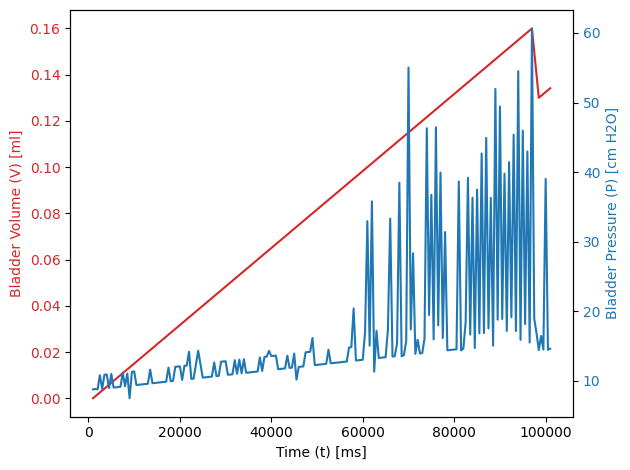

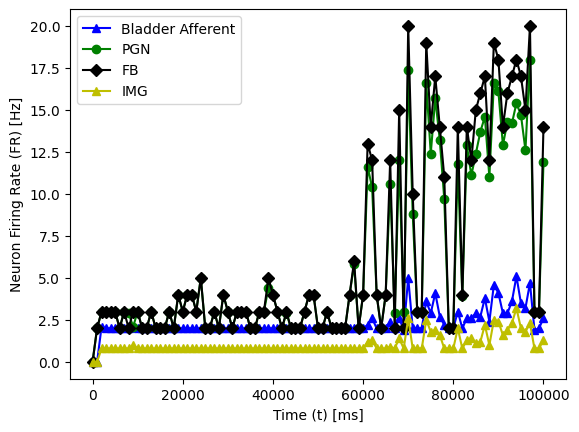

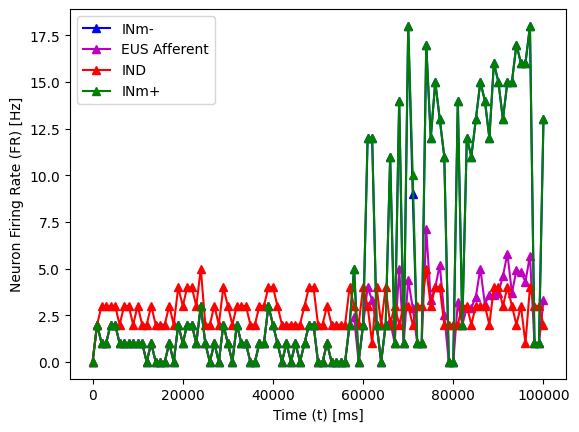

In [5]:
import os, sys, logging, faulthandler
from bmtk.simulator import bionet
from bmtk.simulator.bionet.default_setters.cell_models import loadHOC
from bmtk.simulator.bionet.modules.sim_module import SimulatorMod
from bmtk.utils.reports.spike_trains import SpikeTrains
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator
from bmtk.simulator.bionet.io_tools import io
import numpy as np
from neuron import h
import pandas as pd
# from bmtk.analyzer.cell_vars import plot_report
from feedback_loop import FeedbackLoop
from plotting import plot_figure, plotting_calculator
# Import the synaptic depression/facilitation model
import synapses

import plot_results


"""
Basic Logging features, disable faulthandler if you don't want stacktraces printed
logging determines the level and file to save logs to (might be worth moving location)
"""
faulthandler.enable()
logging.basicConfig(filename='error_logs/debug_run.log', level=logging.DEBUG)

synapses.load()
logging.info('Synapses Loaded')

press_thres = 17 # cm H20 #40
                 # Lingala, et al. 2016
change_thres = 10 # cm H20 #10
                 # Need biological value for this

bionet.pyfunction_cache.add_cell_model(loadHOC, directive='hoc', model_type='biophysical')
logging.info('Cell model added')

def run(config_file):

    conf = bionet.Config.from_json(config_file, validate=True)
    conf.build_env()

    fbmod = FeedbackLoop()

    graph = bionet.BioNetwork.from_config(conf)
    sim = bionet.BioSimulator.from_config(conf, network=graph)
    sim.add_mod(fbmod)  # Attach the above module to the simulator.
    sim.run()

    #fbmod.save_aff(conf.output_dir)
    plot_results.run(sim=sim,conf=conf)

# if __name__ == '__main__':
#     if __file__ != sys.argv[-1]:
#         run(sys.argv[-1])
#     else:
#         run('config.json')

# if __name__ == '__main__':
#     if __file__ != sys.argv[-1]:
#         run(sys.argv[-1])
#     else:
#         run('config.json')

run(config_file='jsons/simulation_config.json')